In [1]:
# 데이터 불러오기 

# mnist digit 데이터 업로드
from keras.datasets import mnist
import numpy as np

(x_train,_),(x_test,_) = mnist.load_data()

# 0-1 사이 값으로 정규화
x_train= x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# print(x_train.shape[1:]) # 이미지 한장의 사이즈 28,28
# print(np.prod(x_train.shape[1:])) # 이미지 한 장의 픽셀을 28*28 에서 784 로 변경

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
# print(x_train.shape) # (60000,28,28) > (60000,784)로 변경됨

C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is out input placeholder
input_img = Input(shape=(784,))

# encoder is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)


# decoder is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# 학습 설정
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# fit 
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100


  256/60000 [..............................] - ETA: 1:59 - loss: 0.6936

  768/60000 [..............................] - ETA: 44s - loss: 0.6933 

 1536/60000 [..............................] - ETA: 24s - loss: 0.6927

 2304/60000 [>.............................] - ETA: 17s - loss: 0.6922

 3072/60000 [>.............................] - ETA: 14s - loss: 0.6917

 3840/60000 [>.............................] - ETA: 12s - loss: 0.6911

 4608/60000 [=>............................] - ETA: 10s - loss: 0.6905

 5376/60000 [=>............................] - ETA: 9s - loss: 0.6897 

 6144/60000 [==>...........................] - ETA: 9s - loss: 0.6888

 6912/60000 [==>...........................] - ETA: 8s - loss: 0.6877

 7680/60000 [==>...........................] - ETA: 8s - loss: 0.6860

 8448/60000 [===>..........................] - ETA: 7s - loss: 0.6833

 8960/60000 [===>..........................] - ETA: 7s - loss: 0.6805

 9728/60000 [===>..........................] - ETA: 7s - loss: 0.6729

10496/60000 [====>.........................] - ETA: 6s - loss: 0.6592

11264/60000 [====>.........................] - ETA: 6s - loss: 0.6401

12032/60000 [=====>........................] - ETA: 6s - loss: 0.6194

12800/60000 [=====>........................] - ETA: 6s - loss: 0.5999

13568/60000 [=====>........................] - ETA: 5s - loss: 0.5819

14336/60000 [======>.......................] - ETA: 5s - loss: 0.5659

15104/60000 [======>.......................] - ETA: 5s - loss: 0.5512

15872/60000 [======>.......................] - ETA: 5s - loss: 0.5379

16640/60000 [=======>......................] - ETA: 5s - loss: 0.5257

17152/60000 [=======>......................] - ETA: 5s - loss: 0.5181

17664/60000 [=======>......................] - ETA: 5s - loss: 0.5112

18432/60000 [========>.....................] - ETA: 4s - loss: 0.5011

19200/60000 [========>.....................] - ETA: 4s - loss: 0.4920

19968/60000 [========>.....................] - ETA: 4s - loss: 0.4836

20736/60000 [=========>....................] - ETA: 4s - loss: 0.4756

21504/60000 [=========>....................] - ETA: 4s - loss: 0.4683

22272/60000 [==========>...................] - ETA: 4s - loss: 0.4614

22784/60000 [==========>...................] - ETA: 4s - loss: 0.4571

23296/60000 [==========>...................] - ETA: 4s - loss: 0.4531

24064/60000 [===========>..................] - ETA: 3s - loss: 0.4472

24832/60000 [===========>..................] - ETA: 3s - loss: 0.4417

25600/60000 [===========>..................] - ETA: 3s - loss: 0.4364

26368/60000 [============>.................] - ETA: 3s - loss: 0.4316

27136/60000 [============>.................] - ETA: 3s - loss: 0.4271

27904/60000 [============>.................] - ETA: 3s - loss: 0.4228

28416/60000 [=============>................] - ETA: 3s - loss: 0.4200

28928/60000 [=============>................] - ETA: 3s - loss: 0.4173

29440/60000 [=============>................] - ETA: 3s - loss: 0.4148

30208/60000 [==============>...............] - ETA: 3s - loss: 0.4111

30976/60000 [==============>...............] - ETA: 3s - loss: 0.4075

31744/60000 [==============>...............] - ETA: 2s - loss: 0.4041

32512/60000 [===============>..............] - ETA: 2s - loss: 0.4009

33280/60000 [===============>..............] - ETA: 2s - loss: 0.3979

34048/60000 [================>.............] - ETA: 2s - loss: 0.3950

34816/60000 [================>.............] - ETA: 2s - loss: 0.3921

35584/60000 [================>.............] - ETA: 2s - loss: 0.3894

36352/60000 [=================>............] - ETA: 2s - loss: 0.3868

37120/60000 [=================>............] - ETA: 2s - loss: 0.3844

37888/60000 [=================>............] - ETA: 2s - loss: 0.3820

38656/60000 [==================>...........] - ETA: 2s - loss: 0.3797

39424/60000 [==================>...........] - ETA: 2s - loss: 0.3775

40192/60000 [===================>..........] - ETA: 2s - loss: 0.3754

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3733

41728/60000 [===================>..........] - ETA: 1s - loss: 0.3712

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3693

43264/60000 [====================>.........] - ETA: 1s - loss: 0.3675

44032/60000 [=====================>........] - ETA: 1s - loss: 0.3657

44800/60000 [=====================>........] - ETA: 1s - loss: 0.3639

45568/60000 [=====================>........] - ETA: 1s - loss: 0.3622

46336/60000 [======================>.......] - ETA: 1s - loss: 0.3606

47104/60000 [======================>.......] - ETA: 1s - loss: 0.3590

47872/60000 [======================>.......] - ETA: 1s - loss: 0.3575

48640/60000 [=======================>......] - ETA: 1s - loss: 0.3561

49408/60000 [=======================>......] - ETA: 1s - loss: 0.3547

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3533

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3520

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3507

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3494

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3482

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3470

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3462

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3454

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3442

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3431

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3420

57856/60000 [===========================>..] - ETA: 0s - loss: 0.3412

58368/60000 [============================>.] - ETA: 0s - loss: 0.3406

58880/60000 [============================>.] - ETA: 0s - loss: 0.3399

59392/60000 [============================>.] - ETA: 0s - loss: 0.3393

60000/60000 [==============================] - 6s 100us/step - loss: 0.3385 - val_loss: 0.2629


Epoch 2/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2636

 1024/60000 [..............................] - ETA: 4s - loss: 0.2614

 1792/60000 [..............................] - ETA: 4s - loss: 0.2620

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2627

 3328/60000 [>.............................] - ETA: 4s - loss: 0.2623

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2621

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2629

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2623

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2625

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2623

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2622

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2622

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2619

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2617

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2619

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2617

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2618

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2618

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2619

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2616

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2615

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2614

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2614

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2612

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2611

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2610

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2608

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2607

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2606

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2605

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2605

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2605

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2603

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2603

26368/60000 [============>.................] - ETA: 2s - loss: 0.2603

27136/60000 [============>.................] - ETA: 2s - loss: 0.2602

27904/60000 [============>.................] - ETA: 2s - loss: 0.2601

28672/60000 [=============>................] - ETA: 2s - loss: 0.2601

29440/60000 [=============>................] - ETA: 2s - loss: 0.2601

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2600

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2599

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2599

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2599

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2599

34048/60000 [================>.............] - ETA: 1s - loss: 0.2598

34816/60000 [================>.............] - ETA: 1s - loss: 0.2597

35584/60000 [================>.............] - ETA: 1s - loss: 0.2596

36352/60000 [=================>............] - ETA: 1s - loss: 0.2596

37120/60000 [=================>............] - ETA: 1s - loss: 0.2595

37888/60000 [=================>............] - ETA: 1s - loss: 0.2594

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2593

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2593

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2593

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2592

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2591

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2590

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2589

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2589

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2587

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2587

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2586

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2585

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2585

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2585

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2584

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2583

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2583

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2582

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2582

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2581

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2580

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2580

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2579

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2578

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2578

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2578

58368/60000 [============================>.] - ETA: 0s - loss: 0.2577

59136/60000 [============================>.] - ETA: 0s - loss: 0.2576

59904/60000 [============================>.] - ETA: 0s - loss: 0.2574

60000/60000 [==============================] - 5s 80us/step - loss: 0.2574 - val_loss: 0.2521


Epoch 3/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2544

 1024/60000 [..............................] - ETA: 4s - loss: 0.2528

 1792/60000 [..............................] - ETA: 4s - loss: 0.2523

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2520

 3328/60000 [>.............................] - ETA: 4s - loss: 0.2518

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2519

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2516

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2517

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2516

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2515

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2513

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2511

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2511

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2509

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2506

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2505

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2504

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2502

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2501

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2502

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2500

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2499

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2499

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2499

18176/60000 [========>.....................] - ETA: 3s - loss: 0.2497

18944/60000 [========>.....................] - ETA: 3s - loss: 0.2495

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2493

20480/60000 [=========>....................] - ETA: 3s - loss: 0.2491

21248/60000 [=========>....................] - ETA: 3s - loss: 0.2488

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2487

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2486

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2485

24320/60000 [===========>..................] - ETA: 2s - loss: 0.2483

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2482

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2478

26624/60000 [============>.................] - ETA: 2s - loss: 0.2477

27392/60000 [============>.................] - ETA: 2s - loss: 0.2475

28160/60000 [=============>................] - ETA: 2s - loss: 0.2474

28928/60000 [=============>................] - ETA: 2s - loss: 0.2473

29696/60000 [=============>................] - ETA: 2s - loss: 0.2472

30464/60000 [==============>...............] - ETA: 2s - loss: 0.2470

31232/60000 [==============>...............] - ETA: 2s - loss: 0.2468

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2466

32768/60000 [===============>..............] - ETA: 2s - loss: 0.2465

33536/60000 [===============>..............] - ETA: 2s - loss: 0.2463

34048/60000 [================>.............] - ETA: 1s - loss: 0.2463

34816/60000 [================>.............] - ETA: 1s - loss: 0.2460

35584/60000 [================>.............] - ETA: 1s - loss: 0.2458

36352/60000 [=================>............] - ETA: 1s - loss: 0.2457

37120/60000 [=================>............] - ETA: 1s - loss: 0.2455

37888/60000 [=================>............] - ETA: 1s - loss: 0.2453

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2451

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2450

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2448

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2446

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2444

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2442

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2441

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2440

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2439

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2437

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2436

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2434

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2432

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2431

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2429

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2428

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2426

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2425

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2423

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2422

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2420

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2419

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2417

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2416

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2414

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2413

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2411

58368/60000 [============================>.] - ETA: 0s - loss: 0.2410

59136/60000 [============================>.] - ETA: 0s - loss: 0.2408

59904/60000 [============================>.] - ETA: 0s - loss: 0.2407

60000/60000 [==============================] - 5s 82us/step - loss: 0.2407 - val_loss: 0.2275


Epoch 4/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2261

 1024/60000 [..............................] - ETA: 5s - loss: 0.2306

 1792/60000 [..............................] - ETA: 5s - loss: 0.2290

 2560/60000 [>.............................] - ETA: 5s - loss: 0.2283

 3328/60000 [>.............................] - ETA: 5s - loss: 0.2280

 4096/60000 [=>............................] - ETA: 5s - loss: 0.2286

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2278

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2274

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2276

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2279

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2274

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2269

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.2269

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.2268

10752/60000 [====>.........................] - ETA: 4s - loss: 0.2266

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2268

12288/60000 [=====>........................] - ETA: 4s - loss: 0.2267

13056/60000 [=====>........................] - ETA: 3s - loss: 0.2266

13824/60000 [=====>........................] - ETA: 3s - loss: 0.2266

14592/60000 [======>.......................] - ETA: 3s - loss: 0.2265

15360/60000 [======>.......................] - ETA: 3s - loss: 0.2264

16128/60000 [=======>......................] - ETA: 3s - loss: 0.2262

16640/60000 [=======>......................] - ETA: 3s - loss: 0.2261

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2260

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2260

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2258

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2258

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2257

20992/60000 [=========>....................] - ETA: 3s - loss: 0.2254

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2253

22528/60000 [==========>...................] - ETA: 3s - loss: 0.2252

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2250

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2248

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2248

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2247

26368/60000 [============>.................] - ETA: 2s - loss: 0.2247

27136/60000 [============>.................] - ETA: 2s - loss: 0.2246

27904/60000 [============>.................] - ETA: 2s - loss: 0.2244

28672/60000 [=============>................] - ETA: 2s - loss: 0.2244

29440/60000 [=============>................] - ETA: 2s - loss: 0.2243

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2241

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2241

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2240

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2239

32768/60000 [===============>..............] - ETA: 2s - loss: 0.2238

33536/60000 [===============>..............] - ETA: 2s - loss: 0.2236

34304/60000 [================>.............] - ETA: 2s - loss: 0.2235

35072/60000 [================>.............] - ETA: 1s - loss: 0.2235

35840/60000 [================>.............] - ETA: 1s - loss: 0.2235

36608/60000 [=================>............] - ETA: 1s - loss: 0.2234

37376/60000 [=================>............] - ETA: 1s - loss: 0.2233

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2232

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2231

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2230

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2229

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2227

41984/60000 [===================>..........]

 - ETA: 1s - loss: 0.2227

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2225

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2224

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2223

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2223

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2222

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2222

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2222

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2221

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2221

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2221

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2220

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2219

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2219

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2219

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2218

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2217

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2217

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2216

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2215

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2215

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2214

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2213

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2213

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2212

58112/60000 [============================>.] - ETA: 0s - loss: 0.2212

58880/60000 [============================>.] - ETA: 0s - loss: 0.2211

59648/60000 [============================>.] - ETA: 0s - loss: 0.2211

60000/60000 [==============================] - 5s 89us/step - loss: 0.2210 - val_loss: 0.2131


Epoch 5/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2127

 1024/60000 [..............................] - ETA: 4s - loss: 0.2127

 1792/60000 [..............................] - ETA: 4s - loss: 0.2151

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2149

 3328/60000 [>.............................] - ETA: 4s - loss: 0.2152

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2149

 4864/60000 [=>............................] - ETA: 4s - loss: 0.2144

 5632/60000 [=>............................] - ETA: 4s - loss: 0.2149

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2147

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.2146

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2149

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2151

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2150

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2149

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2150

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2150

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2149

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2147

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2146

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2147

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2145

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2146

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2147

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2147

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2147

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2147

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2147

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2146

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2145

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2146

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2145

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2145

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2145

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2145

26368/60000 [============>.................] - ETA: 2s - loss: 0.2145

27136/60000 [============>.................] - ETA: 2s - loss: 0.2144

27904/60000 [============>.................] - ETA: 2s - loss: 0.2142

28672/60000 [=============>................] - ETA: 2s - loss: 0.2142

29440/60000 [=============>................] - ETA: 2s - loss: 0.2141

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2141

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2141

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2141

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2140

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2139

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2139

34304/60000 [================>.............] - ETA: 1s - loss: 0.2139

35072/60000 [================>.............] - ETA: 1s - loss: 0.2138

35840/60000 [================>.............] - ETA: 1s - loss: 0.2138

36608/60000 [=================>............] - ETA: 1s - loss: 0.2137

37120/60000 [=================>............] - ETA: 1s - loss: 0.2137

37888/60000 [=================>............] - ETA: 1s - loss: 0.2136

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2136

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2135

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2135

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2135

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2134

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2134

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2133

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2133

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2133

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2132

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2132

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2132

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2132

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2131

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2131

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2130

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2130

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2130

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2129

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2128

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2128

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2127

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2127

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2127

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2126

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2126

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2126

58112/60000 [============================>.] - ETA: 0s - loss: 0.2126

58880/60000 [============================>.] - ETA: 0s - loss: 0.2125

59648/60000 [============================>.] - ETA: 0s - loss: 0.2125

60000/60000 [==============================] - 5s 80us/step - loss: 0.2124 - val_loss: 0.2077


Epoch 6/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2122

 1024/60000 [..............................] - ETA: 4s - loss: 0.2113

 1792/60000 [..............................] - ETA: 4s - loss: 0.2110

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2105

 2816/60000 [>.............................] - ETA: 5s - loss: 0.2100

 3584/60000 [>.............................] - ETA: 5s - loss: 0.2103

 4352/60000 [=>............................] - ETA: 4s - loss: 0.2104

 5120/60000 [=>............................] - ETA: 4s - loss: 0.2108

 5888/60000 [=>............................] - ETA: 4s - loss: 0.2110

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.2107

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.2105

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.2106

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.2106

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.2104

10496/60000 [====>.........................] - ETA: 3s - loss: 0.2102

11264/60000 [====>.........................] - ETA: 3s - loss: 0.2100

12032/60000 [=====>........................] - ETA: 3s - loss: 0.2098

12800/60000 [=====>........................] - ETA: 3s - loss: 0.2096

13568/60000 [=====>........................] - ETA: 3s - loss: 0.2096

14336/60000 [======>.......................] - ETA: 3s - loss: 0.2093

15104/60000 [======>.......................] - ETA: 3s - loss: 0.2090

15872/60000 [======>.......................] - ETA: 3s - loss: 0.2086

16640/60000 [=======>......................] - ETA: 3s - loss: 0.2087

17408/60000 [=======>......................] - ETA: 3s - loss: 0.2086



18176/60000 [========>.....................] - ETA: 3s - loss: 0.2087

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2086

19456/60000 [========>.....................] - ETA: 3s - loss: 0.2085

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2085

20992/60000 [=========>....................] - ETA: 3s - loss: 0.2085

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2085

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2086

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2086

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2087

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2088

25344/60000 [===========>..................] - ETA: 2s - loss: 0.2088

26112/60000 [============>.................] - ETA: 2s - loss: 0.2088

26880/60000 [============>.................] - ETA: 2s - loss: 0.2086

27648/60000 [============>.................] - ETA: 2s - loss: 0.2085

28160/60000 [=============>................] - ETA: 2s - loss: 0.2085

28672/60000 [=============>................] - ETA: 2s - loss: 0.2084

29184/60000 [=============>................] - ETA: 2s - loss: 0.2084

29952/60000 [=============>................] - ETA: 2s - loss: 0.2084

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2083

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2082

32256/60000 [===============>..............] - ETA: 2s - loss: 0.2082

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2080

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2080

34560/60000 [================>.............] - ETA: 2s - loss: 0.2079

35328/60000 [================>.............] - ETA: 1s - loss: 0.2079

36096/60000 [=================>............] - ETA: 1s - loss: 0.2078

36864/60000 [=================>............] - ETA: 1s - loss: 0.2077

37632/60000 [=================>............] - ETA: 1s - loss: 0.2076

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2075

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2074

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2073

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2073

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2072

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2071

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2071

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2070

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2069

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2068

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2068

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2067

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2066

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2065

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2065

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2064

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2063

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2062

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2062

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2061

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2060

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2060

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2059

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2058

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2057

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2056

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2055

58624/60000 [============================>.] - ETA: 0s - loss: 0.2054

59392/60000 [============================>.] - ETA: 0s - loss: 0.2054

60000/60000 [==============================] - 5s 84us/step - loss: 0.2053 - val_loss: 0.1985


Epoch 7/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1972

 1024/60000 [..............................] - ETA: 4s - loss: 0.2010

 1792/60000 [..............................] - ETA: 4s - loss: 0.2002

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1992

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1984

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1982

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1980

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1978

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1972

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1972

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1968

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1971

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.1971

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1969

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1968

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1967

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1966

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1965

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1965

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1965

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1967

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1967

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1966

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1965

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1964

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1962

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1961

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1960

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1960

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1958

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1957

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1958

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1956

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1957

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1956

26624/60000 [============>.................] - ETA: 2s - loss: 0.1955

27392/60000 [============>.................] - ETA: 2s - loss: 0.1954

28160/60000 [=============>................] - ETA: 2s - loss: 0.1953

28928/60000 [=============>................] - ETA: 2s - loss: 0.1953

29696/60000 [=============>................] - ETA: 2s - loss: 0.1953

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1952

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1952

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1952

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1951

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1950

34304/60000 [================>.............] - ETA: 1s - loss: 0.1949

35072/60000 [================>.............] - ETA: 1s - loss: 0.1948

35840/60000 [================>.............] - ETA: 1s - loss: 0.1948

36608/60000 [=================>............] - ETA: 1s - loss: 0.1948

37376/60000 [=================>............] - ETA: 1s - loss: 0.1948

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1947

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1946

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1945

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1944

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1944

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1943

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1942

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1942

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1941

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1940

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1939

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1939

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1939

48128/60000 [=======================>......]

 - ETA: 0s - loss: 0.1938

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1937

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1936

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1935

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1935

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1934

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1934

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1933

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1933

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1932

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1931

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1931

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1931

58112/60000 [============================>.] - ETA: 0s - loss: 0.1930

58624/60000 [============================>.] - ETA: 0s - loss: 0.1929

59392/60000 [============================>.] - ETA: 0s - loss: 0.1929

60000/60000 [==============================] - 5s 79us/step - loss: 0.1928 - val_loss: 0.1860


Epoch 8/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1889

 1024/60000 [..............................] - ETA: 4s - loss: 0.1860

 1792/60000 [..............................] - ETA: 4s - loss: 0.1870

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1886

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1882

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1876

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1871

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1872

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1869

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1872

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1872

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1873

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1872

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1872

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1871

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1872

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1869

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1866

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1865

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1864

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1865

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1863

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1862

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1863

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1862

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1861

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1862

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1861

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1861

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1862

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1861

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1861

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1861

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1860

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1860

26624/60000 [============>.................] - ETA: 2s - loss: 0.1859

27392/60000 [============>.................] - ETA: 2s - loss: 0.1859

27904/60000 [============>.................] - ETA: 2s - loss: 0.1858

28672/60000 [=============>................] - ETA: 2s - loss: 0.1857

29184/60000 [=============>................] - ETA: 2s - loss: 0.1857

29696/60000 [=============>................] - ETA: 2s - loss: 0.1858

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1857

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1857

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1857

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1856

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1856

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1856

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1856



34048/60000 [================>.............] - ETA: 2s - loss: 0.1855



34560/60000 [================>.............] - ETA: 2s - loss: 0.1855

35072/60000 [================>.............] - ETA: 2s - loss: 0.1855

35840/60000 [================>.............] - ETA: 2s - loss: 0.1855

36608/60000 [=================>............] - ETA: 1s - loss: 0.1855

37376/60000 [=================>............] - ETA: 1s - loss: 0.1855

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1855

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1854

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1853

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1852

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1852

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1851

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1851

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1850

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1850

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1850

45824/60000 [=====================>........]

 - ETA: 1s - loss: 0.1849

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1849

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1848

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1848

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1848

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1848

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1848

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1848

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1847

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1847

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1846

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1846

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1845

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1845

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1845

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1844

58112/60000 [============================>.] - ETA: 0s - loss: 0.1844

58624/60000 [============================>.] - ETA: 0s - loss: 0.1843

59136/60000 [============================>.] - ETA: 0s - loss: 0.1843

59648/60000 [============================>.] - ETA: 0s - loss: 0.1843

60000/60000 [==============================] - 5s 87us/step - loss: 0.1843 - val_loss: 0.1794


Epoch 9/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1795

 1024/60000 [..............................] - ETA: 4s - loss: 0.1805

 1792/60000 [..............................] - ETA: 4s - loss: 0.1809

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1801

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1795

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1794

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1804

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1804

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1805

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1805

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1802

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1802

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1799

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1799

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1800

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1800

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1800

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1799

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1798

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1798

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1797

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1794

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1794

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1794

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1795

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1796

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1796

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1796

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1795

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1795

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1795

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1794

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1794

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1793

26112/60000 [============>.................] - ETA: 2s - loss: 0.1792

26880/60000 [============>.................] - ETA: 2s - loss: 0.1791

27392/60000 [============>.................] - ETA: 2s - loss: 0.1790

27904/60000 [============>.................] - ETA: 2s - loss: 0.1790

28672/60000 [=============>................] - ETA: 2s - loss: 0.1791

29440/60000 [=============>................] - ETA: 2s - loss: 0.1791

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1790

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1790

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1790

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1790

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1790

34048/60000 [================>.............] - ETA: 2s - loss: 0.1790

34816/60000 [================>.............] - ETA: 2s - loss: 0.1790

35584/60000 [================>.............] - ETA: 1s - loss: 0.1790

36352/60000 [=================>............] - ETA: 1s - loss: 0.1790

37120/60000 [=================>............] - ETA: 1s - loss: 0.1789

37888/60000 [=================>............] - ETA: 1s - loss: 0.1789

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1788

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1789

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1788

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1788

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1787

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1787

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1786

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1786

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1786

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1786

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1786

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1786

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1786

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1785

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1785



49920/60000 [=======================>......] - ETA: 0s - loss: 0.1784

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1784

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1783

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1783

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1783

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1782

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1781

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1781

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1780

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1780

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1780

58112/60000 [============================>.] - ETA: 0s - loss: 0.1780

58880/60000 [============================>.] - ETA: 0s - loss: 0.1780

59648/60000 [============================>.] - ETA: 0s - loss: 0.1780

60000/60000 [==============================] - 5s 84us/step - loss: 0.1779 - val_loss: 0.1748


Epoch 10/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1777

 1024/60000 [..............................] - ETA: 4s - loss: 0.1769

 1536/60000 [..............................] - ETA: 5s - loss: 0.1759

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1755

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1759

 3072/60000 [>.............................]

 - ETA: 5s - loss: 0.1756

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1754

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1750

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1742

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1744

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1740

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1743

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1744

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1745

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1746

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1746

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1746

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1747

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1747

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1747

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1747

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1745

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1744

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1743

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1743

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1741

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1741

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1742

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1743

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1743

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1742

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1743

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1742

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1742

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1741

23040/60000 [==========>...................]

 - ETA: 3s - loss: 0.1741

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1740

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1741

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1740

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1740

26624/60000 [============>.................] - ETA: 3s - loss: 0.1740

27392/60000 [============>.................] - ETA: 2s - loss: 0.1739

27648/60000 [============>.................] - ETA: 3s - loss: 0.1739

28160/60000 [=============>................] - ETA: 3s - loss: 0.1739

28672/60000 [=============>................] - ETA: 2s - loss: 0.1739

29184/60000 [=============>................] - ETA: 2s - loss: 0.1738

29696/60000 [=============>................] - ETA: 2s - loss: 0.1738

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1738

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1738

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1738

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1738

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1738

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1739

34304/60000 [================>.............] - ETA: 2s - loss: 0.1738

35072/60000 [================>.............] - ETA: 2s - loss: 0.1737

35840/60000 [================>.............] - ETA: 2s - loss: 0.1737

36608/60000 [=================>............] - ETA: 2s - loss: 0.1737

37376/60000 [=================>............] - ETA: 2s - loss: 0.1737

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1737

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1737

39168/60000 [==================>...........] - ETA: 2s - loss: 0.1737

39424/60000 [==================>...........] - ETA: 2s - loss: 0.1737

39680/60000 [==================>...........] - ETA: 2s - loss: 0.1737



40448/60000 [===================>..........] - ETA: 1s - loss: 0.1736

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1736

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1736

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1736

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1736

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1736

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1736

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1735

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1734

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1733

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1733

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1733

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1733

49664/60000 [=======================>......] - ETA: 1s - loss: 0.1733

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1733

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1732

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1732

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1732

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1732

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1732

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1731

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1730

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1729

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1729

58112/60000 [============================>.] - ETA: 0s - loss: 0.1729

58624/60000 [============================>.] - ETA: 0s - loss: 0.1729

59392/60000 [============================>.] - ETA: 0s - loss: 0.1729

60000/60000 [==============================] - 6s 100us/step - loss: 0.1728 - val_loss: 0.1692


Epoch 11/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1720

  768/60000 [..............................] - ETA: 6s - loss: 0.1704

 1280/60000 [..............................] - ETA: 6s - loss: 0.1675

 2048/60000 [>.............................] - ETA: 6s - loss: 0.1675

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1687

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1692

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1692



 4864/60000 [=>............................] - ETA: 5s - loss: 0.1695

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1699

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1700

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1698

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1696

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1695

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1697

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1693

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1695

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1694

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1691

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1691

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1692

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1693

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1692

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1690

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1691

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1689

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1687

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1687

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1688

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1689

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1690

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1690

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1690

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1691

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1691

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1691

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1690

26624/60000 [============>.................] - ETA: 2s - loss: 0.1689

27392/60000 [============>.................] - ETA: 2s - loss: 0.1688

27904/60000 [============>.................] - ETA: 2s - loss: 0.1688

28672/60000 [=============>................] - ETA: 2s - loss: 0.1688

29440/60000 [=============>................] - ETA: 2s - loss: 0.1688

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1688

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1687

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1687

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1686

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1686

34048/60000 [================>.............] - ETA: 2s - loss: 0.1686

34816/60000 [================>.............] - ETA: 2s - loss: 0.1686

35328/60000 [================>.............] - ETA: 2s - loss: 0.1686

36096/60000 [=================>............] - ETA: 2s - loss: 0.1686

36608/60000 [=================>............] - ETA: 1s - loss: 0.1685

37120/60000 [=================>............] - ETA: 1s - loss: 0.1686

37888/60000 [=================>............] - ETA: 1s - loss: 0.1685

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1685

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1685

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1685

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1685

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1684

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1685

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1685

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1684

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1684

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1684

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1683

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1683

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1683

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1683

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1682

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1683

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1683

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1682

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1681

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1681

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1681

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1681

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1680

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1680

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1680

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1679

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1679

58368/60000 [============================>.] - ETA: 0s - loss: 0.1678

59136/60000 [============================>.] - ETA: 0s - loss: 0.1678

59904/60000 [============================>.] - ETA: 0s - loss: 0.1678

60000/60000 [==============================] - 5s 90us/step - loss: 0.1678 - val_loss: 0.1636


Epoch 12/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1675

 1024/60000 [..............................] - ETA: 4s - loss: 0.1660

 1792/60000 [..............................] - ETA: 4s - loss: 0.1647

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1649

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1648

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1654

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1655

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1655

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1654

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1654

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1653

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1653

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1652

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1652

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1652

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1651

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1652

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1650

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1650

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1648

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1647

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1648

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1648

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1648

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1648

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1647

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1646

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1646

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1647

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1647

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1647

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1647

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1646

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1646

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1646

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1647

26624/60000 [============>.................] - ETA: 2s - loss: 0.1647

27392/60000 [============>.................] - ETA: 2s - loss: 0.1645

28160/60000 [=============>................] - ETA: 2s - loss: 0.1644

28928/60000 [=============>................] - ETA: 2s - loss: 0.1645

29184/60000 [=============>................] - ETA: 2s - loss: 0.1645

29696/60000 [=============>................] - ETA: 2s - loss: 0.1645

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1644

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1644

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1645

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1644

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1643

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1643

34560/60000 [================>.............] - ETA: 2s - loss: 0.1642

35328/60000 [================>.............] - ETA: 2s - loss: 0.1642

36096/60000 [=================>............] - ETA: 1s - loss: 0.1641

36864/60000 [=================>............] - ETA: 1s - loss: 0.1641

37632/60000 [=================>............] - ETA: 1s - loss: 0.1640

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1640

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1640

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1640

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1639

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1640

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1640

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1639

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1639

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1639

44544/60000 [=====================>........]

 - ETA: 1s - loss: 0.1638

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1638

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1637

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1637

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1637

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1637

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1636

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1636

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1636

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1636

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1635

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1635

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1635

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1635

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1634

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1634

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1634

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1634

58368/60000 [============================>.] - ETA: 0s - loss: 0.1633

59136/60000 [============================>.] - ETA: 0s - loss: 0.1633

59904/60000 [============================>.] - ETA: 0s - loss: 0.1633

60000/60000 [==============================] - 5s 83us/step - loss: 0.1633 - val_loss: 0.1604


Epoch 13/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1564

 1024/60000 [..............................] - ETA: 4s - loss: 0.1592

 1792/60000 [..............................] - ETA: 4s - loss: 0.1602

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1606

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1604

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1607

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1606

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1613

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1611

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1608

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1607

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1608

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1610

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1610

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1611

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1611

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1610

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1609

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1609

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1608

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1606

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1606

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1605

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1605

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1604

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1605

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1604

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1604

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1604

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1603

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1603

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1604

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1604

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1605

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1606

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1606

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1605

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1605



26368/60000 [============>.................] - ETA: 2s - loss: 0.1604

27136/60000 [============>.................] - ETA: 2s - loss: 0.1603

27904/60000 [============>.................] - ETA: 2s - loss: 0.1602

28672/60000 [=============>................] - ETA: 2s - loss: 0.1602

29440/60000 [=============>................] - ETA: 2s - loss: 0.1601

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1601

30720/60000 [==============>...............]

 - ETA: 2s - loss: 0.1601

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1601

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1600

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1601

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1601

34304/60000 [================>.............] - ETA: 2s - loss: 0.1600

35072/60000 [================>.............] - ETA: 2s - loss: 0.1600

35840/60000 [================>.............] - ETA: 2s - loss: 0.1599

36608/60000 [=================>............] - ETA: 2s - loss: 0.1598

37376/60000 [=================>............] - ETA: 1s - loss: 0.1598

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1598

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1597

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1597

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1597

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1596

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1596

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1595

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1595

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1595

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1596

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1596

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1596

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1596

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1596

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1596

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1596

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1596

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1596

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1596

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1596

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1595

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1594

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1594

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1594

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1594

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1594

58112/60000 [============================>.] - ETA: 0s - loss: 0.1593

58880/60000 [============================>.] - ETA: 0s - loss: 0.1593

59648/60000 [============================>.] - ETA: 0s - loss: 0.1593

60000/60000 [==============================] - 5s 85us/step - loss: 0.1593 - val_loss: 0.1569


Epoch 14/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1545

 1024/60000 [..............................] - ETA: 4s - loss: 0.1582

 1792/60000 [..............................] - ETA: 4s - loss: 0.1569

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1569

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1570

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1572

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1572

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1566

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1565

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1567

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1567

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1567

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1566

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1566

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1568

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1568

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1566

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1565

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1565

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1566

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1566

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1565

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1567

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1569

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1570

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1570

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1570

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1569

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1570

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1569

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1569

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1569

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1568

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1568

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1567

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1566

26112/60000 [============>.................] - ETA: 2s - loss: 0.1566

26880/60000 [============>.................] - ETA: 2s - loss: 0.1567

27648/60000 [============>.................] - ETA: 2s - loss: 0.1567

28416/60000 [=============>................] - ETA: 2s - loss: 0.1567

29184/60000 [=============>................] - ETA: 2s - loss: 0.1567

29952/60000 [=============>................] - ETA: 2s - loss: 0.1567

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1567

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1566

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1565

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1565

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1564

34560/60000 [================>.............] - ETA: 2s - loss: 0.1564

35328/60000 [================>.............] - ETA: 1s - loss: 0.1563

36096/60000 [=================>............] - ETA: 1s - loss: 0.1563

36864/60000 [=================>............] - ETA: 1s - loss: 0.1563

37632/60000 [=================>............] - ETA: 1s - loss: 0.1563

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1562

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1562

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1562

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1562

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1562

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1562

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1562

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1562

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1563

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1562

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1562

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1562

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1562

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1561

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1561

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1560

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1560

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1560

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1560

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1560

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1560

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1560

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1560

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1560

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1560

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1559

58112/60000 [============================>.] - ETA: 0s - loss: 0.1559

58880/60000 [============================>.] - ETA: 0s - loss: 0.1559

59648/60000 [============================>.] - ETA: 0s - loss: 0.1558

60000/60000 [==============================] - 5s 82us/step - loss: 0.1558 - val_loss: 0.1518


Epoch 15/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1483

 1024/60000 [..............................] - ETA: 5s - loss: 0.1511

 1792/60000 [..............................] - ETA: 4s - loss: 0.1530

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1536

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1540

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1542

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1542

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1539

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1538

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1536

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1535

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1534

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1534

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1535

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1538

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1538

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1537



13312/60000 [=====>........................] - ETA: 3s - loss: 0.1536

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1536

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1539

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1539

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1540

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1540

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1541

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1540

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1539

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1538

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1538

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1539



20224/60000 [=========>....................] - ETA: 3s - loss: 0.1540

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1541

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1540

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1540

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1540

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1540

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1540

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1540

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1539

26624/60000 [============>.................] - ETA: 2s - loss: 0.1539

27392/60000 [============>.................] - ETA: 2s - loss: 0.1538

27904/60000 [============>.................] - ETA: 2s - loss: 0.1538

28416/60000 [=============>................] - ETA: 2s - loss: 0.1538

29184/60000 [=============>................] - ETA: 2s - loss: 0.1537

29952/60000 [=============>................] - ETA: 2s - loss: 0.1538

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1537

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1537

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1535

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1536

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1536

34560/60000 [================>.............] - ETA: 2s - loss: 0.1537

35328/60000 [================>.............] - ETA: 2s - loss: 0.1536

36096/60000 [=================>............] - ETA: 2s - loss: 0.1536

36864/60000 [=================>............] - ETA: 2s - loss: 0.1535

37632/60000 [=================>............] - ETA: 1s - loss: 0.1536

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1535

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1534

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1533

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1533

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1533

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1533

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1533

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1532

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1531

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1530

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1530

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1530

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1530

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1530

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1529

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1529

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1529

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1529

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1528

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1528

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1528

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1528

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1529

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1529

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1528

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1528

58112/60000 [============================>.] - ETA: 0s - loss: 0.1528

58880/60000 [============================>.] - ETA: 0s - loss: 0.1527

59648/60000 [============================>.] - ETA: 0s - loss: 0.1527

60000/60000 [==============================] - 5s 89us/step - loss: 0.1527 - val_loss: 0.1500


Epoch 16/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1576

  768/60000 [..............................] - ETA: 6s - loss: 0.1535

 1280/60000 [..............................] - ETA: 6s - loss: 0.1525

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1514

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1512

 3584/60000 [>.............................] - ETA: 4s - loss: 0.1515

 4352/60000 [=>............................] - ETA: 4s - loss: 0.1510

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1512

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1514

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1515

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1511

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1512

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1511

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1512

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1512

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1513

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1512

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1510

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1510

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1509

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1510

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1510

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1510

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1512

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1511

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1510

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1510

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1511

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1511

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1511

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1512

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1511

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1510

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1510

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1509

26112/60000 [============>.................] - ETA: 2s - loss: 0.1509

26880/60000 [============>.................] - ETA: 2s - loss: 0.1509

27648/60000 [============>.................] - ETA: 2s - loss: 0.1508

28416/60000 [=============>................] - ETA: 2s - loss: 0.1508

28928/60000 [=============>................] - ETA: 2s - loss: 0.1509

29440/60000 [=============>................] - ETA: 2s - loss: 0.1508

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1507

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1506

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1505

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1505

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1505

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1505

34560/60000 [================>.............] - ETA: 2s - loss: 0.1505

35328/60000 [================>.............] - ETA: 1s - loss: 0.1505

36096/60000 [=================>............] - ETA: 1s - loss: 0.1505

36864/60000 [=================>............] - ETA: 1s - loss: 0.1504

37632/60000 [=================>............] - ETA: 1s - loss: 0.1504

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1504

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1504

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1504

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1504

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1504

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1504

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1504

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1504

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1504

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1503

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1503

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1503

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1502

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1501

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1501

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1501

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1500

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1500

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1500

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1500

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1500

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1499

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1499

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1498

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1498

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1498

58368/60000 [============================>.] - ETA: 0s - loss: 0.1498

59136/60000 [============================>.] - ETA: 0s - loss: 0.1498

59904/60000 [============================>.] - ETA: 0s - loss: 0.1498

60000/60000 [==============================] - 5s 81us/step - loss: 0.1498 - val_loss: 0.1476


Epoch 17/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1469

  768/60000 [..............................] - ETA: 7s - loss: 0.1482

 1280/60000 [..............................] - ETA: 6s - loss: 0.1504

 1792/60000 [..............................] - ETA: 6s - loss: 0.1502

 2304/60000 [>.............................] - ETA: 6s - loss: 0.1498

 2816/60000 [>.............................] - ETA: 6s - loss: 0.1493

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1490

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1483

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1482

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1480

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1478

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1481

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1481

 8192/60000 [===>..........................] - ETA: 5s - loss: 0.1480

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1481

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.1480

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1482



11264/60000 [====>.........................] - ETA: 4s - loss: 0.1482

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1483

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1483

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1482

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1482

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1483

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1482

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1483

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1483

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1483

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1483

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1483

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1484

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1482

19200/60000 [========>.....................] - ETA: 4s - loss: 0.1482

19968/60000 [========>.....................] - ETA: 4s - loss: 0.1481

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1480

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1480

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1480

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1480

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1479

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1479

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1479

26112/60000 [============>.................] - ETA: 3s - loss: 0.1479

26880/60000 [============>.................] - ETA: 3s - loss: 0.1479

27648/60000 [============>.................] - ETA: 3s - loss: 0.1479

28416/60000 [=============>................] - ETA: 2s - loss: 0.1480

29184/60000 [=============>................] - ETA: 2s - loss: 0.1480

29696/60000 [=============>................] - ETA: 2s - loss: 0.1481

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1481

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1481

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1480

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1480

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1480

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1479

34304/60000 [================>.............] - ETA: 2s - loss: 0.1479

35072/60000 [================>.............] - ETA: 2s - loss: 0.1479

35840/60000 [================>.............] - ETA: 2s - loss: 0.1478



36608/60000 [=================>............] - ETA: 2s - loss: 0.1477



37120/60000 [=================>............] - ETA: 2s - loss: 0.1477

37632/60000 [=================>............] - ETA: 2s - loss: 0.1476

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1476

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1476

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1476

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1475

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1475

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1475

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1475

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1475

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1474

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1474

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1474

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1474

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1474

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1474

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1474

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1474

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1474

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1474

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1473

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1474

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1474

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1474

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1473

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1473

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1473

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1472

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1473

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1473

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1472

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1472

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1472

58368/60000 [============================>.] - ETA: 0s - loss: 0.1471

59136/60000 [============================>.] - ETA: 0s - loss: 0.1471

59648/60000 [============================>.] - ETA: 0s - loss: 0.1471

60000/60000 [==============================] - 6s 100us/step - loss: 0.1471 - val_loss: 0.1437


Epoch 18/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1447

 1024/60000 [..............................] - ETA: 5s - loss: 0.1427

 1536/60000 [..............................] - ETA: 5s - loss: 0.1439

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1447

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1461

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1462

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1461

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1460

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1460

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1457

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1456

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1458

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1459

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1459

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1457

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1457

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1459

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1458

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1458

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1458

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1456

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1457

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1457

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1458

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1458

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1458

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1458

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1457

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1457

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1456

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1457

21504/60000 [=========>....................]

 - ETA: 3s - loss: 0.1456

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1455

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1455

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1455

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1455

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1454

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1453

26624/60000 [============>.................] - ETA: 2s - loss: 0.1453

27392/60000 [============>.................] - ETA: 2s - loss: 0.1453

28160/60000 [=============>................] - ETA: 2s - loss: 0.1452

28928/60000 [=============>................] - ETA: 2s - loss: 0.1451

29696/60000 [=============>................] - ETA: 2s - loss: 0.1452

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1453

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1453

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1453

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1453

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1453

34304/60000 [================>.............] - ETA: 2s - loss: 0.1453

35072/60000 [================>.............] - ETA: 2s - loss: 0.1453

35840/60000 [================>.............] - ETA: 2s - loss: 0.1453

36608/60000 [=================>............] - ETA: 1s - loss: 0.1453

37376/60000 [=================>............] - ETA: 1s - loss: 0.1452

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1452

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1451

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1451

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1451

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1450

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1450

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1449

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1449

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1448

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1448

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1448

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1448

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1447

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1448

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1449

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1449

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1449

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1449

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1448

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1448

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1448

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1448

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1448

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1448

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1448

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1447

58112/60000 [============================>.] - ETA: 0s - loss: 0.1447

58880/60000 [============================>.] - ETA: 0s - loss: 0.1446

59648/60000 [============================>.] - ETA: 0s - loss: 0.1446

60000/60000 [==============================] - 5s 85us/step - loss: 0.1446 - val_loss: 0.1417


Epoch 19/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1444

 1024/60000 [..............................] - ETA: 4s - loss: 0.1416

 1792/60000 [..............................] - ETA: 4s - loss: 0.1414

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1424

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1428

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1428

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1426

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1428

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1429

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1429

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1433

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1434

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1433

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1432

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1433

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1434

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1434

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1434

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1435

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1435

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1437

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1437

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1436

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1436

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1434

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1433

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1432

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1431

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1430

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1429

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1429

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1428

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1428

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1428

26368/60000 [============>.................] - ETA: 2s - loss: 0.1428

27136/60000 [============>.................] - ETA: 2s - loss: 0.1427

27904/60000 [============>.................] - ETA: 2s - loss: 0.1427

28672/60000 [=============>................] - ETA: 2s - loss: 0.1428

29440/60000 [=============>................] - ETA: 2s - loss: 0.1427

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1428

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1427

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1427

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1427

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1426

34048/60000 [================>.............] - ETA: 1s - loss: 0.1426

34816/60000 [================>.............] - ETA: 1s - loss: 0.1426

35328/60000 [================>.............] - ETA: 1s - loss: 0.1426

36096/60000 [=================>............] - ETA: 1s - loss: 0.1425

36864/60000 [=================>............] - ETA: 1s - loss: 0.1426

37632/60000 [=================>............] - ETA: 1s - loss: 0.1425

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1426

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1426

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1425

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1425

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1424

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1424

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1423

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1423

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1423

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1423

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1423

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1423

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1423

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1423

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1424

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1424

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1423

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1423

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1423

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1423

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1422

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1422

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1422

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1422

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1422

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1422

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1422

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1422

58368/60000 [============================>.] - ETA: 0s - loss: 0.1422

59136/60000 [============================>.] - ETA: 0s - loss: 0.1422

59904/60000 [============================>.] - ETA: 0s - loss: 0.1422

60000/60000 [==============================] - 5s 84us/step - loss: 0.1422 - val_loss: 0.1398


Epoch 20/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1392

 1024/60000 [..............................] - ETA: 4s - loss: 0.1408

 1792/60000 [..............................] - ETA: 4s - loss: 0.1421

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1417

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1417

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1414

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1412

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1414

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1413

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1412

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1411

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1408

 8192/60000 [===>..........................] - ETA: 5s - loss: 0.1408

 8704/60000 [===>..........................] - ETA: 5s - loss: 0.1410

 9216/60000 [===>..........................] - ETA: 5s - loss: 0.1412

 9984/60000 [===>..........................] - ETA: 5s - loss: 0.1412



10240/60000 [====>.........................] - ETA: 5s - loss: 0.1412

10496/60000 [====>.........................] - ETA: 5s - loss: 0.1410

11008/60000 [====>.........................] - ETA: 5s - loss: 0.1412

11776/60000 [====>.........................] - ETA: 5s - loss: 0.1413

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1413

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1412

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1410

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1410

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1410

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1411

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1411

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1411

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1412

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1411

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1411

19456/60000 [========>.....................] - ETA: 4s - loss: 0.1411

20224/60000 [=========>....................] - ETA: 4s - loss: 0.1410

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1410

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1411

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1409

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1409

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1408

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1408

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1407

26368/60000 [============>.................] - ETA: 3s - loss: 0.1408

27136/60000 [============>.................] - ETA: 3s - loss: 0.1409

27904/60000 [============>.................] - ETA: 3s - loss: 0.1408

28672/60000 [=============>................] - ETA: 2s - loss: 0.1408

29440/60000 [=============>................] - ETA: 2s - loss: 0.1409

29952/60000 [=============>................] - ETA: 2s - loss: 0.1408

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1408

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1408

31744/60000 [==============>...............]

 - ETA: 2s - loss: 0.1408

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1408

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1407

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1407

34048/60000 [================>.............] - ETA: 2s - loss: 0.1406

34816/60000 [================>.............] - ETA: 2s - loss: 0.1405

35584/60000 [================>.............] - ETA: 2s - loss: 0.1405

36352/60000 [=================>............] - ETA: 2s - loss: 0.1405

36864/60000 [=================>............] - ETA: 2s - loss: 0.1405

37632/60000 [=================>............] - ETA: 2s - loss: 0.1405

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1404

39168/60000 [==================>...........]

 - ETA: 1s - loss: 0.1404

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1403

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1404

41472/60000 [===================>..........]

 - ETA: 1s - loss: 0.1404

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1404

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1404

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1404

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1404

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1404

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1404

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1404

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1403

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1403

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1403

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1403

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1403

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1403

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1403

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1403

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1403

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1403

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1403

55040/60000 [==========================>...]

 - ETA: 0s - loss: 0.1403

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1403

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1403

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1402

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1402

58624/60000 [============================>.] - ETA: 0s - loss: 0.1401

59136/60000 [============================>.] - ETA: 0s - loss: 0.1401



59648/60000 [============================>.] - ETA: 0s - loss: 0.1401

60000/60000 [==============================] - 6s 98us/step - loss: 0.1401 - val_loss: 0.1385


Epoch 21/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1360

 1024/60000 [..............................] - ETA: 4s - loss: 0.1362

 1792/60000 [..............................] - ETA: 4s - loss: 0.1364

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1363

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1373

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1374

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1379

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1383

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1386

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1386

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1389

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1390

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1392

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1390

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1390



11520/60000 [====>.........................] - ETA: 3s - loss: 0.1390

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1391

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1391

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1389

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1389

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1387

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1387

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1386

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1385

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1386

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1386

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1387

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1386

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1387

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1385

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1385

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1385

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1385

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1387

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1387

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1387

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1387

26112/60000 [============>.................] - ETA: 2s - loss: 0.1387

26624/60000 [============>.................] - ETA: 2s - loss: 0.1386

27392/60000 [============>.................] - ETA: 2s - loss: 0.1386

28160/60000 [=============>................] - ETA: 2s - loss: 0.1385

28928/60000 [=============>................] - ETA: 2s - loss: 0.1385

29696/60000 [=============>................] - ETA: 2s - loss: 0.1385

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1385

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1385

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1385

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1386

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1386

34048/60000 [================>.............] - ETA: 2s - loss: 0.1386

34816/60000 [================>.............] - ETA: 2s - loss: 0.1386

35584/60000 [================>.............] - ETA: 2s - loss: 0.1386

36096/60000 [=================>............] - ETA: 2s - loss: 0.1387

36864/60000 [=================>............] - ETA: 2s - loss: 0.1387

37376/60000 [=================>............] - ETA: 1s - loss: 0.1387

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1388

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1387

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1386

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1386

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1386

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1387

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1387

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1387

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1387

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1387

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1386

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1385

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1385

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1385

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1385

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1385

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1385

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1384

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1383

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1383

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1383

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1383

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1382

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1382

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1382

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1382

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1382

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1382

58624/60000 [============================>.] - ETA: 0s - loss: 0.1381

59392/60000 [============================>.] - ETA: 0s - loss: 0.1382

60000/60000 [==============================] - 5s 88us/step - loss: 0.1382 - val_loss: 0.1379


Epoch 22/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1367

 1024/60000 [..............................] - ETA: 4s - loss: 0.1383

 1792/60000 [..............................] - ETA: 4s - loss: 0.1372

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1377

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1377

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1376

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1374

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1375

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1377



 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1376

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1375

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1380

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1379

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1379

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1377

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1375

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1373

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1372

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1372

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1370

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1368

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1368

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1368

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1367

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1366

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1366

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1364

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1366

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1366

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1366

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1366

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1367

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1367

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1368

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1368

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1368

26368/60000 [============>.................] - ETA: 3s - loss: 0.1368

26880/60000 [============>.................] - ETA: 3s - loss: 0.1368

27392/60000 [============>.................] - ETA: 3s - loss: 0.1368

28160/60000 [=============>................] - ETA: 2s - loss: 0.1367

28928/60000 [=============>................] - ETA: 2s - loss: 0.1368

29440/60000 [=============>................] - ETA: 2s - loss: 0.1368

29952/60000 [=============>................] - ETA: 2s - loss: 0.1368

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1368

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1368

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1368

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1368

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1368

34304/60000 [================>.............] - ETA: 2s - loss: 0.1368

35072/60000 [================>.............] - ETA: 2s - loss: 0.1368

35840/60000 [================>.............] - ETA: 2s - loss: 0.1368

36608/60000 [=================>............] - ETA: 2s - loss: 0.1367

37376/60000 [=================>............] - ETA: 2s - loss: 0.1367

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1367

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1367

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1367

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1367

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1367

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1366

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1366

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1366

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1366

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1366

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1366

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1366

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1366

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1365

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1365

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1365

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1365

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1365

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1365

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1365

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1365

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1365

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1365

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1365

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1364

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1364

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1365

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1365

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1364

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1364

58624/60000 [============================>.] - ETA: 0s - loss: 0.1364

59392/60000 [============================>.] - ETA: 0s - loss: 0.1363

60000/60000 [==============================] - 6s 96us/step - loss: 0.1363 - val_loss: 0.1342


Epoch 23/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1364

 1024/60000 [..............................] - ETA: 4s - loss: 0.1361

 1792/60000 [..............................] - ETA: 5s - loss: 0.1353

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1357

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1350

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1358

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1359

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1359

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1360

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1360

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1362

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1362

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1361

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1359

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1356

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1356

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1357

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1357

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1357

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1356

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1355

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1354

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1354

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1353

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1352

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1350

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1350

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1351

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1351

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1350

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1350

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1349

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1349

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1350

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1350

26112/60000 [============>.................] - ETA: 2s - loss: 0.1349

26880/60000 [============>.................] - ETA: 2s - loss: 0.1348

27648/60000 [============>.................] - ETA: 2s - loss: 0.1348

28416/60000 [=============>................] - ETA: 2s - loss: 0.1348

29184/60000 [=============>................] - ETA: 2s - loss: 0.1347

29952/60000 [=============>................] - ETA: 2s - loss: 0.1347

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1346

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1346

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1346

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1346

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1346

34048/60000 [================>.............] - ETA: 2s - loss: 0.1346

34304/60000 [================>.............] - ETA: 2s - loss: 0.1346

34816/60000 [================>.............] - ETA: 2s - loss: 0.1346

35584/60000 [================>.............] - ETA: 2s - loss: 0.1346

36352/60000 [=================>............] - ETA: 2s - loss: 0.1347

37120/60000 [=================>............] - ETA: 1s - loss: 0.1347

37632/60000 [=================>............]

 - ETA: 1s - loss: 0.1347

37888/60000 [=================>............] - ETA: 1s - loss: 0.1347

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1348

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1348

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1349

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1349

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1349

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1349

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1349

43008/60000 [====================>.........]

 - ETA: 1s - loss: 0.1348

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1349

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1348

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1348

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1348

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1347

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1347

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1347

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1346

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1346

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1346

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1347

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1347

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1347

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1348

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1348

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1347

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1347

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1347

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1346

58112/60000 [============================>.] - ETA: 0s - loss: 0.1346

58624/60000 [============================>.] - ETA: 0s - loss: 0.1346

59392/60000 [============================>.] - ETA: 0s - loss: 0.1346

60000/60000 [==============================] - 6s 92us/step - loss: 0.1346 - val_loss: 0.1321


Epoch 24/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1323

 1024/60000 [..............................] - ETA: 4s - loss: 0.1326

 1792/60000 [..............................] - ETA: 5s - loss: 0.1334

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1326

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1329

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1336

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1338

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1338

 6144/60000 [==>...........................]

 - ETA: 4s - loss: 0.1334

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1335

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1335

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1333

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1331

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1331

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1329

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1332

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1331

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1329

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1330

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1332

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1333

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1332

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1331

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1330

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1329



17664/60000 [=======>......................] - ETA: 3s - loss: 0.1329

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1330

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1330

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1330

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1331

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1331

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1332

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1331

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1331



24064/60000 [===========>..................] - ETA: 3s - loss: 0.1332

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1332

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1331

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1331

26368/60000 [============>.................] - ETA: 3s - loss: 0.1332

26880/60000 [============>.................] - ETA: 3s - loss: 0.1331

27648/60000 [============>.................] - ETA: 2s - loss: 0.1332

28160/60000 [=============>................] - ETA: 2s - loss: 0.1332

28672/60000 [=============>................] - ETA: 2s - loss: 0.1332

29184/60000 [=============>................] - ETA: 2s - loss: 0.1332

29952/60000 [=============>................] - ETA: 2s - loss: 0.1332

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1331

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1331

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1331

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1332

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1331

34560/60000 [================>.............] - ETA: 2s - loss: 0.1332

35328/60000 [================>.............] - ETA: 2s - loss: 0.1332

36096/60000 [=================>............] - ETA: 2s - loss: 0.1332

36864/60000 [=================>............] - ETA: 2s - loss: 0.1332

37632/60000 [=================>............] - ETA: 2s - loss: 0.1332

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1331

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1331

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1332

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1332

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1332

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1333

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1333

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1333

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1333

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1333

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1333

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1332

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1332

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1332

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1333

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1333

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1332

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1332

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1331

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1331

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1331

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1330

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1331

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1331

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1330

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1330

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1330

58112/60000 [============================>.] - ETA: 0s - loss: 0.1329

58880/60000 [============================>.] - ETA: 0s - loss: 0.1329

59648/60000 [============================>.] - ETA: 0s - loss: 0.1329

60000/60000 [==============================] - 6s 92us/step - loss: 0.1329 - val_loss: 0.1311


Epoch 25/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1321

 1024/60000 [..............................] - ETA: 4s - loss: 0.1354

 1792/60000 [..............................] - ETA: 4s - loss: 0.1349

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1344

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1335

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1332

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1324

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1322

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1322

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1323

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1324

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1323

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1321

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1323

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1324

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1322

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1323

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1324

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1324

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1323

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1322

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1322

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1322

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1322

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1322

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1323

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1321

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1321

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1320

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1320

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1319

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1319

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1318

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1318

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1319

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1318

26624/60000 [============>.................] - ETA: 2s - loss: 0.1319

27392/60000 [============>.................] - ETA: 2s - loss: 0.1319

28160/60000 [=============>................] - ETA: 2s - loss: 0.1319

28928/60000 [=============>................] - ETA: 2s - loss: 0.1318

29696/60000 [=============>................] - ETA: 2s - loss: 0.1317

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1317

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1317

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1317

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1317

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1317

34304/60000 [================>.............] - ETA: 2s - loss: 0.1318

35072/60000 [================>.............] - ETA: 2s - loss: 0.1317

35840/60000 [================>.............] - ETA: 1s - loss: 0.1318

36608/60000 [=================>............] - ETA: 1s - loss: 0.1317

37376/60000 [=================>............] - ETA: 1s - loss: 0.1317

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1318

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1318

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1318

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1318

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1318

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1317

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1317

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1317

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1317

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1316

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1316

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1316

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1316

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1316

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1316

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1316

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1315

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1315

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1315

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1315

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1314

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1314

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1314

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1314

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1314

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1314

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1313

58112/60000 [============================>.] - ETA: 0s - loss: 0.1313

58880/60000 [============================>.] - ETA: 0s - loss: 0.1313

59648/60000 [============================>.] - ETA: 0s - loss: 0.1314

60000/60000 [==============================] - 5s 85us/step - loss: 0.1314 - val_loss: 0.1307


Epoch 26/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1326

 1024/60000 [..............................] - ETA: 5s - loss: 0.1310

 1536/60000 [..............................] - ETA: 5s - loss: 0.1308

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1304

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1303

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1303

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1304

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1312

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1314

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1318

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1320

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1319

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1319

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1318

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1317

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1314

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1313

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1312

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1312

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1313

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1311

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1313

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1313

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1312

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1310

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1309

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1308

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1309

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1308

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1309

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1308

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1308

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1308

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1307

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1307

26368/60000 [============>.................] - ETA: 2s - loss: 0.1307

27136/60000 [============>.................] - ETA: 2s - loss: 0.1307

27904/60000 [============>.................] - ETA: 2s - loss: 0.1307

28672/60000 [=============>................] - ETA: 2s - loss: 0.1306

29440/60000 [=============>................] - ETA: 2s - loss: 0.1306

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1306

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1305

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1305

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1305

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1305

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1306

34304/60000 [================>.............] - ETA: 2s - loss: 0.1306

35072/60000 [================>.............] - ETA: 1s - loss: 0.1306

35840/60000 [================>.............] - ETA: 1s - loss: 0.1306

36608/60000 [=================>............] - ETA: 1s - loss: 0.1305

37376/60000 [=================>............] - ETA: 1s - loss: 0.1305

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1305

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1304

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1304

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1304

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1304

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1304

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1304

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1304

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1303

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1303

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1303

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1303

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1304

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1304

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1304

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1304

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1304

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1304

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1303

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1303

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1303



52736/60000 [=========================>....] - ETA: 0s - loss: 0.1303

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1303

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1303

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1303

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1302

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1302

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1302

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1302

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1302

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1302

58368/60000 [============================>.] - ETA: 0s - loss: 0.1302

58880/60000 [============================>.] - ETA: 0s - loss: 0.1302

59392/60000 [============================>.] - ETA: 0s - loss: 0.1302

59904/60000 [============================>.] - ETA: 0s - loss: 0.1302

60000/60000 [==============================] - 5s 91us/step - loss: 0.1302 - val_loss: 0.1291


Epoch 27/100
  256/60000 [..............................] - ETA: 9s - loss: 0.1322

 1024/60000 [..............................] - ETA: 6s - loss: 0.1295

 1792/60000 [..............................] - ETA: 6s - loss: 0.1297

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1294

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1289

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1288

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1291

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1290

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1291

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1290

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1289

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1290

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1290

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1292

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1291

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1290

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1292

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1294

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1293

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1294

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1294

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1295

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1294

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1293

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1293

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1294

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1294

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1294

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1295

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1295

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1295

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1295

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1295

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1294

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1294

26368/60000 [============>.................] - ETA: 2s - loss: 0.1294

27136/60000 [============>.................] - ETA: 2s - loss: 0.1294

27904/60000 [============>.................] - ETA: 2s - loss: 0.1294

28672/60000 [=============>................] - ETA: 2s - loss: 0.1294

29440/60000 [=============>................] - ETA: 2s - loss: 0.1293

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1294

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1293

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1293

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1293

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1293

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1293

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1293

34560/60000 [================>.............] - ETA: 2s - loss: 0.1293

35072/60000 [================>.............] - ETA: 2s - loss: 0.1293

35584/60000 [================>.............] - ETA: 2s - loss: 0.1293

36352/60000 [=================>............] - ETA: 1s - loss: 0.1293

37120/60000 [=================>............] - ETA: 1s - loss: 0.1292

37888/60000 [=================>............] - ETA: 1s - loss: 0.1293

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1293

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1292

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1292

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1292

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1292

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1291

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1291

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1291

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1291

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1290

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1290

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1289

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1289

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1289

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1289

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1290

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1290

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1289

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1289

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1289

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1289

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1289

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1290

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1289

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1289

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1289

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1289

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1290

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1290

58624/60000 [============================>.] - ETA: 0s - loss: 0.1290

59392/60000 [============================>.] - ETA: 0s - loss: 0.1289

60000/60000 [==============================] - 5s 88us/step - loss: 0.1289 - val_loss: 0.1296


Epoch 28/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1324

  768/60000 [..............................] - ETA: 6s - loss: 0.1310

 1280/60000 [..............................] - ETA: 6s - loss: 0.1312

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1296

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1279

 3584/60000 [>.............................] - ETA: 4s - loss: 0.1279



 3840/60000 [>.............................] - ETA: 5s - loss: 0.1282

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1280

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1282

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1287

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1289

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1290

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1287

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1285

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1283

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1283

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1284

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1283

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1283

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1282

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1283

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1283

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1282

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1284

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1284

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1285

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1287

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1287

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1287

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1288

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1288

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1288

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1287

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1287

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1287

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1287

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1286

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1287

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1286

26112/60000 [============>.................] - ETA: 3s - loss: 0.1285

26880/60000 [============>.................] - ETA: 2s - loss: 0.1285

27648/60000 [============>.................] - ETA: 2s - loss: 0.1284

28416/60000 [=============>................] - ETA: 2s - loss: 0.1284

29184/60000 [=============>................] - ETA: 2s - loss: 0.1284

29952/60000 [=============>................] - ETA: 2s - loss: 0.1285

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1285

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1284

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1284

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1284

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1283

34560/60000 [================>.............] - ETA: 2s - loss: 0.1283

35328/60000 [================>.............] - ETA: 2s - loss: 0.1282

36096/60000 [=================>............] - ETA: 2s - loss: 0.1282

36864/60000 [=================>............] - ETA: 1s - loss: 0.1282

37632/60000 [=================>............] - ETA: 1s - loss: 0.1282

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1281

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1281

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1280

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1279

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1280

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1280

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1280

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1280

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1279

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1279

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1279

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1280

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1280

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1280

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1280

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1280

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1280

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1280

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1280

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1280

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1280

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1279

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1279

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1279

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1278

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1278

58368/60000 [============================>.] - ETA: 0s - loss: 0.1278

59136/60000 [============================>.] - ETA: 0s - loss: 0.1278

59904/60000 [============================>.] - ETA: 0s - loss: 0.1278

60000/60000 [==============================] - 5s 85us/step - loss: 0.1278 - val_loss: 0.1267


Epoch 29/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1201

 1024/60000 [..............................] - ETA: 4s - loss: 0.1234

 1792/60000 [..............................] - ETA: 4s - loss: 0.1241

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1257

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1260

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1261

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1259

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1258

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1261

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1262

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1265

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1267

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1266

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1266

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1268

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1267

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1267

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1269

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1270

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1270

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1272

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1270

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1271

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1270

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1270

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1270

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1270

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1271

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1270

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1270

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1270

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1269

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1270

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1270

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1270

26368/60000 [============>.................] - ETA: 2s - loss: 0.1270

26880/60000 [============>.................] - ETA: 2s - loss: 0.1269

27392/60000 [============>.................] - ETA: 2s - loss: 0.1269

27904/60000 [============>.................] - ETA: 2s - loss: 0.1269

28416/60000 [=============>................] - ETA: 2s - loss: 0.1270

29184/60000 [=============>................] - ETA: 2s - loss: 0.1271

29952/60000 [=============>................] - ETA: 2s - loss: 0.1270

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1270

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1270

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1270

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1270

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1271

34304/60000 [================>.............] - ETA: 2s - loss: 0.1271

34816/60000 [================>.............] - ETA: 2s - loss: 0.1271

35328/60000 [================>.............] - ETA: 1s - loss: 0.1271

35840/60000 [================>.............] - ETA: 1s - loss: 0.1271

36352/60000 [=================>............] - ETA: 1s - loss: 0.1271

36864/60000 [=================>............] - ETA: 1s - loss: 0.1271

37376/60000 [=================>............] - ETA: 1s - loss: 0.1271

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1271

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1271

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1271

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1270

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1270



41984/60000 [===================>..........] - ETA: 1s - loss: 0.1271

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1271

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1271

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1271

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1271

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1270

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1270

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1270

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1270

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1270

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1270



49152/60000 [=======================>......] - ETA: 0s - loss: 0.1270

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1270

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1270

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1270

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1269

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1270

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1270

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1269

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1269

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1269

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1269

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1269

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1269

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1269



57600/60000 [===========================>..] - ETA: 0s - loss: 0.1269

58112/60000 [============================>.] - ETA: 0s - loss: 0.1268



58624/60000 [============================>.] - ETA: 0s - loss: 0.1269



59392/60000 [============================>.] - ETA: 0s - loss: 0.1269

59904/60000 [============================>.] - ETA: 0s - loss: 0.1269

60000/60000 [==============================] - 6s 94us/step - loss: 0.1269 - val_loss: 0.1266


Epoch 30/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1275

  768/60000 [..............................] - ETA: 6s - loss: 0.1273

 1280/60000 [..............................] - ETA: 6s - loss: 0.1269

 2048/60000 [>.............................] - ETA: 6s - loss: 0.1267

 2560/60000 [>.............................] - ETA: 6s - loss: 0.1265

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1255

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1251

 4096/60000 [=>............................] - ETA: 6s - loss: 0.1252



 4352/60000 [=>............................] - ETA: 6s - loss: 0.1252

 4608/60000 [=>............................] - ETA: 6s - loss: 0.1254

 5120/60000 [=>............................] - ETA: 7s - loss: 0.1254

 5376/60000 [=>............................] - ETA: 7s - loss: 0.1255

 5888/60000 [=>............................] - ETA: 7s - loss: 0.1259

 6400/60000 [==>...........................] - ETA: 7s - loss: 0.1257

 6912/60000 [==>...........................] - ETA: 7s - loss: 0.1258

 7424/60000 [==>...........................] - ETA: 7s - loss: 0.1260

 7936/60000 [==>...........................] - ETA: 7s - loss: 0.1259

 8448/60000 [===>..........................] - ETA: 7s - loss: 0.1261

 8960/60000 [===>..........................] - ETA: 7s - loss: 0.1261

 9472/60000 [===>..........................] - ETA: 7s - loss: 0.1261

 9984/60000 [===>..........................] - ETA: 7s - loss: 0.1259

10496/60000 [====>.........................] - ETA: 6s - loss: 0.1260

11264/60000 [====>.........................] - ETA: 6s - loss: 0.1257

11776/60000 [====>.........................] - ETA: 6s - loss: 0.1256

12544/60000 [=====>........................] - ETA: 6s - loss: 0.1254

13056/60000 [=====>........................] - ETA: 6s - loss: 0.1255



13568/60000 [=====>........................] - ETA: 6s - loss: 0.1255

14080/60000 [======>.......................] - ETA: 6s - loss: 0.1256

14592/60000 [======>.......................] - ETA: 5s - loss: 0.1257

15104/60000 [======>.......................] - ETA: 5s - loss: 0.1257

15616/60000 [======>.......................] - ETA: 5s - loss: 0.1258

16384/60000 [=======>......................] - ETA: 5s - loss: 0.1257

17152/60000 [=======>......................] - ETA: 5s - loss: 0.1257

17920/60000 [=======>......................] - ETA: 5s - loss: 0.1257

18688/60000 [========>.....................] - ETA: 5s - loss: 0.1256

19200/60000 [========>.....................] - ETA: 4s - loss: 0.1257

19712/60000 [========>.....................] - ETA: 4s - loss: 0.1257

20480/60000 [=========>....................] - ETA: 4s - loss: 0.1258

20992/60000 [=========>....................] - ETA: 4s - loss: 0.1258

21504/60000 [=========>....................] - ETA: 4s - loss: 0.1258

21760/60000 [=========>....................] - ETA: 4s - loss: 0.1258



22272/60000 [==========>...................] - ETA: 4s - loss: 0.1259

23040/60000 [==========>...................] - ETA: 4s - loss: 0.1259

23808/60000 [==========>...................] - ETA: 4s - loss: 0.1259

24576/60000 [===========>..................] - ETA: 4s - loss: 0.1259



25088/60000 [===========>..................] - ETA: 4s - loss: 0.1258

25600/60000 [===========>..................] - ETA: 4s - loss: 0.1259

26368/60000 [============>.................] - ETA: 3s - loss: 0.1259

27136/60000 [============>.................] - ETA: 3s - loss: 0.1260

27904/60000 [============>.................] - ETA: 3s - loss: 0.1260

28672/60000 [=============>................] - ETA: 3s - loss: 0.1260

29440/60000 [=============>................] - ETA: 3s - loss: 0.1261

30208/60000 [==============>...............] - ETA: 3s - loss: 0.1262

30976/60000 [==============>...............] - ETA: 3s - loss: 0.1261

31744/60000 [==============>...............] - ETA: 3s - loss: 0.1261

32512/60000 [===============>..............] - ETA: 3s - loss: 0.1260

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1260

34048/60000 [================>.............] - ETA: 2s - loss: 0.1260

34816/60000 [================>.............] - ETA: 2s - loss: 0.1260



35584/60000 [================>.............] - ETA: 2s - loss: 0.1261

36096/60000 [=================>............] - ETA: 2s - loss: 0.1261

36864/60000 [=================>............] - ETA: 2s - loss: 0.1261

37376/60000 [=================>............] - ETA: 2s - loss: 0.1261

37632/60000 [=================>............] - ETA: 2s - loss: 0.1261

38144/60000 [==================>...........]

 - ETA: 2s - loss: 0.1261

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1261

39424/60000 [==================>...........] - ETA: 2s - loss: 0.1260

40192/60000 [===================>..........] - ETA: 2s - loss: 0.1260

40960/60000 [===================>..........] - ETA: 2s - loss: 0.1260

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1260

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1259

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1259

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1259

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1259

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1259

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1259

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1259

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1259

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1259

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1259

49664/60000 [=======================>......] - ETA: 1s - loss: 0.1259

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1259

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1259

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1259

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1258

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1258



53504/60000 [=========================>....] - ETA: 0s - loss: 0.1259

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1259

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1259

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1259

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1258

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1259

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1259

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1259

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1259

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1258



58112/60000 [============================>.] - ETA: 0s - loss: 0.1258

58624/60000 [============================>.] - ETA: 0s - loss: 0.1258

59136/60000 [============================>.] - ETA: 0s - loss: 0.1259

59648/60000 [============================>.]

 - ETA: 0s - loss: 0.1259

60000/60000 [==============================] - 7s 113us/step - loss: 0.1258 - val_loss: 0.1259


Epoch 31/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1271

  768/60000 [..............................] - ETA: 8s - loss: 0.1271

 1280/60000 [..............................] - ETA: 7s - loss: 0.1260

 1792/60000 [..............................] - ETA: 7s - loss: 0.1252

 2304/60000 [>.............................] - ETA: 6s - loss: 0.1249

 3072/60000 [>.............................] - ETA: 6s - loss: 0.1252

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1251

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1250

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1250

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.1249

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1248

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1248

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1246

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1246

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1246

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1247

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1247

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1247

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1248

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1249

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1251

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1252

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1252

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1251

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1251

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1252

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1253

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1253

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1253

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1253

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1251

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1251

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1251

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1250

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1250

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1250

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1251

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1251

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1250

26112/60000 [============>.................] - ETA: 3s - loss: 0.1251

26880/60000 [============>.................] - ETA: 3s - loss: 0.1251

27648/60000 [============>.................] - ETA: 2s - loss: 0.1250

28416/60000 [=============>................] - ETA: 2s - loss: 0.1250

29184/60000 [=============>................] - ETA: 2s - loss: 0.1250

29952/60000 [=============>................] - ETA: 2s - loss: 0.1251

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1251

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1250

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1250

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1250

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1249

34560/60000 [================>.............] - ETA: 2s - loss: 0.1248

35328/60000 [================>.............] - ETA: 2s - loss: 0.1249

36096/60000 [=================>............] - ETA: 2s - loss: 0.1249

36864/60000 [=================>............] - ETA: 2s - loss: 0.1249

37632/60000 [=================>............] - ETA: 1s - loss: 0.1248

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1248

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1248

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1248

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1248

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1248

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1249

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1249

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1249

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1249

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1249

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1249

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1249

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1249

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1249

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1250

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1250

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1250

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1250



50688/60000 [========================>.....] - ETA: 0s - loss: 0.1250

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1250

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1249

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1249

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1249

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1249

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1249

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1249

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1248

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1248



58112/60000 [============================>.] - ETA: 0s - loss: 0.1248



58624/60000 [============================>.] - ETA: 0s - loss: 0.1249

59136/60000 [============================>.] - ETA: 0s - loss: 0.1248

59904/60000 [============================>.] - ETA: 0s - loss: 0.1249

60000/60000 [==============================] - 6s 93us/step - loss: 0.1249 - val_loss: 0.1235


Epoch 32/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1225

 1024/60000 [..............................] - ETA: 4s - loss: 0.1280

 1792/60000 [..............................] - ETA: 4s - loss: 0.1266

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1254

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1242

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1241

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1244

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1245

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1243

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1241

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1240

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1241

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1239

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1238

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1236

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1235

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1235



12544/60000 [=====>........................] - ETA: 4s - loss: 0.1235

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1234

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1236

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1237

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1239

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1240

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1240

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1240

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1239

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1240

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1241

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1241

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1240

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1240

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1240

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1240

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1241



24064/60000 [===========>..................] - ETA: 3s - loss: 0.1240

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1241

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1240

26368/60000 [============>.................] - ETA: 3s - loss: 0.1240

27136/60000 [============>.................] - ETA: 2s - loss: 0.1240

27904/60000 [============>.................] - ETA: 2s - loss: 0.1239

28672/60000 [=============>................] - ETA: 2s - loss: 0.1239

29184/60000 [=============>................] - ETA: 2s - loss: 0.1240

29696/60000 [=============>................] - ETA: 2s - loss: 0.1240

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1239

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1239

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1239

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1239

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1239

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1239

34560/60000 [================>.............] - ETA: 2s - loss: 0.1239

35328/60000 [================>.............] - ETA: 2s - loss: 0.1239

36096/60000 [=================>............] - ETA: 2s - loss: 0.1239

36864/60000 [=================>............] - ETA: 2s - loss: 0.1239

37632/60000 [=================>............] - ETA: 1s - loss: 0.1239

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1240

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1240

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1240

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1240

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1240

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1240

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1240

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1240

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1240

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1240

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1240

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1241

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1241

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1240

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1240

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1240

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1241

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1241

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1241

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1242

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1241

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1241

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1241

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1241

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1241

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1241

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1241

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1241

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1241

58112/60000 [============================>.] - ETA: 0s - loss: 0.1241

58624/60000 [============================>.] - ETA: 0s - loss: 0.1240

59136/60000 [============================>.] - ETA: 0s - loss: 0.1240

59648/60000 [============================>.] - ETA: 0s - loss: 0.1241

60000/60000 [==============================] - 6s 98us/step - loss: 0.1240 - val_loss: 0.1220


Epoch 33/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1264

 1024/60000 [..............................] - ETA: 4s - loss: 0.1250

 1792/60000 [..............................] - ETA: 4s - loss: 0.1248

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1247

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1248

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1243

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1240

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1241

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1239

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1240

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1242

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1239

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1239

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1241

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1241

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1242

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1240

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1239

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1237

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1237

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1238

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1239

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1239

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1238

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1237

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1237

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1236

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1236

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1236

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1237

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1236

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1236

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1236

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1235

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1236

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1236

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1235

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1235

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1234

26368/60000 [============>.................] - ETA: 3s - loss: 0.1235

26880/60000 [============>.................] - ETA: 3s - loss: 0.1234

27648/60000 [============>.................] - ETA: 3s - loss: 0.1235

28416/60000 [=============>................] - ETA: 2s - loss: 0.1235

29184/60000 [=============>................] - ETA: 2s - loss: 0.1234

29952/60000 [=============>................] - ETA: 2s - loss: 0.1233

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1233

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1233

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1233

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1233

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1233

34048/60000 [================>.............] - ETA: 2s - loss: 0.1233

34816/60000 [================>.............] - ETA: 2s - loss: 0.1232

35584/60000 [================>.............] - ETA: 2s - loss: 0.1233

36096/60000 [=================>............] - ETA: 2s - loss: 0.1233

36864/60000 [=================>............] - ETA: 2s - loss: 0.1232

37632/60000 [=================>............] - ETA: 2s - loss: 0.1232

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1233

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1233

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1233

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1233

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1233

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1233

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1233

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1234

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1234

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1234

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1235

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1234

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1234

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1234

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1234

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1234

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1234

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1234

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1234

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1234

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1233

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1233

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1233

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1233

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1233

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1233

58368/60000 [============================>.] - ETA: 0s - loss: 0.1233

59136/60000 [============================>.] - ETA: 0s - loss: 0.1232

59904/60000 [============================>.] - ETA: 0s - loss: 0.1232

60000/60000 [==============================] - 5s 89us/step - loss: 0.1232 - val_loss: 0.1228


Epoch 34/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1254

 1024/60000 [..............................] - ETA: 4s - loss: 0.1255

 1792/60000 [..............................] - ETA: 4s - loss: 0.1246

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1238

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1227

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1224

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1228

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1228

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1226

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1226

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1224

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1221

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1222

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1226

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1226

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1226

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1226

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1226

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1227

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1228

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1230

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1231

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1231

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1229

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1229

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1228

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1228

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1227

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1227

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1228

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1228

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1227

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1227

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1227

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1227

26368/60000 [============>.................] - ETA: 2s - loss: 0.1228

27136/60000 [============>.................] - ETA: 2s - loss: 0.1227

27904/60000 [============>.................] - ETA: 2s - loss: 0.1226

28672/60000 [=============>................] - ETA: 2s - loss: 0.1226

29184/60000 [=============>................] - ETA: 2s - loss: 0.1227

29696/60000 [=============>................] - ETA: 2s - loss: 0.1226

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1227

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1227

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1227

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1227

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1228

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1228

34048/60000 [================>.............] - ETA: 2s - loss: 0.1228

34816/60000 [================>.............] - ETA: 1s - loss: 0.1228

35584/60000 [================>.............] - ETA: 1s - loss: 0.1227

36352/60000 [=================>............] - ETA: 1s - loss: 0.1227

37120/60000 [=================>............] - ETA: 1s - loss: 0.1228

37888/60000 [=================>............] - ETA: 1s - loss: 0.1227

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1228

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1228

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1228

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1228

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1228

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1228

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1228

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1228

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1228

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1228

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1228

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1227

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1227

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1227

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1227

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1226

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1227

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1226

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1226

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1227

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1226

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1227

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1226

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1226

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1226

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1226

58368/60000 [============================>.] - ETA: 0s - loss: 0.1226

59136/60000 [============================>.] - ETA: 0s - loss: 0.1226

59904/60000 [============================>.] - ETA: 0s - loss: 0.1225

60000/60000 [==============================] - 5s 82us/step - loss: 0.1225 - val_loss: 0.1217


Epoch 35/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1223

 1024/60000 [..............................] - ETA: 4s - loss: 0.1203

 1792/60000 [..............................] - ETA: 4s - loss: 0.1208

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1211

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1212

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1210

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1212

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1217

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1218

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1216

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1213

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1215

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1215

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1216

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1216

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1217

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1216

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1215

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1216

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1216

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1217

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1218

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1218

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1218

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1219

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1219

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1220

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1220

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1220

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1219

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1219

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1218

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1218

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1217

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1217

26368/60000 [============>.................] - ETA: 2s - loss: 0.1218

26880/60000 [============>.................] - ETA: 2s - loss: 0.1218

27648/60000 [============>.................] - ETA: 2s - loss: 0.1218

28160/60000 [=============>................] - ETA: 2s - loss: 0.1218

28672/60000 [=============>................] - ETA: 2s - loss: 0.1218

29440/60000 [=============>................] - ETA: 2s - loss: 0.1218

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1217

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1217

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1218

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1217

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1218

34048/60000 [================>.............] - ETA: 2s - loss: 0.1218

34816/60000 [================>.............] - ETA: 2s - loss: 0.1219

35584/60000 [================>.............] - ETA: 1s - loss: 0.1219

36352/60000 [=================>............] - ETA: 1s - loss: 0.1218

37120/60000 [=================>............] - ETA: 1s - loss: 0.1218

37888/60000 [=================>............] - ETA: 1s - loss: 0.1219

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1218

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1218

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1219

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1219

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1219

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1219

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1218

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1218

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1218

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1219

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1219

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1219

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1219

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1219

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1219

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1220

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1220

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1220

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1220

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1220

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1220

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1220

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1219

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1219

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1219

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1219

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1219

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1219

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1219

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1219

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1219

58624/60000 [============================>.] - ETA: 0s - loss: 0.1218

59392/60000 [============================>.] - ETA: 0s - loss: 0.1219

60000/60000 [==============================] - 5s 91us/step - loss: 0.1219 - val_loss: 0.1199


Epoch 36/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1200

 1024/60000 [..............................] - ETA: 5s - loss: 0.1193

 1792/60000 [..............................] - ETA: 4s - loss: 0.1195

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1203

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1205

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1206

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1206

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1205

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1209

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1212

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1210

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1212

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1213

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1215

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1215

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1215

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1214

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1214

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1214

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1213

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1213

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1213

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1212

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1212

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1212

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1212

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1212

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1212

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1212

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1212

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1212

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1211

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1211

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1211

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1210

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1211

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1211

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1211

26112/60000 [============>.................] - ETA: 3s - loss: 0.1211

26624/60000 [============>.................] - ETA: 3s - loss: 0.1212

26880/60000 [============>.................] - ETA: 3s - loss: 0.1212

27392/60000 [============>.................] - ETA: 3s - loss: 0.1212

28160/60000 [=============>................] - ETA: 3s - loss: 0.1212

28672/60000 [=============>................] - ETA: 3s - loss: 0.1213

29440/60000 [=============>................] - ETA: 2s - loss: 0.1214

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1214

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1214

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1214

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1214

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1214

34048/60000 [================>.............] - ETA: 2s - loss: 0.1213

34560/60000 [================>.............] - ETA: 2s - loss: 0.1213

35328/60000 [================>.............] - ETA: 2s - loss: 0.1214

36096/60000 [=================>............] - ETA: 2s - loss: 0.1213

36864/60000 [=================>............] - ETA: 2s - loss: 0.1213

37376/60000 [=================>............] - ETA: 2s - loss: 0.1213

37888/60000 [=================>............] - ETA: 2s - loss: 0.1213

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1214

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1214

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1214

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1213

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1213

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1213

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1213

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1212

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1211



44544/60000 [=====================>........] - ETA: 1s - loss: 0.1211

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1211

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1211

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1211

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1211

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1211

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1211

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1211

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1211

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1211

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1211

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1211

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1211

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1211

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1211

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1211

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1211

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1212

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1212



57600/60000 [===========================>..] - ETA: 0s - loss: 0.1211

58112/60000 [============================>.] - ETA: 0s - loss: 0.1211

58880/60000 [============================>.] - ETA: 0s - loss: 0.1211

59392/60000 [============================>.] - ETA: 0s - loss: 0.1210

60000/60000 [==============================] - 6s 99us/step - loss: 0.1210 - val_loss: 0.1190


Epoch 37/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1219

 1024/60000 [..............................] - ETA: 4s - loss: 0.1218

 1792/60000 [..............................] - ETA: 4s - loss: 0.1205

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1211

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1213

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1206



 4864/60000 [=>............................] - ETA: 4s - loss: 0.1211

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1214

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1213

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1213

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1212

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1210

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1208

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1206

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1205

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1205

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1205

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1205

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1205

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1206

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1206

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1206

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1206

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1207

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1207

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1207

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1207

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1207

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1207

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1207

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1208

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1210

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1209

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1210

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1210

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1210

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1210

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1209

26368/60000 [============>.................] - ETA: 3s - loss: 0.1209

27136/60000 [============>.................] - ETA: 2s - loss: 0.1209

27904/60000 [============>.................] - ETA: 2s - loss: 0.1209

28416/60000 [=============>................] - ETA: 2s - loss: 0.1208

28928/60000 [=============>................] - ETA: 2s - loss: 0.1208

29696/60000 [=============>................] - ETA: 2s - loss: 0.1208

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1208

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1208

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1208

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1208

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1208

34048/60000 [================>.............] - ETA: 2s - loss: 0.1209

34816/60000 [================>.............] - ETA: 2s - loss: 0.1209

35584/60000 [================>.............] - ETA: 2s - loss: 0.1208

36352/60000 [=================>............] - ETA: 2s - loss: 0.1208

37120/60000 [=================>............] - ETA: 2s - loss: 0.1208

37888/60000 [=================>............] - ETA: 1s - loss: 0.1208

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1207



39424/60000 [==================>...........] - ETA: 1s - loss: 0.1207

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1207

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1207

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1207

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1207

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1207

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1207

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1206

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1206

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1206

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1206

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1206

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1205

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1205

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1205

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1206

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1206

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1206

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1206

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1206

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1207

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1206

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1206

56064/60000 [===========================>..]

 - ETA: 0s - loss: 0.1206

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1206

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1206

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1206

58624/60000 [============================>.] - ETA: 0s - loss: 0.1206

58880/60000 [============================>.] - ETA: 0s - loss: 0.1206

59648/60000 [============================>.] - ETA: 0s - loss: 0.1206

60000/60000 [==============================] - 5s 91us/step - loss: 0.1206 - val_loss: 0.1199


Epoch 38/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1196

 1024/60000 [..............................] - ETA: 4s - loss: 0.1193

 1792/60000 [..............................] - ETA: 4s - loss: 0.1195

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1187

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1190

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1197

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1201

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1200

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1199

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1199

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1198

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1198

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1198

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1200

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1200

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1202

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1201

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1200

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1200

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1201

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1200

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1200

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1200

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1199

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1199

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1201

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1201

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1201

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1201

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1200

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1200

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1199

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1199

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1200

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1199

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1199

26368/60000 [============>.................] - ETA: 2s - loss: 0.1199

27136/60000 [============>.................] - ETA: 2s - loss: 0.1199

27904/60000 [============>.................] - ETA: 2s - loss: 0.1199

28416/60000 [=============>................] - ETA: 2s - loss: 0.1199

28928/60000 [=============>................] - ETA: 2s - loss: 0.1198

29440/60000 [=============>................] - ETA: 2s - loss: 0.1198

29952/60000 [=============>................] - ETA: 2s - loss: 0.1198

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1198

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1198

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1198

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1198

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1198

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1198

34560/60000 [================>.............] - ETA: 2s - loss: 0.1199

35328/60000 [================>.............] - ETA: 2s - loss: 0.1198

36096/60000 [=================>............] - ETA: 2s - loss: 0.1198

36864/60000 [=================>............] - ETA: 1s - loss: 0.1198

37632/60000 [=================>............] - ETA: 1s - loss: 0.1198

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1199

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1199

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1199

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1199

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1199

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1199

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1199

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1199

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1199

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1199

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1199

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1199

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1199

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1199

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1200

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1200

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1199

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1200

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1200

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1200

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1200

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1199

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1199

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1198

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1199

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1199

58368/60000 [============================>.] - ETA: 0s - loss: 0.1199

59136/60000 [============================>.] - ETA: 0s - loss: 0.1199

59904/60000 [============================>.] - ETA: 0s - loss: 0.1199

60000/60000 [==============================] - 5s 86us/step - loss: 0.1199 - val_loss: 0.1195


Epoch 39/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1207

 1024/60000 [..............................] - ETA: 4s - loss: 0.1194

 1792/60000 [..............................] - ETA: 4s - loss: 0.1199

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1201

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1202

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1200

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1200

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1198

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1197

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1197

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1193

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1193

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1191

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1191

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1194

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1193

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1195

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1195

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1194

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1193

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1192

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1191

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1191

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1191

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1192

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1192

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1192

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1191

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1191

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1192

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1193

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1194

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1193

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1193

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1194

26112/60000 [============>.................] - ETA: 2s - loss: 0.1194

26624/60000 [============>.................] - ETA: 2s - loss: 0.1194

27392/60000 [============>.................] - ETA: 2s - loss: 0.1194

27904/60000 [============>.................] - ETA: 2s - loss: 0.1194

28672/60000 [=============>................] - ETA: 2s - loss: 0.1194

29440/60000 [=============>................] - ETA: 2s - loss: 0.1195

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1195

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1194

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1195

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1195

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1196

34048/60000 [================>.............] - ETA: 2s - loss: 0.1197

34560/60000 [================>.............] - ETA: 2s - loss: 0.1197

35072/60000 [================>.............] - ETA: 2s - loss: 0.1197

35840/60000 [================>.............] - ETA: 2s - loss: 0.1197

36608/60000 [=================>............] - ETA: 1s - loss: 0.1197

37376/60000 [=================>............] - ETA: 1s - loss: 0.1197

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1196

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1196

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1196

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1196

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1196

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1195

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1194

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1195

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1195

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1195

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1194

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1194

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1194

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1194

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1194

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1194

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1194

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1193

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1193

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1193

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1193

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1193

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1193

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1193

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1192

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1192

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1192

58368/60000 [============================>.] - ETA: 0s - loss: 0.1192

59136/60000 [============================>.] - ETA: 0s - loss: 0.1192

59904/60000 [============================>.] - ETA: 0s - loss: 0.1192

60000/60000 [==============================] - 5s 85us/step - loss: 0.1192 - val_loss: 0.1189


Epoch 40/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1208

 1024/60000 [..............................] - ETA: 4s - loss: 0.1194

 1536/60000 [..............................] - ETA: 5s - loss: 0.1187

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1183

 2560/60000 [>.............................] - ETA: 6s - loss: 0.1182

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1191

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1194

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1196

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1198

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1197

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1193

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1195

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1193

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1194

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1195

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1194

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1192

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1192

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1191

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1191



14080/60000 [======>.......................] - ETA: 4s - loss: 0.1191

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1192

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1192



15616/60000 [======>.......................] - ETA: 4s - loss: 0.1191

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1192

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1192

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1192

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1192

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1193

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1194

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1193

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1192

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1193

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1191

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1191

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1191

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1192

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1192

26624/60000 [============>.................] - ETA: 2s - loss: 0.1192

27392/60000 [============>.................] - ETA: 2s - loss: 0.1192

28160/60000 [=============>................] - ETA: 2s - loss: 0.1192

28928/60000 [=============>................] - ETA: 2s - loss: 0.1192

29696/60000 [=============>................] - ETA: 2s - loss: 0.1191

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1191

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1190

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1191

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1190

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1190

34048/60000 [================>.............] - ETA: 2s - loss: 0.1190

34560/60000 [================>.............] - ETA: 2s - loss: 0.1190

35072/60000 [================>.............] - ETA: 2s - loss: 0.1190

35840/60000 [================>.............] - ETA: 2s - loss: 0.1190

36608/60000 [=================>............] - ETA: 2s - loss: 0.1190

37376/60000 [=================>............] - ETA: 1s - loss: 0.1190

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1189

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1189

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1189

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1189

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1189

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1189

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1189

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1189

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1189

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1189

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1189

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1188

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1189

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1189

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1190

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1189

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1189

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1189

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1189

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1188

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1189

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1188

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1188

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1188

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1188

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1188

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1188

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1188

58624/60000 [============================>.] - ETA: 0s - loss: 0.1188

59392/60000 [============================>.] - ETA: 0s - loss: 0.1188

60000/60000 [==============================] - 5s 88us/step - loss: 0.1188 - val_loss: 0.1162


Epoch 41/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1189

 1024/60000 [..............................] - ETA: 5s - loss: 0.1192

 1792/60000 [..............................] - ETA: 5s - loss: 0.1183

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1176

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1177

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1178

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1182

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1183

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1185

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1184

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1182

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1185

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1183

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1184

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1185

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1183

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1184

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1185

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1186

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1185

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1185

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1185

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1186

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1186

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1185

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1186

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1186

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1185

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1185

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1184

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1184

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1184

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1183

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1183

26368/60000 [============>.................] - ETA: 2s - loss: 0.1183

27136/60000 [============>.................] - ETA: 2s - loss: 0.1184

27904/60000 [============>.................] - ETA: 2s - loss: 0.1184

28672/60000 [=============>................] - ETA: 2s - loss: 0.1184

29440/60000 [=============>................] - ETA: 2s - loss: 0.1184

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1185

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1185

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1184

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1185

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1184

34048/60000 [================>.............] - ETA: 1s - loss: 0.1184

34816/60000 [================>.............] - ETA: 1s - loss: 0.1184

35584/60000 [================>.............] - ETA: 1s - loss: 0.1184

36352/60000 [=================>............] - ETA: 1s - loss: 0.1183

36864/60000 [=================>............] - ETA: 1s - loss: 0.1183

37376/60000 [=================>............] - ETA: 1s - loss: 0.1183

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1183

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1184

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1184

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1184

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1184

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1184

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1184

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1184

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1185

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1185

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1184

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1184

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1183

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1183

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1183

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1183

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1183



49664/60000 [=======================>......] - ETA: 0s - loss: 0.1183

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1183

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1183

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1183

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1183

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1183

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1183

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1182

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1182

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1182

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1182

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1182

58112/60000 [============================>.] - ETA: 0s - loss: 0.1182

58624/60000 [============================>.] - ETA: 0s - loss: 0.1182

59136/60000 [============================>.] - ETA: 0s - loss: 0.1183

59648/60000 [============================>.] - ETA: 0s - loss: 0.1183

60000/60000 [==============================] - 5s 85us/step - loss: 0.1183 - val_loss: 0.1184


Epoch 42/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1246

 1024/60000 [..............................] - ETA: 4s - loss: 0.1193

 1792/60000 [..............................] - ETA: 4s - loss: 0.1192

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1188

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1183

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1184

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1183

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1182

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1182

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1181

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1179

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1179

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1182

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1180

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1178

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1175

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1174



13312/60000 [=====>........................] - ETA: 3s - loss: 0.1173

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1172

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1173

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1173

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1172

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1173

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1173

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1173

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1173

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1173

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1173

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1174

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1175

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1176

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1176

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1176

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1176

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1176

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1176

26112/60000 [============>.................] - ETA: 2s - loss: 0.1176

26880/60000 [============>.................] - ETA: 2s - loss: 0.1177

27648/60000 [============>.................] - ETA: 2s - loss: 0.1177

28416/60000 [=============>................] - ETA: 2s - loss: 0.1177

29184/60000 [=============>................] - ETA: 2s - loss: 0.1177

29952/60000 [=============>................] - ETA: 2s - loss: 0.1178

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1178

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1178

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1178

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1178

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1177

34560/60000 [================>.............] - ETA: 2s - loss: 0.1177

35328/60000 [================>.............] - ETA: 2s - loss: 0.1177

36096/60000 [=================>............] - ETA: 1s - loss: 0.1177

36608/60000 [=================>............] - ETA: 1s - loss: 0.1177

37376/60000 [=================>............] - ETA: 1s - loss: 0.1177



37888/60000 [=================>............] - ETA: 1s - loss: 0.1177

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1176

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1177

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1177

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1178

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1178

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1178

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1178

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1179

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1179

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1179

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1179

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1179

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1178

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1178

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1178

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1178

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1177

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1177

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1177

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1177

52736/60000 [=========================>....]

 - ETA: 0s - loss: 0.1177

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1177

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1177

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1177



55296/60000 [==========================>...] - ETA: 0s - loss: 0.1177

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1177

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1177

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1177

58368/60000 [============================>.] - ETA: 0s - loss: 0.1177

59136/60000 [============================>.] - ETA: 0s - loss: 0.1177

59904/60000 [============================>.] - ETA: 0s - loss: 0.1177

60000/60000 [==============================] - 5s 88us/step - loss: 0.1177 - val_loss: 0.1168


Epoch 43/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1211

 1024/60000 [..............................] - ETA: 4s - loss: 0.1187

 1792/60000 [..............................] - ETA: 4s - loss: 0.1174

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1169

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1173

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1172

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1172

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1170

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1170

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1172

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1173

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1173

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1174

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1175

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1176

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1177

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1178

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1177

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1176

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1174

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1173

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1171

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1171

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1171

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1172

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1171

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1171

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1171

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1171

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1171

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1171

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1171

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1171

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1171

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1170

26368/60000 [============>.................] - ETA: 2s - loss: 0.1170



27136/60000 [============>.................] - ETA: 2s - loss: 0.1171

27392/60000 [============>.................] - ETA: 2s - loss: 0.1171

28160/60000 [=============>................] - ETA: 2s - loss: 0.1171

28928/60000 [=============>................] - ETA: 2s - loss: 0.1172

29696/60000 [=============>................] - ETA: 2s - loss: 0.1172

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1172

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1173

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1172

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1172

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1172

34304/60000 [================>.............] - ETA: 2s - loss: 0.1172

35072/60000 [================>.............] - ETA: 1s - loss: 0.1172

35840/60000 [================>.............] - ETA: 1s - loss: 0.1172

36608/60000 [=================>............] - ETA: 1s - loss: 0.1172

37376/60000 [=================>............] - ETA: 1s - loss: 0.1172

37888/60000 [=================>............] - ETA: 1s - loss: 0.1173

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1173

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1173

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1173

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1172

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1172

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1173

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1173

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1173

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1172

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1172

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1172

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1172

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1172

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1172

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1171

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1171

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1172

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1171

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1171

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1172

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1172

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1172

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1171

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1171

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1172



56576/60000 [===========================>..] - ETA: 0s - loss: 0.1172

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1172

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1172

58368/60000 [============================>.] - ETA: 0s - loss: 0.1172

59136/60000 [============================>.] - ETA: 0s - loss: 0.1172

59648/60000 [============================>.] - ETA: 0s - loss: 0.1172

60000/60000 [==============================] - 5s 88us/step - loss: 0.1172 - val_loss: 0.1180


Epoch 44/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1221

 1024/60000 [..............................] - ETA: 4s - loss: 0.1181

 1792/60000 [..............................] - ETA: 4s - loss: 0.1177

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1166

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1162

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1163

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1167

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1168

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1167

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1165

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1164

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1163

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1164

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1165

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1165

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1165

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1165

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1167

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1168

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1168

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1167

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1166

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1167

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1167

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1167

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1167

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1168

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1168

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1166

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1167

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1168

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1168

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1167

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1167

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1166

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1167

26624/60000 [============>.................] - ETA: 2s - loss: 0.1168

27392/60000 [============>.................] - ETA: 2s - loss: 0.1168

28160/60000 [=============>................] - ETA: 2s - loss: 0.1168

28928/60000 [=============>................] - ETA: 2s - loss: 0.1167

29696/60000 [=============>................] - ETA: 2s - loss: 0.1166

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1166

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1167

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1166

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1167

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1167

34304/60000 [================>.............] - ETA: 2s - loss: 0.1167

34816/60000 [================>.............] - ETA: 2s - loss: 0.1167

35328/60000 [================>.............] - ETA: 2s - loss: 0.1167

35840/60000 [================>.............] - ETA: 1s - loss: 0.1167

36352/60000 [=================>............] - ETA: 1s - loss: 0.1167

36864/60000 [=================>............] - ETA: 1s - loss: 0.1167

37376/60000 [=================>............] - ETA: 1s - loss: 0.1167

37888/60000 [=================>............] - ETA: 1s - loss: 0.1166

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1166

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1166

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1167

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1167

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1167

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1166

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1166

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1166

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1166

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1166

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1166

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1166

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1166

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1166

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1166

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1166

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1166

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1166

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1166

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1166

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1166

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1166

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1166

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1166

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1166

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1166

58112/60000 [============================>.] - ETA: 0s - loss: 0.1166

58880/60000 [============================>.] - ETA: 0s - loss: 0.1166

59648/60000 [============================>.] - ETA: 0s - loss: 0.1166

60000/60000 [==============================] - 5s 85us/step - loss: 0.1166 - val_loss: 0.1175


Epoch 45/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1204

 1024/60000 [..............................] - ETA: 4s - loss: 0.1177

 1792/60000 [..............................] - ETA: 4s - loss: 0.1160

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1157

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1155

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1158

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1159

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1159

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1159

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1159

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1157

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1159

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1161

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1161

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1162

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1161

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1161

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1160

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1159

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1159

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1158

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1158

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1158

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1158

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1158

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1158

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1158

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1158

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1158

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1157

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1158

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1159

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1159

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1159

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1160

26624/60000 [============>.................] - ETA: 2s - loss: 0.1160

27392/60000 [============>.................] - ETA: 2s - loss: 0.1160

28160/60000 [=============>................] - ETA: 2s - loss: 0.1160

28928/60000 [=============>................] - ETA: 2s - loss: 0.1160

29696/60000 [=============>................] - ETA: 2s - loss: 0.1161

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1161

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1161

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1161

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1162

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1162

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1162

34560/60000 [================>.............] - ETA: 1s - loss: 0.1163

35328/60000 [================>.............]

 - ETA: 1s - loss: 0.1163

36096/60000 [=================>............] - ETA: 1s - loss: 0.1162

36864/60000 [=================>............] - ETA: 1s - loss: 0.1162

37632/60000 [=================>............] - ETA: 1s - loss: 0.1162

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1162

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1161

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1162

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1162

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1162

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1162

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1162

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1162

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1162

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1161

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1161

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1161

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1161

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1161

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1161

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1162

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1162

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1162

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1162

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1162

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1162

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1161

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1161

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1162

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1162

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1161

58112/60000 [============================>.] - ETA: 0s - loss: 0.1162

58880/60000 [============================>.] - ETA: 0s - loss: 0.1161

59648/60000 [============================>.] - ETA: 0s - loss: 0.1162

60000/60000 [==============================] - 5s 81us/step - loss: 0.1162 - val_loss: 0.1134


Epoch 46/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1175

 1024/60000 [..............................] - ETA: 4s - loss: 0.1144

 1792/60000 [..............................] - ETA: 4s - loss: 0.1161

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1162

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1159

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1155

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1155

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1156

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1158

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1161

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1162

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1160

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1161

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1158

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1160

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1161

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1160

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1160

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1159

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1159

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1158

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1158

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1158

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1158

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1158

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1158

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1158

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1158

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1158

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1159

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1159

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1160

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1159

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1160

26368/60000 [============>.................] - ETA: 2s - loss: 0.1160

27136/60000 [============>.................] - ETA: 2s - loss: 0.1160

27904/60000 [============>.................] - ETA: 2s - loss: 0.1159



28416/60000 [=============>................] - ETA: 2s - loss: 0.1159

28928/60000 [=============>................] - ETA: 2s - loss: 0.1159

29696/60000 [=============>................] - ETA: 2s - loss: 0.1159

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1159

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1159

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1159

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1159



33280/60000 [===============>..............] - ETA: 1s - loss: 0.1158

34048/60000 [================>.............] - ETA: 1s - loss: 0.1159

34816/60000 [================>.............] - ETA: 1s - loss: 0.1159

35584/60000 [================>.............] - ETA: 1s - loss: 0.1160

36352/60000 [=================>............] - ETA: 1s - loss: 0.1160

36864/60000 [=================>............] - ETA: 1s - loss: 0.1160

37376/60000 [=================>............] - ETA: 1s - loss: 0.1160

37632/60000 [=================>............] - ETA: 1s - loss: 0.1160

37888/60000 [=================>............] - ETA: 1s - loss: 0.1160

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1159

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1159

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1158

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1159

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1158

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1158

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1158

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1158

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1158



44544/60000 [=====================>........] - ETA: 1s - loss: 0.1158

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1158

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1158

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1157

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1157

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1157

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1157

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1157

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1157

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1157

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1158

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1158

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1158

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1158

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1158

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1158

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1158



56320/60000 [===========================>..] - ETA: 0s - loss: 0.1158

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1158

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1158

58112/60000 [============================>.] - ETA: 0s - loss: 0.1158

58624/60000 [============================>.] - ETA: 0s - loss: 0.1158

59136/60000 [============================>.] - ETA: 0s - loss: 0.1158

59648/60000 [============================>.] - ETA: 0s - loss: 0.1158

60000/60000 [==============================] - 5s 88us/step - loss: 0.1158 - val_loss: 0.1139


Epoch 47/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1140

 1024/60000 [..............................] - ETA: 5s - loss: 0.1133

 1792/60000 [..............................] - ETA: 5s - loss: 0.1129

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1125

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1128

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1137

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1143

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1144

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1145

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1148

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1147

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1146

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1146

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1145

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1147

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1145

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1146

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1145

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1146

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1147

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1147

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1148

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1148

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1148

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1148

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1149

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1150

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1151

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1152

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1151

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1151



23808/60000 [==========>...................] - ETA: 2s - loss: 0.1151

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1151

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1151

26112/60000 [============>.................] - ETA: 2s - loss: 0.1150

26880/60000 [============>.................] - ETA: 2s - loss: 0.1150

27648/60000 [============>.................] - ETA: 2s - loss: 0.1151

28416/60000 [=============>................] - ETA: 2s - loss: 0.1151

28928/60000 [=============>................] - ETA: 2s - loss: 0.1151

29440/60000 [=============>................] - ETA: 2s - loss: 0.1151

29952/60000 [=============>................] - ETA: 2s - loss: 0.1151

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1152

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1152

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1152

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1152

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1153

34560/60000 [================>.............] - ETA: 2s - loss: 0.1152

35328/60000 [================>.............] - ETA: 1s - loss: 0.1152

36096/60000 [=================>............] - ETA: 1s - loss: 0.1152

36864/60000 [=================>............] - ETA: 1s - loss: 0.1152

37632/60000 [=================>............] - ETA: 1s - loss: 0.1151

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1151

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1152

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1151

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1151

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1151

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1151

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1151

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1152

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1152

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1152

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1152

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1152

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1152

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1152

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1152

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1152

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1152

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1153

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1153

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1153

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1153

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1153

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1153

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1153

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1152

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1153

58368/60000 [============================>.] - ETA: 0s - loss: 0.1153

59136/60000 [============================>.] - ETA: 0s - loss: 0.1153

59904/60000 [============================>.] - ETA: 0s - loss: 0.1153

60000/60000 [==============================] - 5s 82us/step - loss: 0.1153 - val_loss: 0.1145


Epoch 48/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1158

 1024/60000 [..............................] - ETA: 4s - loss: 0.1160

 1792/60000 [..............................] - ETA: 4s - loss: 0.1166

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1166

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1164

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1165

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1165

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1164

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1161

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1161

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1158

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1157

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1155

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1156

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1157

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1155

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1153

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1153

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1153

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1153

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1154

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1153

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1153

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1153

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1152

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1152

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1151

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1152

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1151

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1151

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1150

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1149

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1149

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1149

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1149

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1149

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1148

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1148

26624/60000 [============>.................] - ETA: 2s - loss: 0.1148

27392/60000 [============>.................] - ETA: 2s - loss: 0.1148

28160/60000 [=============>................] - ETA: 2s - loss: 0.1148

28928/60000 [=============>................] - ETA: 2s - loss: 0.1147

29440/60000 [=============>................] - ETA: 2s - loss: 0.1147

29952/60000 [=============>................] - ETA: 2s - loss: 0.1148

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1147

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1148

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1147

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1148

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1148

34304/60000 [================>.............] - ETA: 2s - loss: 0.1148

35072/60000 [================>.............] - ETA: 2s - loss: 0.1148

35840/60000 [================>.............] - ETA: 2s - loss: 0.1148

36608/60000 [=================>............] - ETA: 1s - loss: 0.1149

37376/60000 [=================>............] - ETA: 1s - loss: 0.1149

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1149

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1149

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1148

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1148

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1148

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1148

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1148

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1148

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1149

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1148

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1148

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1148

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1148

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1148

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1148

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1148

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1148

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1148

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1148

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1148

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1148

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1148

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1148

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1148

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1148

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1148

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1148

58624/60000 [============================>.] - ETA: 0s - loss: 0.1148

59136/60000 [============================>.] - ETA: 0s - loss: 0.1148

59904/60000 [============================>.] - ETA: 0s - loss: 0.1148

60000/60000 [==============================] - 5s 86us/step - loss: 0.1148 - val_loss: 0.1152


Epoch 49/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1138

 1024/60000 [..............................] - ETA: 5s - loss: 0.1148

 1792/60000 [..............................] - ETA: 4s - loss: 0.1142

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1143

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1146

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1144

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1148

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1148

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1149

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1149

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1148

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1145

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1144

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1143

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1144

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1144

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1144

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1144

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1146

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1147

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1147

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1149

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1148

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1147

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1147

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1147

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1147

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1146

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1145

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1144

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1145

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1144

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1144

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1144

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1143

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1143

26368/60000 [============>.................] - ETA: 2s - loss: 0.1143

27136/60000 [============>.................] - ETA: 2s - loss: 0.1143

27648/60000 [============>.................] - ETA: 2s - loss: 0.1143

28160/60000 [=============>................] - ETA: 2s - loss: 0.1143

28928/60000 [=============>................] - ETA: 2s - loss: 0.1143

29696/60000 [=============>................] - ETA: 2s - loss: 0.1143

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1143

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1143

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1143

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1142

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1142

34304/60000 [================>.............] - ETA: 2s - loss: 0.1143

35072/60000 [================>.............] - ETA: 2s - loss: 0.1143

35840/60000 [================>.............] - ETA: 2s - loss: 0.1143

36608/60000 [=================>............] - ETA: 1s - loss: 0.1143

37376/60000 [=================>............] - ETA: 1s - loss: 0.1144

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1144

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1143

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1144

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1144

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1144

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1144

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1144

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1144

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1144

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1143

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1143

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1143

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1143

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1143

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1143

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1143

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1143

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1143

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1143

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1142

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1143

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1143

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1143

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1143

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1143

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1142

58112/60000 [============================>.] - ETA: 0s - loss: 0.1142

58880/60000 [============================>.] - ETA: 0s - loss: 0.1143

59648/60000 [============================>.] - ETA: 0s - loss: 0.1143

60000/60000 [==============================] - 5s 82us/step - loss: 0.1143 - val_loss: 0.1123


Epoch 50/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1163

 1024/60000 [..............................] - ETA: 4s - loss: 0.1148

 1792/60000 [..............................] - ETA: 4s - loss: 0.1134

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1132

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1138

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1144

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1145

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1147

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1148

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1146

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1144

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1145

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1145

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1144

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1142

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1142

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1141

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1142

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1143

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1142

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1141

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1142

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1142

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1141

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1140

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1140

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1140

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1140

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1139

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1138

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1139

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1139

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1139

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1139

26368/60000 [============>.................] - ETA: 2s - loss: 0.1138

27136/60000 [============>.................] - ETA: 2s - loss: 0.1138

27904/60000 [============>.................] - ETA: 2s - loss: 0.1138

28672/60000 [=============>................] - ETA: 2s - loss: 0.1138

29440/60000 [=============>................] - ETA: 2s - loss: 0.1138

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1137

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1137

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1137

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1137

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1137

34048/60000 [================>.............] - ETA: 1s - loss: 0.1137

34816/60000 [================>.............] - ETA: 1s - loss: 0.1137

35584/60000 [================>.............] - ETA: 1s - loss: 0.1137

36352/60000 [=================>............] - ETA: 1s - loss: 0.1137

37120/60000 [=================>............] - ETA: 1s - loss: 0.1137

37888/60000 [=================>............] - ETA: 1s - loss: 0.1138

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1138

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1138

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1139

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1138

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1138

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1139

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1139

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1139

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1138

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1138

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1138

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1138

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1138

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1137

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1138

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1138

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1138

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1138

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1138

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1138

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1138

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1138

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1138

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1138

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1138

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1138

58624/60000 [============================>.] - ETA: 0s - loss: 0.1138

59392/60000 [============================>.] - ETA: 0s - loss: 0.1138

60000/60000 [==============================] - 4s 75us/step - loss: 0.1138 - val_loss: 0.1114


Epoch 51/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1112

 1024/60000 [..............................] - ETA: 4s - loss: 0.1121

 1792/60000 [..............................] - ETA: 4s - loss: 0.1128

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1127

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1132

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1130

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1134

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1133

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1133

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1132

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1131

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1129

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1127

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1130

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1132

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1133

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1133

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1132

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1132

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1133

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1134

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1133

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1134

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1134

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1135

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1136

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1137

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1138

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1138

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1138

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1138

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1138

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1137

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1137

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1138

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1139

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1140

26624/60000 [============>.................] - ETA: 2s - loss: 0.1140

27392/60000 [============>.................] - ETA: 2s - loss: 0.1139

28160/60000 [=============>................] - ETA: 2s - loss: 0.1139

28928/60000 [=============>................] - ETA: 2s - loss: 0.1139

29696/60000 [=============>................] - ETA: 2s - loss: 0.1138

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1138

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1138

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1137

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1136

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1136

34304/60000 [================>.............] - ETA: 2s - loss: 0.1136

35072/60000 [================>.............] - ETA: 1s - loss: 0.1136

35840/60000 [================>.............] - ETA: 1s - loss: 0.1136

36608/60000 [=================>............] - ETA: 1s - loss: 0.1136

37376/60000 [=================>............] - ETA: 1s - loss: 0.1136

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1136

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1135

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1136

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1135

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1135



41216/60000 [===================>..........] - ETA: 1s - loss: 0.1135

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1134

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1134

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1134

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1134

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1134

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1134

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1134

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1134

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1135

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1135

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1134

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1134

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1134

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1135

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1135

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1134

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1134



54528/60000 [==========================>...] - ETA: 0s - loss: 0.1135

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1134

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1134

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1134

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1134

58112/60000 [============================>.] - ETA: 0s - loss: 0.1134

58880/60000 [============================>.] - ETA: 0s - loss: 0.1134

59392/60000 [============================>.] - ETA: 0s - loss: 0.1133

59904/60000 [============================>.] - ETA: 0s - loss: 0.1134

60000/60000 [==============================] - 5s 85us/step - loss: 0.1134 - val_loss: 0.1117


Epoch 52/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1127

 1024/60000 [..............................] - ETA: 4s - loss: 0.1108

 1792/60000 [..............................] - ETA: 4s - loss: 0.1119

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1124

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1124

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1126

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1130

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1131

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1131

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1131

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1129

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1129

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1127

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1128

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1132

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1132

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1131

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1131

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1132

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1132

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1131

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1131

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1131

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1131

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1131

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1131

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1131

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1130

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1130

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1129

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1129

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1129

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1130

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1131

26112/60000 [============>.................] - ETA: 2s - loss: 0.1130

26624/60000 [============>.................] - ETA: 2s - loss: 0.1131

27392/60000 [============>.................] - ETA: 2s - loss: 0.1130

28160/60000 [=============>................] - ETA: 2s - loss: 0.1130

28672/60000 [=============>................] - ETA: 2s - loss: 0.1130

29440/60000 [=============>................] - ETA: 2s - loss: 0.1130

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1130

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1130

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1130

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1130

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1130

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1130

34304/60000 [================>.............] - ETA: 2s - loss: 0.1129

35072/60000 [================>.............] - ETA: 1s - loss: 0.1130

35584/60000 [================>.............] - ETA: 1s - loss: 0.1129

36352/60000 [=================>............] - ETA: 1s - loss: 0.1129

37120/60000 [=================>............] - ETA: 1s - loss: 0.1129

37888/60000 [=================>............] - ETA: 1s - loss: 0.1129

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1129

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1128

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1128

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1129

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1128

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1128

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1128

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1129

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1129

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1129

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1128

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1128

47360/60000 [======================>.......]

 - ETA: 1s - loss: 0.1129

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1129

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1129

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1129

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1129

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1129

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1129

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1129

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1129

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1129

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1128

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1129

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1128

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1128

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1128

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1129

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1129

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1129

58368/60000 [============================>.] - ETA: 0s - loss: 0.1130

59136/60000 [============================>.] - ETA: 0s - loss: 0.1129

59904/60000 [============================>.] - ETA: 0s - loss: 0.1129

60000/60000 [==============================] - 5s 89us/step - loss: 0.1129 - val_loss: 0.1104


Epoch 53/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1089

 1024/60000 [..............................] - ETA: 4s - loss: 0.1119

 1792/60000 [..............................] - ETA: 4s - loss: 0.1122

 2304/60000 [>.............................] - ETA: 4s - loss: 0.1127

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1130

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1134

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1131

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1130

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1128

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1126

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1126

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1131

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1131

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1128

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1129

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1129

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1131

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1131

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1130

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1129

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1128

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1127

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1128

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1127

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1127

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1127

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1127

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1126

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1125

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1125

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1124

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1124

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1125

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1125

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1126

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1126

26624/60000 [============>.................] - ETA: 2s - loss: 0.1126

27392/60000 [============>.................] - ETA: 2s - loss: 0.1126

28160/60000 [=============>................] - ETA: 2s - loss: 0.1125

28928/60000 [=============>................] - ETA: 2s - loss: 0.1125

29696/60000 [=============>................] - ETA: 2s - loss: 0.1125

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1125

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1125

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1125

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1126

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1126

34304/60000 [================>.............] - ETA: 2s - loss: 0.1126

35072/60000 [================>.............] - ETA: 1s - loss: 0.1126

35840/60000 [================>.............] - ETA: 1s - loss: 0.1127

36608/60000 [=================>............] - ETA: 1s - loss: 0.1126

37376/60000 [=================>............] - ETA: 1s - loss: 0.1126

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1126

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1126

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1126

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1126

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1126



41984/60000 [===================>..........] - ETA: 1s - loss: 0.1126

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1126

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1126

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1126

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1126

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1126

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1126

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1126

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1126

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1126

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1126

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1126

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1126

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1125

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1126

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1126

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1125

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1126

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1125

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1125

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1125

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1125

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1125

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1125

58368/60000 [============================>.] - ETA: 0s - loss: 0.1125

59136/60000 [============================>.] - ETA: 0s - loss: 0.1124

59904/60000 [============================>.] - ETA: 0s - loss: 0.1124

60000/60000 [==============================] - 5s 85us/step - loss: 0.1124 - val_loss: 0.1104


Epoch 54/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1074

 1024/60000 [..............................] - ETA: 4s - loss: 0.1092

 1792/60000 [..............................] - ETA: 4s - loss: 0.1109

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1111

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1112

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1115

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1116

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1118

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1121

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1122

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1122

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1121

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1119

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1121

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1121

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1121

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1121

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1123

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1121

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1121

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1120

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1121

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1121

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1123

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1123

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1122

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1121

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1122

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1121

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1122

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1122

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1122

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1122

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1123

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1123

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1123

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1123

26624/60000 [============>.................] - ETA: 2s - loss: 0.1123

27392/60000 [============>.................] - ETA: 2s - loss: 0.1122

28160/60000 [=============>................] - ETA: 2s - loss: 0.1122

28928/60000 [=============>................] - ETA: 2s - loss: 0.1121

29440/60000 [=============>................] - ETA: 2s - loss: 0.1121

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1120

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1120

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1120

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1120

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1119

34048/60000 [================>.............] - ETA: 2s - loss: 0.1119

34816/60000 [================>.............] - ETA: 2s - loss: 0.1118

35584/60000 [================>.............] - ETA: 2s - loss: 0.1118

36352/60000 [=================>............] - ETA: 1s - loss: 0.1118

37120/60000 [=================>............] - ETA: 1s - loss: 0.1118

37888/60000 [=================>............] - ETA: 1s - loss: 0.1117

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1118

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1118

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1118

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1119

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1118

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1119

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1119

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1119

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1119

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1119

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1120

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1119

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1120

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1120

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1120

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1120

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1119

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1119

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1119

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1120

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1120

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1120

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1120

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1120

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1119

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1120

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1120

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1120

58368/60000 [============================>.] - ETA: 0s - loss: 0.1120

59136/60000 [============================>.] - ETA: 0s - loss: 0.1120

59904/60000 [============================>.] - ETA: 0s - loss: 0.1120

60000/60000 [==============================] - 5s 88us/step - loss: 0.1120 - val_loss: 0.1102


Epoch 55/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1103

 1024/60000 [..............................] - ETA: 4s - loss: 0.1115

 1792/60000 [..............................] - ETA: 4s - loss: 0.1134

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1140

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1134

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1132

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1127

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1127

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1125

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1124

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1124

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1124



 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1124

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1126

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1125

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1126

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1127

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1125

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1124

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1125

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1125

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1125

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1123

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1122

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1123

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1121

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1122

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1122

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1120

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1119

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1119

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1117

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1118

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1118

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1117

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1118

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1118

26624/60000 [============>.................] - ETA: 2s - loss: 0.1119

27392/60000 [============>.................] - ETA: 2s - loss: 0.1119

28160/60000 [=============>................] - ETA: 2s - loss: 0.1119

28928/60000 [=============>................] - ETA: 2s - loss: 0.1119

29696/60000 [=============>................] - ETA: 2s - loss: 0.1119

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1119

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1119

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1119

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1120

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1120

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1119

34560/60000 [================>.............] - ETA: 2s - loss: 0.1119

35328/60000 [================>.............] - ETA: 2s - loss: 0.1118

36096/60000 [=================>............] - ETA: 2s - loss: 0.1118

36864/60000 [=================>............] - ETA: 1s - loss: 0.1118

37632/60000 [=================>............] - ETA: 1s - loss: 0.1118

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1118

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1118

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1117

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1117

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1117

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1116

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1117

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1117

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1117

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1118

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1117

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1117

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1117

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1117

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1116

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1116

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1116

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1116

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1116

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1116

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1116

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1116

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1116

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1116

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1116

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1116

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1116

58112/60000 [============================>.] - ETA: 0s - loss: 0.1116

58880/60000 [============================>.] - ETA: 0s - loss: 0.1116

59648/60000 [============================>.] - ETA: 0s - loss: 0.1116

60000/60000 [==============================] - 5s 89us/step - loss: 0.1116 - val_loss: 0.1100


Epoch 56/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1116

 1024/60000 [..............................] - ETA: 4s - loss: 0.1105

 1792/60000 [..............................] - ETA: 4s - loss: 0.1104

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1102

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1107

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1113

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1116

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1114

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1113

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1113

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1112

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1113

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1115

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1112

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1113

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1112

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1111

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1110

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1110

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1111

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1111

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1112

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1112

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1112

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1112

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1111

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1111

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1111

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1111

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1111

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1111

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1110

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1110

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1110

26368/60000 [============>.................] - ETA: 2s - loss: 0.1110

27136/60000 [============>.................] - ETA: 2s - loss: 0.1109

27904/60000 [============>.................] - ETA: 2s - loss: 0.1110

28672/60000 [=============>................] - ETA: 2s - loss: 0.1110

29184/60000 [=============>................] - ETA: 2s - loss: 0.1110

29952/60000 [=============>................] - ETA: 2s - loss: 0.1109

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1109

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1108

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1108

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1109

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1109

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1109

34560/60000 [================>.............] - ETA: 1s - loss: 0.1109

35072/60000 [================>.............] - ETA: 1s - loss: 0.1109

35840/60000 [================>.............] - ETA: 1s - loss: 0.1109

36608/60000 [=================>............] - ETA: 1s - loss: 0.1108

37376/60000 [=================>............] - ETA: 1s - loss: 0.1108

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1108

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1108

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1108

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1108

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1108

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1108

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1109

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1109

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1109

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1109

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1109

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1110

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1110

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1110

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1110

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1110

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1110

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1110

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1110

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1110

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1110

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1110

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1110

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1110

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1110

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1110

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1110

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1110

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1110

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1110

58112/60000 [============================>.] - ETA: 0s - loss: 0.1110

58880/60000 [============================>.] - ETA: 0s - loss: 0.1110

59648/60000 [============================>.] - ETA: 0s - loss: 0.1110

60000/60000 [==============================] - 5s 86us/step - loss: 0.1110 - val_loss: 0.1091


Epoch 57/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1120

 1024/60000 [..............................] - ETA: 4s - loss: 0.1105

 1792/60000 [..............................] - ETA: 4s - loss: 0.1109

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1105

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1108

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1106

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1103

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1101

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1101

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1101

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1099

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1100

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1102

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1104

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1103

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1103

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1104

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1103

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1102

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1104

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1104

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1103

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1104

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1104

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1104

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1105

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1106

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1105

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1105

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1105

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1105

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1105

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1105

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1105

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1105

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1105

26112/60000 [============>.................] - ETA: 2s - loss: 0.1105

26880/60000 [============>.................] - ETA: 2s - loss: 0.1105

27648/60000 [============>.................] - ETA: 2s - loss: 0.1105

28416/60000 [=============>................] - ETA: 2s - loss: 0.1105

29184/60000 [=============>................] - ETA: 2s - loss: 0.1105

29952/60000 [=============>................] - ETA: 2s - loss: 0.1105

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1105

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1104

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1104

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1105

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1105



34560/60000 [================>.............] - ETA: 2s - loss: 0.1107

35328/60000 [================>.............] - ETA: 1s - loss: 0.1107

36096/60000 [=================>............] - ETA: 1s - loss: 0.1106

36608/60000 [=================>............] - ETA: 1s - loss: 0.1106

37376/60000 [=================>............] - ETA: 1s - loss: 0.1106

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1106

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1106

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1106

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1106

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1106

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1106

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1105

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1105

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1105

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1105

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1106

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1106

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1106

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1106

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1106

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1106

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1106

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1106

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1106

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1106

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1106

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1106

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1106

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1106

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1106

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1106

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1106

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1106

58368/60000 [============================>.] - ETA: 0s - loss: 0.1105

59136/60000 [============================>.] - ETA: 0s - loss: 0.1105

59904/60000 [============================>.] - ETA: 0s - loss: 0.1105

60000/60000 [==============================] - 5s 84us/step - loss: 0.1105 - val_loss: 0.1101


Epoch 58/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1116

  768/60000 [..............................] - ETA: 6s - loss: 0.1084

 1536/60000 [..............................] - ETA: 5s - loss: 0.1089

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1089

 3072/60000 [>.............................] - ETA: 4s - loss: 0.1094

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1096

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1097

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1097

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1099

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1099

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1098

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1098

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1098

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1098

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1098

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1098

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1098

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1097

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1098

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1098

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1099

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1099

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1099

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1099

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1100

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1100

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1100

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1100

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1100

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1100

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1101

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1101

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1101

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1101

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1102

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1101

26368/60000 [============>.................] - ETA: 2s - loss: 0.1101

27136/60000 [============>.................] - ETA: 2s - loss: 0.1101

27904/60000 [============>.................] - ETA: 2s - loss: 0.1101

28672/60000 [=============>................] - ETA: 2s - loss: 0.1102

29440/60000 [=============>................] - ETA: 2s - loss: 0.1103

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1102

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1101

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1101

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1100

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1100

34048/60000 [================>.............] - ETA: 2s - loss: 0.1099

34816/60000 [================>.............] - ETA: 2s - loss: 0.1100

35584/60000 [================>.............] - ETA: 2s - loss: 0.1100

36352/60000 [=================>............] - ETA: 1s - loss: 0.1100

37120/60000 [=================>............] - ETA: 1s - loss: 0.1099

37888/60000 [=================>............] - ETA: 1s - loss: 0.1100

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1100

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1099

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1100

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1100

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1101

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1101

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1101

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1101

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1101

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1101

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1101

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1101

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1101

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1101

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1102

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1102



49408/60000 [=======================>......] - ETA: 0s - loss: 0.1102

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1102

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1102

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1102

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1102

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1102

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1102

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1102

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1102

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1102

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1102

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1102

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1102

58624/60000 [============================>.] - ETA: 0s - loss: 0.1101

59392/60000 [============================>.] - ETA: 0s - loss: 0.1102

60000/60000 [==============================] - 5s 86us/step - loss: 0.1102 - val_loss: 0.1084


Epoch 59/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1105

 1024/60000 [..............................] - ETA: 4s - loss: 0.1101

 1792/60000 [..............................] - ETA: 4s - loss: 0.1102

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1097

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1098

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1095

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1096

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1094

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1095

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1098

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1098

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1098

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1101

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1104

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1105

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1105

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1105

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1105

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1105

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1105

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1104

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1104

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1105

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1104

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1103

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1102

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1102

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1101

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1101

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1101

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1100

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1101

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1100

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1099

26368/60000 [============>.................] - ETA: 2s - loss: 0.1099

27136/60000 [============>.................] - ETA: 2s - loss: 0.1099

27904/60000 [============>.................] - ETA: 2s - loss: 0.1099

28672/60000 [=============>................] - ETA: 2s - loss: 0.1098

29440/60000 [=============>................] - ETA: 2s - loss: 0.1098

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1098

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1097

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1098

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1098

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1098

34048/60000 [================>.............] - ETA: 1s - loss: 0.1098

34560/60000 [================>.............] - ETA: 1s - loss: 0.1098

35328/60000 [================>.............] - ETA: 1s - loss: 0.1098

36096/60000 [=================>............] - ETA: 1s - loss: 0.1098

36608/60000 [=================>............] - ETA: 1s - loss: 0.1098

37120/60000 [=================>............] - ETA: 1s - loss: 0.1098

37888/60000 [=================>............] - ETA: 1s - loss: 0.1098

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1098

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1098

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1098

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1098

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1098

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1098

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1098

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1097

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1097

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1097

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1097

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1097

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1097

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1097

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1097

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1098

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1098

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1098

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1098

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1097

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1097

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1098

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1097

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1097

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1097

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1097

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1097

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1097

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1097

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1097

58112/60000 [============================>.] - ETA: 0s - loss: 0.1097

58624/60000 [============================>.] - ETA: 0s - loss: 0.1097

59136/60000 [============================>.] - ETA: 0s - loss: 0.1097

59904/60000 [============================>.] - ETA: 0s - loss: 0.1097

60000/60000 [==============================] - 5s 86us/step - loss: 0.1097 - val_loss: 0.1091


Epoch 60/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1102

 1024/60000 [..............................] - ETA: 4s - loss: 0.1104

 1792/60000 [..............................] - ETA: 4s - loss: 0.1106

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1104

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1098

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1094

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1088

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1091

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1091

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1092

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1094

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1093

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1093

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1093

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1094

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1093

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1094

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1095

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1094

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1093

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1094

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1094

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1094

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1095

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1094

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1092

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1091

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1091

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1092

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1092

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1092

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1092

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1092

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1093

26368/60000 [============>.................] - ETA: 2s - loss: 0.1093

26880/60000 [============>.................] - ETA: 2s - loss: 0.1093

27648/60000 [============>.................] - ETA: 2s - loss: 0.1092

28416/60000 [=============>................] - ETA: 2s - loss: 0.1092

29184/60000 [=============>................] - ETA: 2s - loss: 0.1092

29952/60000 [=============>................] - ETA: 2s - loss: 0.1092

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1091

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1091

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1091

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1090

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1090

34560/60000 [================>.............] - ETA: 1s - loss: 0.1090

35328/60000 [================>.............] - ETA: 1s - loss: 0.1089

35584/60000 [================>.............] - ETA: 1s - loss: 0.1089

36096/60000 [=================>............] - ETA: 1s - loss: 0.1090

36608/60000 [=================>............] - ETA: 1s - loss: 0.1090

37376/60000 [=================>............] - ETA: 1s - loss: 0.1090

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1090

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1090

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1090

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1091

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1091

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1091

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1091

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1091

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1091

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1090

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1090

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1091

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1091

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1091

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1092

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1092

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1092

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1092

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1092



52480/60000 [=========================>....] - ETA: 0s - loss: 0.1092



52992/60000 [=========================>....] - ETA: 0s - loss: 0.1092

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1093

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1093

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1093

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1092

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1092

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1092

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1092

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1092

58368/60000 [============================>.] - ETA: 0s - loss: 0.1093

59136/60000 [============================>.] - ETA: 0s - loss: 0.1093

59904/60000 [============================>.] - ETA: 0s - loss: 0.1093

60000/60000 [==============================] - 5s 86us/step - loss: 0.1093 - val_loss: 0.1086


Epoch 61/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1085

 1024/60000 [..............................] - ETA: 4s - loss: 0.1072

 1792/60000 [..............................] - ETA: 4s - loss: 0.1072

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1083

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1085

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1090

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1088



 5632/60000 [=>............................] - ETA: 4s - loss: 0.1088

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1090

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1094

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1094

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1096

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1095

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1094

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1095

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1095

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1095

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1095

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1093

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1093



15360/60000 [======>.......................] - ETA: 3s - loss: 0.1092



15872/60000 [======>.......................] - ETA: 3s - loss: 0.1092

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1091

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1091

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1092

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1092

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1092

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1091

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1091

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1090

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1091

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1091

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1091

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1091

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1090

26368/60000 [============>.................] - ETA: 2s - loss: 0.1090

27136/60000 [============>.................] - ETA: 2s - loss: 0.1090

27904/60000 [============>.................] - ETA: 2s - loss: 0.1091

28672/60000 [=============>................] - ETA: 2s - loss: 0.1090

29440/60000 [=============>................] - ETA: 2s - loss: 0.1090

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1089

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1089

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1089

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1089

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1089

34048/60000 [================>.............] - ETA: 2s - loss: 0.1090

34816/60000 [================>.............] - ETA: 1s - loss: 0.1090

35584/60000 [================>.............] - ETA: 1s - loss: 0.1090

36096/60000 [=================>............] - ETA: 1s - loss: 0.1090

36608/60000 [=================>............] - ETA: 1s - loss: 0.1089

37120/60000 [=================>............] - ETA: 1s - loss: 0.1089

37888/60000 [=================>............] - ETA: 1s - loss: 0.1089

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1089

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1089

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1089

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1089

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1089

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1089

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1089

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1089

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1089

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1089

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1089

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1089

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1089

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1089

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1088

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1088

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1088

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1088

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1088

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1088

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1088

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1088

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1088

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1088

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1088

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1088

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1088

58624/60000 [============================>.] - ETA: 0s - loss: 0.1088

59392/60000 [============================>.] - ETA: 0s - loss: 0.1088

60000/60000 [==============================] - 5s 83us/step - loss: 0.1088 - val_loss: 0.1075


Epoch 62/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1102

 1024/60000 [..............................] - ETA: 4s - loss: 0.1080

 1792/60000 [..............................] - ETA: 4s - loss: 0.1084

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1088

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1087

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1082

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1079

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1077

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1074

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1076

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1077

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1079

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1080

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1080

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1082

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1082

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1082

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1084

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1084

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1084

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1083

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1083

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1083

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1083

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1083

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1084

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1085

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1086

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1087

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1087

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1086

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1087

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1087

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1087

26368/60000 [============>.................] - ETA: 2s - loss: 0.1087

27136/60000 [============>.................] - ETA: 2s - loss: 0.1088

27904/60000 [============>.................] - ETA: 2s - loss: 0.1089

28672/60000 [=============>................] - ETA: 2s - loss: 0.1089

29440/60000 [=============>................] - ETA: 2s - loss: 0.1089

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1089

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1088

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1088

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1088

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1088

34048/60000 [================>.............] - ETA: 1s - loss: 0.1088

34816/60000 [================>.............] - ETA: 1s - loss: 0.1087

35584/60000 [================>.............] - ETA: 1s - loss: 0.1087

36352/60000 [=================>............] - ETA: 1s - loss: 0.1087

37120/60000 [=================>............] - ETA: 1s - loss: 0.1087

37888/60000 [=================>............] - ETA: 1s - loss: 0.1087

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1087

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1087

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1086

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1086

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1086

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1086

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1086

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1086

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1086

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1086

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1086

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1086

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1086

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1086

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1086

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1086

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1086

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1086

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1086

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1086

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1086

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1086

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1086

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1086

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1086

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1086

58624/60000 [============================>.] - ETA: 0s - loss: 0.1086

59392/60000 [============================>.] - ETA: 0s - loss: 0.1086

60000/60000 [==============================] - 4s 74us/step - loss: 0.1086 - val_loss: 0.1072


Epoch 63/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1026

 1024/60000 [..............................] - ETA: 4s - loss: 0.1072

 1792/60000 [..............................] - ETA: 3s - loss: 0.1070

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1070

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1072

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1071

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1075

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1077

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1079

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1081

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1082

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1083

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1081

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1081

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1079

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1078

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1078

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1079

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1077

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1077

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1076

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1077

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1078

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1078

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1078

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1078

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1077

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1077

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1078

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1078

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1078

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1078

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1079

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1079

26368/60000 [============>.................] - ETA: 2s - loss: 0.1079

27136/60000 [============>.................] - ETA: 2s - loss: 0.1080

27904/60000 [============>.................] - ETA: 2s - loss: 0.1081

28672/60000 [=============>................] - ETA: 2s - loss: 0.1081

29440/60000 [=============>................] - ETA: 2s - loss: 0.1081

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1081

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1082

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1082

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1082

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1082

34048/60000 [================>.............] - ETA: 1s - loss: 0.1082

34816/60000 [================>.............] - ETA: 1s - loss: 0.1082

35584/60000 [================>.............] - ETA: 1s - loss: 0.1082

36352/60000 [=================>............] - ETA: 1s - loss: 0.1082

37120/60000 [=================>............] - ETA: 1s - loss: 0.1083

37888/60000 [=================>............] - ETA: 1s - loss: 0.1083

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1083

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1082

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1082

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1082

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1082

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1081

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1082

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1082

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1082

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1082

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1081

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1081

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1081

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1081

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1081

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1081

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1081

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1081

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1081

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1081

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1081

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1081

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1081

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1082

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1082

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1082

58624/60000 [============================>.] - ETA: 0s - loss: 0.1082

59392/60000 [============================>.] - ETA: 0s - loss: 0.1082

60000/60000 [==============================] - 4s 75us/step - loss: 0.1082 - val_loss: 0.1071


Epoch 64/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1098

 1024/60000 [..............................] - ETA: 4s - loss: 0.1095

 1792/60000 [..............................] - ETA: 4s - loss: 0.1100

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1096

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1090

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1086

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1081

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1080

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1076

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1078

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1080

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1082

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1083

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1082

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1080

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1080

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1080

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1080

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1080

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1080

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1081

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1081

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1080

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1081

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1081

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1082

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1083

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1083

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1083

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1083

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1082

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1082

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1082

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1082

26368/60000 [============>.................] - ETA: 2s - loss: 0.1081

27136/60000 [============>.................] - ETA: 2s - loss: 0.1081

27904/60000 [============>.................] - ETA: 2s - loss: 0.1080

28672/60000 [=============>................] - ETA: 2s - loss: 0.1080

29440/60000 [=============>................] - ETA: 2s - loss: 0.1080

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1079

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1079

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1079

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1079

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1080

34048/60000 [================>.............] - ETA: 1s - loss: 0.1080

34816/60000 [================>.............] - ETA: 1s - loss: 0.1080

35584/60000 [================>.............] - ETA: 1s - loss: 0.1079

36352/60000 [=================>............] - ETA: 1s - loss: 0.1079

37120/60000 [=================>............] - ETA: 1s - loss: 0.1079

37888/60000 [=================>............] - ETA: 1s - loss: 0.1080

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1080

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1080

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1080

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1080

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1079

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1079

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1079

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1079

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1079

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1079

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1078

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1078

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1078

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1078

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1078

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1078

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1078

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1077

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1078

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1078

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1078

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1078

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1078

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1078

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1078

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1078

58624/60000 [============================>.] - ETA: 0s - loss: 0.1077

59392/60000 [============================>.] - ETA: 0s - loss: 0.1077

60000/60000 [==============================] - 4s 74us/step - loss: 0.1077 - val_loss: 0.1075


Epoch 65/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1114

 1024/60000 [..............................] - ETA: 4s - loss: 0.1080

 1792/60000 [..............................] - ETA: 3s - loss: 0.1076

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1078

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1079

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1080

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1076

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1075

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1073

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1072

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1071

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1072

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1070

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1070

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1069

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1069

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1070

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1070

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1071

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1073

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1073

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1072

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1071

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1071

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1070

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1070

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1071

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1071

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1071

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1071

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1071

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1071

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1071

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1071

26368/60000 [============>.................] - ETA: 2s - loss: 0.1070

27136/60000 [============>.................] - ETA: 2s - loss: 0.1071

27904/60000 [============>.................] - ETA: 2s - loss: 0.1071

28672/60000 [=============>................] - ETA: 2s - loss: 0.1071

29440/60000 [=============>................] - ETA: 2s - loss: 0.1071

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1071

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1071

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1072

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1071

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1071

34048/60000 [================>.............] - ETA: 1s - loss: 0.1071

34816/60000 [================>.............] - ETA: 1s - loss: 0.1071

35584/60000 [================>.............] - ETA: 1s - loss: 0.1071

36352/60000 [=================>............] - ETA: 1s - loss: 0.1071

37120/60000 [=================>............] - ETA: 1s - loss: 0.1071

37888/60000 [=================>............] - ETA: 1s - loss: 0.1071

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1072

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1072

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1072

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1072

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1072

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1072

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1072

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1072

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1072

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1072

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1072

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1072

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1073

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1073

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1073

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1073

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1073

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1073

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1073

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1073

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1073

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1073

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1073

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1073

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1073

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1074

58624/60000 [============================>.] - ETA: 0s - loss: 0.1074

59392/60000 [============================>.] - ETA: 0s - loss: 0.1074

60000/60000 [==============================] - 4s 75us/step - loss: 0.1074 - val_loss: 0.1044


Epoch 66/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1048

 1024/60000 [..............................] - ETA: 4s - loss: 0.1036

 1792/60000 [..............................] - ETA: 4s - loss: 0.1054

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1060

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1059

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1058

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1059

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1060

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1062

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1063

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1065

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1065

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1067

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1068

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1068

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1067

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1067

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1068

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1069

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1069

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1068

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1069

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1069

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1070

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1070

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1070

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1070

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1070

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1070

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1070

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1070

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1070

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1069

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1069

26368/60000 [============>.................] - ETA: 2s - loss: 0.1069

27136/60000 [============>.................] - ETA: 2s - loss: 0.1068

27904/60000 [============>.................] - ETA: 2s - loss: 0.1068

28672/60000 [=============>................] - ETA: 2s - loss: 0.1068

29440/60000 [=============>................] - ETA: 2s - loss: 0.1068

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1069

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1069

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1069

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1069

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1069

34048/60000 [================>.............] - ETA: 1s - loss: 0.1068

34816/60000 [================>.............] - ETA: 1s - loss: 0.1069

35584/60000 [================>.............] - ETA: 1s - loss: 0.1069

36352/60000 [=================>............] - ETA: 1s - loss: 0.1069

37120/60000 [=================>............] - ETA: 1s - loss: 0.1070

37888/60000 [=================>............] - ETA: 1s - loss: 0.1070

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1070

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1070

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1069

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1069

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1069

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1068

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1068

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1069

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1068

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1069

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1069

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1069

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1069

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1070

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1070

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1070

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1070

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1070

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1069

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1069

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1069

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1069

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1069

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1069

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1069

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1070

58624/60000 [============================>.] - ETA: 0s - loss: 0.1070

59392/60000 [============================>.] - ETA: 0s - loss: 0.1070

60000/60000 [==============================] - 4s 74us/step - loss: 0.1070 - val_loss: 0.1051


Epoch 67/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1092

 1024/60000 [..............................] - ETA: 4s - loss: 0.1069

 1792/60000 [..............................] - ETA: 4s - loss: 0.1066



 2560/60000 [>.............................] - ETA: 4s - loss: 0.1061

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1061

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1062

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1067

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1067

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1065

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1067

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1067

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1065

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1063

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1063

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1064

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1065

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1064

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1067

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1066

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1066

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1067

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1066

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1066

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1067

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1067

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1066

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1066

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1066

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1067

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1066

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1067

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1067

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1068

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1069

26368/60000 [============>.................] - ETA: 2s - loss: 0.1069

27136/60000 [============>.................] - ETA: 2s - loss: 0.1069

27904/60000 [============>.................] - ETA: 2s - loss: 0.1069

28672/60000 [=============>................] - ETA: 2s - loss: 0.1070

29440/60000 [=============>................] - ETA: 2s - loss: 0.1069

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1069

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1068

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1068

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1067

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1068

34048/60000 [================>.............] - ETA: 1s - loss: 0.1068

34816/60000 [================>.............] - ETA: 1s - loss: 0.1067

35584/60000 [================>.............] - ETA: 1s - loss: 0.1067

36352/60000 [=================>............] - ETA: 1s - loss: 0.1067

37120/60000 [=================>............] - ETA: 1s - loss: 0.1067

37888/60000 [=================>............] - ETA: 1s - loss: 0.1067

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1067

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1067

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1067

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1067

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1067

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1067

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1067

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1067

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1066

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1067

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1066

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1066

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1066

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1066

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1066

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1066

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1066

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1065

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1065

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1065

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1065

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1065

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1065

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1065

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1065

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1066

58624/60000 [============================>.] - ETA: 0s - loss: 0.1066

59392/60000 [============================>.] - ETA: 0s - loss: 0.1066

60000/60000 [==============================] - 4s 74us/step - loss: 0.1066 - val_loss: 0.1044


Epoch 68/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1053

 1024/60000 [..............................] - ETA: 4s - loss: 0.1051

 1792/60000 [..............................] - ETA: 4s - loss: 0.1056

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1057

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1055

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1058

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1059

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1059

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1061

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1064

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1067

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1066

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1065

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1065

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1063

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1063

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1063

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1063

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1064

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1063

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1064

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1065

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1065

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1065

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1064

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1065

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1064

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1064

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1065

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1064

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1065

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1065

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1066

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1065

26368/60000 [============>.................] - ETA: 2s - loss: 0.1063

27136/60000 [============>.................] - ETA: 2s - loss: 0.1064

27904/60000 [============>.................] - ETA: 2s - loss: 0.1064

28672/60000 [=============>................] - ETA: 2s - loss: 0.1064

29440/60000 [=============>................] - ETA: 2s - loss: 0.1065

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1065

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1065

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1065

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1065

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1065

34048/60000 [================>.............] - ETA: 1s - loss: 0.1064

34816/60000 [================>.............] - ETA: 1s - loss: 0.1064

35584/60000 [================>.............] - ETA: 1s - loss: 0.1065

36352/60000 [=================>............] - ETA: 1s - loss: 0.1065

37120/60000 [=================>............] - ETA: 1s - loss: 0.1065

37888/60000 [=================>............] - ETA: 1s - loss: 0.1064

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1064

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1064

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1064

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1064

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1064

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1064

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1064

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1064

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1064

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1064

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1064

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1063

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1063

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1063

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1063

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1063

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1063

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1063

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1063

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1064

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1064

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1063

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1063

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1063

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1063

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1063

58624/60000 [============================>.] - ETA: 0s - loss: 0.1063

59392/60000 [============================>.] - ETA: 0s - loss: 0.1063

60000/60000 [==============================] - 4s 74us/step - loss: 0.1064 - val_loss: 0.1045


Epoch 69/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1081

 1024/60000 [..............................] - ETA: 4s - loss: 0.1061

 1792/60000 [..............................] - ETA: 4s - loss: 0.1064

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1060

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1062

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1056

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1057

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1055

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1057

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1061

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1065

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1065

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1064

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1065

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1064

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1064

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1065

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1064

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1064

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1064

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1065

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1065

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1063

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1062

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1061

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1060

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1061

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1061

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1061

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1061

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1061

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1060

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1060

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1060

26368/60000 [============>.................] - ETA: 2s - loss: 0.1059

27136/60000 [============>.................] - ETA: 2s - loss: 0.1059

27904/60000 [============>.................] - ETA: 2s - loss: 0.1059

28672/60000 [=============>................] - ETA: 2s - loss: 0.1059

29440/60000 [=============>................] - ETA: 2s - loss: 0.1059

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1058

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1058

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1058

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1059

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1060

34048/60000 [================>.............] - ETA: 1s - loss: 0.1060

34816/60000 [================>.............] - ETA: 1s - loss: 0.1059

35584/60000 [================>.............] - ETA: 1s - loss: 0.1059

36352/60000 [=================>............] - ETA: 1s - loss: 0.1061

37120/60000 [=================>............] - ETA: 1s - loss: 0.1061

37888/60000 [=================>............] - ETA: 1s - loss: 0.1061

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1061

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1061

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1061

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1062

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1061

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1061

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1060

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1060

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1059

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1059

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1060

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1060

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1059

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1060

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1059

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1059

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1060

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1060

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1060

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1060

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1060

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1060

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1060

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1060

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1060

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1060

58624/60000 [============================>.] - ETA: 0s - loss: 0.1060

59392/60000 [============================>.] - ETA: 0s - loss: 0.1060

60000/60000 [==============================] - 4s 75us/step - loss: 0.1060 - val_loss: 0.1054


Epoch 70/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1047

 1024/60000 [..............................] - ETA: 4s - loss: 0.1062

 1792/60000 [..............................] - ETA: 4s - loss: 0.1051

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1051

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1051

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1053

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1048

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1047

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1047

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1047

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1048

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1051

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1052

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1053

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1055

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1054

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1053

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1053

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1054

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1055

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1056

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1056

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1057

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1058

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1059

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1059

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1058

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1058

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1058

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1058

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1058

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1058

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1058

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1058

26368/60000 [============>.................] - ETA: 2s - loss: 0.1058

27136/60000 [============>.................] - ETA: 2s - loss: 0.1058

27904/60000 [============>.................] - ETA: 2s - loss: 0.1058

28672/60000 [=============>................] - ETA: 2s - loss: 0.1057

29440/60000 [=============>................] - ETA: 2s - loss: 0.1058

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1058

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1057

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1057

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1057

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1057

34048/60000 [================>.............] - ETA: 1s - loss: 0.1058

34816/60000 [================>.............] - ETA: 1s - loss: 0.1057

35584/60000 [================>.............] - ETA: 1s - loss: 0.1057

36352/60000 [=================>............] - ETA: 1s - loss: 0.1057

37120/60000 [=================>............] - ETA: 1s - loss: 0.1057

37888/60000 [=================>............] - ETA: 1s - loss: 0.1056

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1056

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1056

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1057

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1057

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1057

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1057

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1056

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1056

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1056

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1056

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1056

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1055

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1055

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1055

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1055

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1056

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1056

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1056

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1056

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1056

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1056

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1055

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1056

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1056

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1056

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1056

58624/60000 [============================>.] - ETA: 0s - loss: 0.1056

59392/60000 [============================>.] - ETA: 0s - loss: 0.1056

60000/60000 [==============================] - 5s 80us/step - loss: 0.1056 - val_loss: 0.1050


Epoch 71/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1052

 1024/60000 [..............................] - ETA: 4s - loss: 0.1063

 1792/60000 [..............................] - ETA: 4s - loss: 0.1048

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1044

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1045

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1048

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1048

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1048

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1049



 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1048

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1052

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1054

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1054

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1054

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1055

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1055

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1054

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1053

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1052

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1053

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1053

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1053

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1053

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1053

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1053



19456/60000 [========>.....................] - ETA: 3s - loss: 0.1053

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1053

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1054

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1053

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1053

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1053

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1053

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1054

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1054

26368/60000 [============>.................] - ETA: 2s - loss: 0.1054

27136/60000 [============>.................] - ETA: 2s - loss: 0.1054

27904/60000 [============>.................] - ETA: 2s - loss: 0.1054

28672/60000 [=============>................] - ETA: 2s - loss: 0.1054

29440/60000 [=============>................] - ETA: 2s - loss: 0.1053

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1053

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1053

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1054

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1054

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1054

34048/60000 [================>.............]

 - ETA: 1s - loss: 0.1055

34816/60000 [================>.............] - ETA: 1s - loss: 0.1054

35584/60000 [================>.............] - ETA: 1s - loss: 0.1054

36352/60000 [=================>............] - ETA: 1s - loss: 0.1054

37120/60000 [=================>............] - ETA: 1s - loss: 0.1054

37888/60000 [=================>............] - ETA: 1s - loss: 0.1054

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1054

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1053

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1053

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1053

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1053

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1054

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1054

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1053

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1053

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1053

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1053

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1053

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1053

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1053

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1053

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1053

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1053

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1053

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1053

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1053

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1053

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1053

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1053

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1053

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1053

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1053

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1053

58368/60000 [============================>.] - ETA: 0s - loss: 0.1053

58880/60000 [============================>.] - ETA: 0s - loss: 0.1053

59648/60000 [============================>.] - ETA: 0s - loss: 0.1053

60000/60000 [==============================] - 5s 84us/step - loss: 0.1053 - val_loss: 0.1033


Epoch 72/100
  256/60000 [..............................] - ETA: 7s - loss: 0.1043

  768/60000 [..............................] - ETA: 6s - loss: 0.1042

 1536/60000 [..............................] - ETA: 5s - loss: 0.1042

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1050

 3072/60000 [>.............................] - ETA: 5s - loss: 0.1052

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1053

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1053

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1051

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1050

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1048

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1048

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1050

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1048

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1048

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1046

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1045

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1045

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1045

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1044

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1044

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1045

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1046

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1045

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1047

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1048

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1049

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1049

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1048

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1048

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1049

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1049

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1049

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1049

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1049

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1050

26368/60000 [============>.................] - ETA: 2s - loss: 0.1050

26880/60000 [============>.................] - ETA: 2s - loss: 0.1050

27392/60000 [============>.................] - ETA: 2s - loss: 0.1049

28160/60000 [=============>................] - ETA: 2s - loss: 0.1049

28928/60000 [=============>................] - ETA: 2s - loss: 0.1049

29696/60000 [=============>................] - ETA: 2s - loss: 0.1049

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1049

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1050

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1049



32768/60000 [===============>..............] - ETA: 2s - loss: 0.1049

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1049

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1050

34560/60000 [================>.............] - ETA: 2s - loss: 0.1049

35328/60000 [================>.............] - ETA: 2s - loss: 0.1049

36096/60000 [=================>............] - ETA: 1s - loss: 0.1049

36864/60000 [=================>............] - ETA: 1s - loss: 0.1049

37632/60000 [=================>............] - ETA: 1s - loss: 0.1049

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1049

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1049

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1049

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1049

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1049

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1049

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1049

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1048

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1048

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1048

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1048

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1048

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1049

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1049

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1049

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1049

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1049

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1049

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1049

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1049

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1050

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1050

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1050

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1050

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1049

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1049

58368/60000 [============================>.] - ETA: 0s - loss: 0.1050

59136/60000 [============================>.] - ETA: 0s - loss: 0.1050

59904/60000 [============================>.] - ETA: 0s - loss: 0.1049

60000/60000 [==============================] - 5s 82us/step - loss: 0.1049 - val_loss: 0.1030


Epoch 73/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1073

 1024/60000 [..............................] - ETA: 4s - loss: 0.1059

 1792/60000 [..............................] - ETA: 4s - loss: 0.1060

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1062

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1057

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1055

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1054

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1052

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1055

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1057

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1057

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1057

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1055

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1055

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1055

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1054

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1053

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1053

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1052

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1052

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1052

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1052

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1051

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1052

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1052

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1052

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1052

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1052

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1052

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1050



22528/60000 [==========>...................] - ETA: 3s - loss: 0.1049

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1049

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1049

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1049

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1050

26112/60000 [============>.................] - ETA: 2s - loss: 0.1050

26880/60000 [============>.................] - ETA: 2s - loss: 0.1050

27648/60000 [============>.................] - ETA: 2s - loss: 0.1049

28416/60000 [=============>................] - ETA: 2s - loss: 0.1048

29184/60000 [=============>................] - ETA: 2s - loss: 0.1047

29952/60000 [=============>................] - ETA: 2s - loss: 0.1047

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1048

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1049

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1049

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1049

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1048

34560/60000 [================>.............] - ETA: 2s - loss: 0.1047

35328/60000 [================>.............] - ETA: 1s - loss: 0.1047

36096/60000 [=================>............] - ETA: 1s - loss: 0.1047

36864/60000 [=================>............] - ETA: 1s - loss: 0.1047

37376/60000 [=================>............] - ETA: 1s - loss: 0.1047

37888/60000 [=================>............] - ETA: 1s - loss: 0.1047

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1047

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1046

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1047

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1047

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1047

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1047

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1047

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1047

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1047

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1046

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1047

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1047

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1046

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1047

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1047

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1047

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1048

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1048

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1048

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1048

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1048

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1048

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1047

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1047

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1047

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1047

58112/60000 [============================>.] - ETA: 0s - loss: 0.1047

58880/60000 [============================>.] - ETA: 0s - loss: 0.1047

59648/60000 [============================>.] - ETA: 0s - loss: 0.1047

60000/60000 [==============================] - 5s 85us/step - loss: 0.1047 - val_loss: 0.1029


Epoch 74/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1045

 1024/60000 [..............................] - ETA: 4s - loss: 0.1051

 1792/60000 [..............................] - ETA: 4s - loss: 0.1046

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1044

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1041

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1043

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1043

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1046

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1047

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1045

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1045

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1045

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1045

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1047

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1046

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1043

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1042

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1042

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1041

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1041

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1041

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1042

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1042

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1042

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1042

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1043

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1043

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1044

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1044

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1043

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1043

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1043

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1043

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1043

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1043

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1043

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1043

26624/60000 [============>.................] - ETA: 2s - loss: 0.1043

27392/60000 [============>.................] - ETA: 2s - loss: 0.1043

28160/60000 [=============>................] - ETA: 2s - loss: 0.1043

28928/60000 [=============>................] - ETA: 2s - loss: 0.1043

29440/60000 [=============>................] - ETA: 2s - loss: 0.1043

29952/60000 [=============>................] - ETA: 2s - loss: 0.1043

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1043

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1043

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1044

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1044

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1044

34048/60000 [================>.............] - ETA: 2s - loss: 0.1043

34560/60000 [================>.............] - ETA: 2s - loss: 0.1043

35328/60000 [================>.............] - ETA: 2s - loss: 0.1043

36096/60000 [=================>............] - ETA: 1s - loss: 0.1042

36864/60000 [=================>............] - ETA: 1s - loss: 0.1042

37632/60000 [=================>............] - ETA: 1s - loss: 0.1042

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1042

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1042

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1042

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1042

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1042

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1043

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1043

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1043

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1043

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1043

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1043

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1043

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1043

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1043

48384/60000 [=======================>......]

 - ETA: 0s - loss: 0.1043

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1043

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1043

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1043

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1043

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1043

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1043

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1044

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1044

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1043

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1043

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1044

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1044

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1044

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1044

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1044

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1044

58624/60000 [============================>.] - ETA: 0s - loss: 0.1044

59392/60000 [============================>.] - ETA: 0s - loss: 0.1044

60000/60000 [==============================] - 5s 91us/step - loss: 0.1044 - val_loss: 0.1020


Epoch 75/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1013

 1024/60000 [..............................] - ETA: 4s - loss: 0.1036

 1792/60000 [..............................] - ETA: 4s - loss: 0.1028

 2560/60000 [>.............................] - ETA: 3s - loss: 0.1029

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1028

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1027

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1027

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1033

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1035

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1039

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1041

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1041

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1042

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1041

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1042

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1041

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1040

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1039

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1037

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1037

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1037

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1037

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1038

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1038

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1038

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1038

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1039

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1039

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1039

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1039

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1039

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1039

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1039

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1039

26368/60000 [============>.................] - ETA: 2s - loss: 0.1039

27136/60000 [============>.................] - ETA: 2s - loss: 0.1039

27904/60000 [============>.................] - ETA: 2s - loss: 0.1039

28416/60000 [=============>................] - ETA: 2s - loss: 0.1039

29184/60000 [=============>................] - ETA: 2s - loss: 0.1040

29696/60000 [=============>................] - ETA: 2s - loss: 0.1040

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1040

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1040

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1040

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1040

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1041

34304/60000 [================>.............] - ETA: 1s - loss: 0.1041

35072/60000 [================>.............] - ETA: 1s - loss: 0.1041

35840/60000 [================>.............] - ETA: 1s - loss: 0.1041

36608/60000 [=================>............] - ETA: 1s - loss: 0.1041

37376/60000 [=================>............] - ETA: 1s - loss: 0.1041

37888/60000 [=================>............] - ETA: 1s - loss: 0.1041

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1041

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1041

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1041

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1042

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1042

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1042

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1042

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1043

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1042

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1042

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1042

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1042

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1042

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1042

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1042

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1043

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1042

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1043

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1043

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1042

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1043

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1043

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1043

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1043

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1042

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1042

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1042

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1042

58624/60000 [============================>.] - ETA: 0s - loss: 0.1042

59392/60000 [============================>.] - ETA: 0s - loss: 0.1042

60000/60000 [==============================] - 5s 83us/step - loss: 0.1041 - val_loss: 0.1024


Epoch 76/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1037

 1024/60000 [..............................] - ETA: 4s - loss: 0.1035

 1792/60000 [..............................] - ETA: 4s - loss: 0.1031



 2560/60000 [>.............................] - ETA: 4s - loss: 0.1033

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1039

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1043

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1045

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1043

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1045

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1045

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1044

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1044

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1042

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1041

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1039

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1038

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1038

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1037

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1037

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1038

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1039

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1039

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1039

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1040

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1040

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1040



19712/60000 [========>.....................] - ETA: 3s - loss: 0.1040

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1039

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1039

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1039

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1039

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1039

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1040

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1040

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1039

26112/60000 [============>.................] - ETA: 2s - loss: 0.1039

26368/60000 [============>.................] - ETA: 3s - loss: 0.1039

26624/60000 [============>.................] - ETA: 3s - loss: 0.1039

27136/60000 [============>.................] - ETA: 3s - loss: 0.1039

27904/60000 [============>.................] - ETA: 3s - loss: 0.1039

28416/60000 [=============>................] - ETA: 2s - loss: 0.1038

28928/60000 [=============>................] - ETA: 2s - loss: 0.1039

29440/60000 [=============>................] - ETA: 2s - loss: 0.1038

29952/60000 [=============>................] - ETA: 2s - loss: 0.1038

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1038

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1038

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1038

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1038

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1038

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1038

34048/60000 [================>.............] - ETA: 2s - loss: 0.1039

34304/60000 [================>.............] - ETA: 2s - loss: 0.1039

34816/60000 [================>.............] - ETA: 2s - loss: 0.1039

35584/60000 [================>.............] - ETA: 2s - loss: 0.1040

36352/60000 [=================>............] - ETA: 2s - loss: 0.1040

36864/60000 [=================>............] - ETA: 2s - loss: 0.1040

37376/60000 [=================>............] - ETA: 2s - loss: 0.1040



37888/60000 [=================>............] - ETA: 2s - loss: 0.1040

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1040

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1040

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1040



39168/60000 [==================>...........] - ETA: 2s - loss: 0.1040

39424/60000 [==================>...........]

 - ETA: 2s - loss: 0.1040

39936/60000 [==================>...........] - ETA: 2s - loss: 0.1040

40448/60000 [===================>..........] - ETA: 2s - loss: 0.1040

41216/60000 [===================>..........] - ETA: 2s - loss: 0.1040



41728/60000 [===================>..........] - ETA: 2s - loss: 0.1040

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1040

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1040

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1040

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1040

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1040

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1040

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1039

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1039

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1040

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1039

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1039

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1039

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1039

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1039

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1040

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1039

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1039

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1039

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1040

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1040

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1039

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1039

58624/60000 [============================>.] - ETA: 0s - loss: 0.1039

59392/60000 [============================>.] - ETA: 0s - loss: 0.1039

60000/60000 [==============================] - 7s 110us/step - loss: 0.1039 - val_loss: 0.1034


Epoch 77/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1036

 1024/60000 [..............................] - ETA: 5s - loss: 0.1032

 1536/60000 [..............................] - ETA: 5s - loss: 0.1043

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1052

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1048

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1045

 3840/60000 [>.............................] - ETA: 6s - loss: 0.1042

 4352/60000 [=>............................] - ETA: 6s - loss: 0.1041

 5120/60000 [=>............................] - ETA: 6s - loss: 0.1036

 5632/60000 [=>............................] - ETA: 6s - loss: 0.1035

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1036

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1034

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1035

 8192/60000 [===>..........................] - ETA: 5s - loss: 0.1036

 8704/60000 [===>..........................] - ETA: 5s - loss: 0.1038

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.1039

10240/60000 [====>.........................] - ETA: 5s - loss: 0.1039

10752/60000 [====>.........................] - ETA: 5s - loss: 0.1038

11264/60000 [====>.........................] - ETA: 5s - loss: 0.1039

11776/60000 [====>.........................] - ETA: 5s - loss: 0.1039

12544/60000 [=====>........................] - ETA: 5s - loss: 0.1039

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1039

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1039

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1039

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1040

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1040

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1040

16896/60000 [=======>......................] - ETA: 4s - loss: 0.1039

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1038

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1038

18944/60000 [========>.....................] - ETA: 4s - loss: 0.1038

19456/60000 [========>.....................] - ETA: 4s - loss: 0.1039

20224/60000 [=========>....................] - ETA: 4s - loss: 0.1038

20992/60000 [=========>....................] - ETA: 4s - loss: 0.1039

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1038

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1039

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1039

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1038

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1037

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1036

26112/60000 [============>.................] - ETA: 3s - loss: 0.1038

26880/60000 [============>.................] - ETA: 3s - loss: 0.1038

27648/60000 [============>.................] - ETA: 3s - loss: 0.1039

28416/60000 [=============>................] - ETA: 3s - loss: 0.1039

28928/60000 [=============>................] - ETA: 3s - loss: 0.1038

29440/60000 [=============>................] - ETA: 2s - loss: 0.1038

29952/60000 [=============>................] - ETA: 2s - loss: 0.1038

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1038

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1038

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1037

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1037

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1037

34560/60000 [================>.............] - ETA: 2s - loss: 0.1037

35328/60000 [================>.............] - ETA: 2s - loss: 0.1037

36096/60000 [=================>............] - ETA: 2s - loss: 0.1037

36864/60000 [=================>............] - ETA: 2s - loss: 0.1036

37632/60000 [=================>............] - ETA: 2s - loss: 0.1036

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1036

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1036

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1036

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1036

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1036

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1035

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1036

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1036

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1036

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1036

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1036

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1036

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1036

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1036

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1037

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1037

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1036

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1036

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1036

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1036

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1036

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1036

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1036

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1036

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1036

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1036

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1037

58368/60000 [============================>.] - ETA: 0s - loss: 0.1037

58880/60000 [============================>.] - ETA: 0s - loss: 0.1037

59648/60000 [============================>.] - ETA: 0s - loss: 0.1037

60000/60000 [==============================] - 6s 96us/step - loss: 0.1037 - val_loss: 0.1027


Epoch 78/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1000

 1024/60000 [..............................] - ETA: 5s - loss: 0.1020

 1792/60000 [..............................] - ETA: 4s - loss: 0.1031

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1031

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1035

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1031

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1030

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1031

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1030

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1031

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1033

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1032

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1032

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1031

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1033

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1034

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1033

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1033

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1034

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1033

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1033

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1033

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1033

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1032

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1032

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1032

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1032

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1033

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1033

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1033

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1034

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1033

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1033

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1033

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1033

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1033

26624/60000 [============>.................] - ETA: 2s - loss: 0.1034

27392/60000 [============>.................] - ETA: 2s - loss: 0.1034

28160/60000 [=============>................] - ETA: 2s - loss: 0.1034

28928/60000 [=============>................] - ETA: 2s - loss: 0.1033

29440/60000 [=============>................] - ETA: 2s - loss: 0.1033

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1032

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1032

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1032

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1032

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1033

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1033

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1033

34304/60000 [================>.............] - ETA: 2s - loss: 0.1033

35072/60000 [================>.............] - ETA: 2s - loss: 0.1032

35584/60000 [================>.............] - ETA: 2s - loss: 0.1032

36352/60000 [=================>............] - ETA: 2s - loss: 0.1032

37120/60000 [=================>............] - ETA: 2s - loss: 0.1032

37888/60000 [=================>............] - ETA: 1s - loss: 0.1032

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1032

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1032

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1033

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1032

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1032

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1032

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1032

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1033

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1033

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1033

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1033

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1033

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1033

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1033

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1033

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1032

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1032

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1032

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1032

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1032

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1032

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1033

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1033

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1033

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1033

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1033

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1033

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1034

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1034

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1034

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1033

58624/60000 [============================>.] - ETA: 0s - loss: 0.1033



59392/60000 [============================>.] - ETA: 0s - loss: 0.1033

60000/60000 [==============================] - 6s 97us/step - loss: 0.1033 - val_loss: 0.1033


Epoch 79/100
  256/60000 [..............................] - ETA: 9s - loss: 0.1027

 1024/60000 [..............................] - ETA: 6s - loss: 0.1048

 1792/60000 [..............................] - ETA: 5s - loss: 0.1044

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1048

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1045

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1043

 4608/60000 [=>............................] - ETA: 5s - loss: 0.1038

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1037

 5632/60000 [=>............................] - ETA: 5s - loss: 0.1038

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1039

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1038

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1036

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1037

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1035

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.1035

 9984/60000 [===>..........................] - ETA: 5s - loss: 0.1035

10496/60000 [====>.........................] - ETA: 5s - loss: 0.1035

11008/60000 [====>.........................] - ETA: 5s - loss: 0.1035

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1035

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1036

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1035

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1035

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1033

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1033

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1033

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1033

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1033

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1033

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1033

19200/60000 [========>.....................] - ETA: 4s - loss: 0.1032

19456/60000 [========>.....................] - ETA: 4s - loss: 0.1033

20224/60000 [=========>....................] - ETA: 4s - loss: 0.1033

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1032

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1032

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1032

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1031

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1031

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1031

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1031

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1031

26624/60000 [============>.................] - ETA: 3s - loss: 0.1032

27392/60000 [============>.................] - ETA: 3s - loss: 0.1032

28160/60000 [=============>................] - ETA: 3s - loss: 0.1032

28928/60000 [=============>................] - ETA: 2s - loss: 0.1032

29696/60000 [=============>................] - ETA: 2s - loss: 0.1031

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1031

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1032

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1032

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1032

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1032

34048/60000 [================>.............] - ETA: 2s - loss: 0.1032

34816/60000 [================>.............] - ETA: 2s - loss: 0.1032

35584/60000 [================>.............] - ETA: 2s - loss: 0.1032

36352/60000 [=================>............] - ETA: 2s - loss: 0.1032

37120/60000 [=================>............] - ETA: 2s - loss: 0.1032

37888/60000 [=================>............] - ETA: 2s - loss: 0.1031

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1031

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1031

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1031

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1031

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1031

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1031

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1031

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1031



43008/60000 [====================>.........] - ETA: 1s - loss: 0.1031

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1031

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1031



45312/60000 [=====================>........] - ETA: 1s - loss: 0.1032

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1032

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1032

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1032

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1033

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1032

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1032

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1032

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1032

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1032

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1032

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1032

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1032

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1032

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1032

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1032

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1032

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1031

58368/60000 [============================>.] - ETA: 0s - loss: 0.1031

58624/60000 [============================>.] - ETA: 0s - loss: 0.1031

59136/60000 [============================>.] - ETA: 0s - loss: 0.1032

59648/60000 [============================>.] - ETA: 0s - loss: 0.1032

60000/60000 [==============================] - 6s 96us/step - loss: 0.1032 - val_loss: 0.1012


Epoch 80/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1025

 1024/60000 [..............................] - ETA: 4s - loss: 0.1001

 1792/60000 [..............................] - ETA: 4s - loss: 0.1012

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1018

 3328/60000 [>.............................]

 - ETA: 4s - loss: 0.1024

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1025

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1030

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1027

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1026

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1026

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1026

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1025

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1024

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1023

11008/60000 [====>.........................]

 - ETA: 3s - loss: 0.1025

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1027

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1027

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1027

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1027

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1027

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1026

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1024

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1024

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1024

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1025

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1026

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1027

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1027

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1027

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1027

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1027

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1026

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1026

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1026

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1026

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1027

26368/60000 [============>.................] - ETA: 2s - loss: 0.1027

27136/60000 [============>.................] - ETA: 2s - loss: 0.1027

27904/60000 [============>.................] - ETA: 2s - loss: 0.1026

28416/60000 [=============>................] - ETA: 2s - loss: 0.1027

28928/60000 [=============>................] - ETA: 2s - loss: 0.1027

29696/60000 [=============>................] - ETA: 2s - loss: 0.1027

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1028

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1028

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1028

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1028

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1028

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1029

34560/60000 [================>.............] - ETA: 2s - loss: 0.1029

35328/60000 [================>.............] - ETA: 2s - loss: 0.1029



36096/60000 [=================>............] - ETA: 1s - loss: 0.1029

36864/60000 [=================>............] - ETA: 1s - loss: 0.1029

37632/60000 [=================>............] - ETA: 1s - loss: 0.1029

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1029

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1029



39680/60000 [==================>...........] - ETA: 1s - loss: 0.1029

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1029

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1029

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1029

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1029

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1030

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1030

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1030

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1030

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1030

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1029

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1029

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1029

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1029

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1030

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1030

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1030

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1030

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1029

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1029

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1029

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1029

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1029

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1029

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1028

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1029

58368/60000 [============================>.] - ETA: 0s - loss: 0.1029

59136/60000 [============================>.] - ETA: 0s - loss: 0.1029

59648/60000 [============================>.] - ETA: 0s - loss: 0.1029

60000/60000 [==============================] - 6s 93us/step - loss: 0.1029 - val_loss: 0.0997


Epoch 81/100
  256/60000 [..............................] - ETA: 7s - loss: 0.0995

 1024/60000 [..............................] - ETA: 5s - loss: 0.1012

 1792/60000 [..............................] - ETA: 5s - loss: 0.1015

 2560/60000 [>.............................] - ETA: 5s - loss: 0.1019

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1023

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1022

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1022

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1025

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1027

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1028

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1027

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1027

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1028

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1028

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1027

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1027

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1028

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1028

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1028

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1028



13568/60000 [=====>........................] - ETA: 4s - loss: 0.1028

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1027

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1027

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1027

15104/60000 [======>.......................] - ETA: 5s - loss: 0.1027

15616/60000 [======>.......................] - ETA: 5s - loss: 0.1027

16128/60000 [=======>......................] - ETA: 5s - loss: 0.1027

16640/60000 [=======>......................] - ETA: 5s - loss: 0.1026

16896/60000 [=======>......................] - ETA: 5s - loss: 0.1026

17408/60000 [=======>......................] - ETA: 5s - loss: 0.1026

17920/60000 [=======>......................] - ETA: 5s - loss: 0.1026

18432/60000 [========>.....................] - ETA: 5s - loss: 0.1025

18944/60000 [========>.....................] - ETA: 5s - loss: 0.1025

19456/60000 [========>.....................] - ETA: 5s - loss: 0.1025

20224/60000 [=========>....................] - ETA: 5s - loss: 0.1026

20736/60000 [=========>....................] - ETA: 4s - loss: 0.1026

21504/60000 [=========>....................] - ETA: 4s - loss: 0.1026

22272/60000 [==========>...................] - ETA: 4s - loss: 0.1025

23040/60000 [==========>...................] - ETA: 4s - loss: 0.1025

23552/60000 [==========>...................] - ETA: 4s - loss: 0.1026

24064/60000 [===========>..................] - ETA: 4s - loss: 0.1026

24832/60000 [===========>..................] - ETA: 4s - loss: 0.1025

25344/60000 [===========>..................] - ETA: 4s - loss: 0.1025

26112/60000 [============>.................] - ETA: 4s - loss: 0.1026

26624/60000 [============>.................] - ETA: 4s - loss: 0.1026

27392/60000 [============>.................] - ETA: 3s - loss: 0.1026

28160/60000 [=============>................] - ETA: 3s - loss: 0.1026

28928/60000 [=============>................] - ETA: 3s - loss: 0.1026

29696/60000 [=============>................] - ETA: 3s - loss: 0.1026

30464/60000 [==============>...............] - ETA: 3s - loss: 0.1026

31232/60000 [==============>...............] - ETA: 3s - loss: 0.1027

32000/60000 [===============>..............] - ETA: 3s - loss: 0.1027

32768/60000 [===============>..............] - ETA: 3s - loss: 0.1027

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1027

34304/60000 [================>.............] - ETA: 2s - loss: 0.1027

35072/60000 [================>.............] - ETA: 2s - loss: 0.1027

35840/60000 [================>.............] - ETA: 2s - loss: 0.1026

36352/60000 [=================>............] - ETA: 2s - loss: 0.1026

37120/60000 [=================>............] - ETA: 2s - loss: 0.1026

37632/60000 [=================>............] - ETA: 2s - loss: 0.1026

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1025

38912/60000 [==================>...........] - ETA: 2s - loss: 0.1025

39680/60000 [==================>...........] - ETA: 2s - loss: 0.1025

40448/60000 [===================>..........] - ETA: 2s - loss: 0.1026

41216/60000 [===================>..........] - ETA: 2s - loss: 0.1026

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1026

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1026

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1026

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1026

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1026

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1026

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1025

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1025

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1026

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1026

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1026

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1026

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1026

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1026

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1026

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1026

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1026

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1026

54528/60000 [==========================>...]

 - ETA: 0s - loss: 0.1026

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1027

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1027

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1027

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1027

58368/60000 [============================>.] - ETA: 0s - loss: 0.1027

59136/60000 [============================>.] - ETA: 0s - loss: 0.1027

59904/60000 [============================>.] - ETA: 0s - loss: 0.1027

60000/60000 [==============================] - 6s 107us/step - loss: 0.1027 - val_loss: 0.1010


Epoch 82/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1046

 1024/60000 [..............................] - ETA: 4s - loss: 0.1031

 1792/60000 [..............................] - ETA: 4s - loss: 0.1029

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1022

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1025

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1026

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1026

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1028

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1025

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1023

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1022

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1020

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1021

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1021

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1022

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1021

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1020

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1021

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1020

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1020

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1019

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1019

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1019

15360/60000 [======>.......................] - ETA: 4s - loss: 0.1018

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1018

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1019

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1020

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1019

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1019

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1019

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1019

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1019

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1019

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1020

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1021

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1021

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1022

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1022

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1023

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1023

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1023

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1023

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1022

26368/60000 [============>.................] - ETA: 3s - loss: 0.1022

27136/60000 [============>.................] - ETA: 3s - loss: 0.1023

27904/60000 [============>.................] - ETA: 3s - loss: 0.1023

28672/60000 [=============>................] - ETA: 3s - loss: 0.1024

29440/60000 [=============>................] - ETA: 3s - loss: 0.1023



30208/60000 [==============>...............] - ETA: 3s - loss: 0.1024

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1024

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1023

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1023

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1023

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1023

34048/60000 [================>.............] - ETA: 2s - loss: 0.1023

34816/60000 [================>.............] - ETA: 2s - loss: 0.1023

35584/60000 [================>.............] - ETA: 2s - loss: 0.1023

36352/60000 [=================>............] - ETA: 2s - loss: 0.1023

37120/60000 [=================>............] - ETA: 2s - loss: 0.1023

37888/60000 [=================>............] - ETA: 2s - loss: 0.1023

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1024

39424/60000 [==================>...........] - ETA: 2s - loss: 0.1024

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1024

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1024

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1024

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1024

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1024

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1024

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1024

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1024

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1024

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1024

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1024

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1024

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1024

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1024

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1024

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1024

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1024

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1024

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1023

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1023

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1024

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1024

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1024

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1024

58624/60000 [============================>.] - ETA: 0s - loss: 0.1024

59392/60000 [============================>.] - ETA: 0s - loss: 0.1024

60000/60000 [==============================] - 6s 96us/step - loss: 0.1024 - val_loss: 0.1001


Epoch 83/100
  256/60000 [..............................] - ETA: 6s - loss: 0.0999

 1024/60000 [..............................] - ETA: 5s - loss: 0.1007

 1792/60000 [..............................] - ETA: 4s - loss: 0.1010

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1008

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1013

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1015

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1019

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1019

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1020

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1021

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1021

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1022

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1020

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1020

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1020

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1020

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1022

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1023

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1024

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1023

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1022

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1022

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1023

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1022

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1022

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1021

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1022

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1022

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1023

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1022

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1023

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1023

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1024

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1024

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1024

26112/60000 [============>.................] - ETA: 2s - loss: 0.1024

26624/60000 [============>.................] - ETA: 2s - loss: 0.1024

27136/60000 [============>.................] - ETA: 2s - loss: 0.1024

27904/60000 [============>.................] - ETA: 2s - loss: 0.1024

28672/60000 [=============>................] - ETA: 2s - loss: 0.1024

29440/60000 [=============>................] - ETA: 2s - loss: 0.1024

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1024

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1024

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1025

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1024

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1024

34048/60000 [================>.............] - ETA: 2s - loss: 0.1024

34816/60000 [================>.............] - ETA: 2s - loss: 0.1024

35584/60000 [================>.............] - ETA: 1s - loss: 0.1023

36352/60000 [=================>............] - ETA: 1s - loss: 0.1023

37120/60000 [=================>............] - ETA: 1s - loss: 0.1024

37888/60000 [=================>............] - ETA: 1s - loss: 0.1024

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1024

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1024

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1023

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1023

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1024

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1024

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1024

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1024

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1024

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1024

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1024

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1024

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1024

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1024

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1024

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1024

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1023

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1023

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1023

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1023

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1023

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1023

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1023

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1023

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1023

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1023

58624/60000 [============================>.] - ETA: 0s - loss: 0.1023

59392/60000 [============================>.] - ETA: 0s - loss: 0.1022

60000/60000 [==============================] - 5s 81us/step - loss: 0.1022 - val_loss: 0.1006


Epoch 84/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1019

 1024/60000 [..............................] - ETA: 4s - loss: 0.1023

 1792/60000 [..............................] - ETA: 4s - loss: 0.1028

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1032

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1031

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1027

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1028

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1027

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1027

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1026

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1028

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1028

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1027

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1027

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1025

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1025

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1025

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1024

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1023

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1022

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1021

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1021

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1022

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1022

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1022

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1023

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1025

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1026

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1026

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1026

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1025

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1025

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1025

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1024

26368/60000 [============>.................] - ETA: 2s - loss: 0.1024

27136/60000 [============>.................] - ETA: 2s - loss: 0.1024

27904/60000 [============>.................] - ETA: 2s - loss: 0.1024

28672/60000 [=============>................] - ETA: 2s - loss: 0.1024

29440/60000 [=============>................] - ETA: 2s - loss: 0.1024

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1023

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1023

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1022

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1022

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1022

34048/60000 [================>.............] - ETA: 1s - loss: 0.1022

34816/60000 [================>.............] - ETA: 1s - loss: 0.1022

35584/60000 [================>.............] - ETA: 1s - loss: 0.1023

36352/60000 [=================>............] - ETA: 1s - loss: 0.1022

37120/60000 [=================>............] - ETA: 1s - loss: 0.1022

37888/60000 [=================>............] - ETA: 1s - loss: 0.1022

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1022

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1022

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1021

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1021

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1021

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1021

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1021

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1021

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1020

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1020

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1020

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1021

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1021

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1021

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1021

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1021

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1021

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1021

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1021

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1021

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1021

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1020

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1020

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1020

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1020

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1020

58624/60000 [============================>.] - ETA: 0s - loss: 0.1020

59392/60000 [============================>.] - ETA: 0s - loss: 0.1020

60000/60000 [==============================] - 5s 78us/step - loss: 0.1020 - val_loss: 0.1011


Epoch 85/100
  256/60000 [..............................] - ETA: 4s - loss: 0.0984

 1024/60000 [..............................] - ETA: 4s - loss: 0.0993

 1792/60000 [..............................] - ETA: 4s - loss: 0.0996

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1000

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1004

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1006

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1008

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1009

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1007

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1010

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1011

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1011

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1011

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1012

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1013

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1014

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1015

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1016

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1016

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1017

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1017

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1016

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1017

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1016

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1016

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1016

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1016

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1015

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1015

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1015

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1016

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1016

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1016

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1017

26112/60000 [============>.................] - ETA: 2s - loss: 0.1017

26880/60000 [============>.................] - ETA: 2s - loss: 0.1017

27648/60000 [============>.................] - ETA: 2s - loss: 0.1017

28416/60000 [=============>................] - ETA: 2s - loss: 0.1017

29184/60000 [=============>................] - ETA: 2s - loss: 0.1017

29952/60000 [=============>................] - ETA: 2s - loss: 0.1016

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1016

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1016

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1017

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1017

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1017

34560/60000 [================>.............] - ETA: 1s - loss: 0.1018

35328/60000 [================>.............] - ETA: 1s - loss: 0.1018

36096/60000 [=================>............] - ETA: 1s - loss: 0.1018

36864/60000 [=================>............] - ETA: 1s - loss: 0.1017

37632/60000 [=================>............] - ETA: 1s - loss: 0.1017

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1018

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1018

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1019

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1018

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1018

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1018

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1018

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1017

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1017

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1018

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1018

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1018

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1018

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1018

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1018

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1018

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1018

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1018

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1018

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1018

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1018

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1018

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1018

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1018

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1018

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1018

58368/60000 [============================>.] - ETA: 0s - loss: 0.1018

59136/60000 [============================>.] - ETA: 0s - loss: 0.1018

59904/60000 [============================>.] - ETA: 0s - loss: 0.1018

60000/60000 [==============================] - 5s 77us/step - loss: 0.1018 - val_loss: 0.1009


Epoch 86/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1032

 1024/60000 [..............................] - ETA: 4s - loss: 0.1031

 1792/60000 [..............................] - ETA: 4s - loss: 0.1027

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1028

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1025

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1018

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1016

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1014

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1015

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1014

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1017

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1015

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1017

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1019

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1021

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1021

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1021

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1020

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1019

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1018

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1017

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1017

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1017

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1017

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1017

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1018

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1017

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1017

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1017

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1016

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1016

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1016

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1015

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1016

26368/60000 [============>.................] - ETA: 2s - loss: 0.1016



27136/60000 [============>.................] - ETA: 2s - loss: 0.1015

27904/60000 [============>.................] - ETA: 2s - loss: 0.1015

28672/60000 [=============>................] - ETA: 2s - loss: 0.1015

29440/60000 [=============>................] - ETA: 2s - loss: 0.1016

29952/60000 [=============>................] - ETA: 2s - loss: 0.1016

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1016

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1016

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1016

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1016

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1016

34048/60000 [================>.............] - ETA: 2s - loss: 0.1016

34816/60000 [================>.............] - ETA: 1s - loss: 0.1015

35584/60000 [================>.............] - ETA: 1s - loss: 0.1016

36352/60000 [=================>............] - ETA: 1s - loss: 0.1016

37120/60000 [=================>............] - ETA: 1s - loss: 0.1016



37888/60000 [=================>............] - ETA: 1s - loss: 0.1016



38656/60000 [==================>...........] - ETA: 1s - loss: 0.1016

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1015



40192/60000 [===================>..........] - ETA: 1s - loss: 0.1016

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1016

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1016

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1016

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1016

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1016

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1016

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1016

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1016

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1016

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1016

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1016

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1016

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1016

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1015

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1015

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1016

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1016

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1016

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1016

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1016

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1016

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1016

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1016

58624/60000 [============================>.] - ETA: 0s - loss: 0.1016

59392/60000 [============================>.] - ETA: 0s - loss: 0.1016

60000/60000 [==============================] - 5s 81us/step - loss: 0.1016 - val_loss: 0.1005


Epoch 87/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1004

 1024/60000 [..............................] - ETA: 4s - loss: 0.1018

 1792/60000 [..............................] - ETA: 4s - loss: 0.1020

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1025

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1022

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1019

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1020

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1021

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1020

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1018

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1018

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1018

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1017

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1018

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1017

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1016

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1016

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1016

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1016

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1015

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1015

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1015

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1016

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1016

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1017

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1017

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1017

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1017

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1017

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1017

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1016

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1016

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1016

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1016

26368/60000 [============>.................] - ETA: 2s - loss: 0.1015

27136/60000 [============>.................] - ETA: 2s - loss: 0.1015

27904/60000 [============>.................] - ETA: 2s - loss: 0.1015

28672/60000 [=============>................] - ETA: 2s - loss: 0.1015

29440/60000 [=============>................] - ETA: 2s - loss: 0.1016

29952/60000 [=============>................] - ETA: 2s - loss: 0.1016

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1016

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1017

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1017

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1017

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1017

34048/60000 [================>.............] - ETA: 1s - loss: 0.1017

34816/60000 [================>.............] - ETA: 1s - loss: 0.1016

35584/60000 [================>.............] - ETA: 1s - loss: 0.1016

36352/60000 [=================>............] - ETA: 1s - loss: 0.1016

37120/60000 [=================>............] - ETA: 1s - loss: 0.1016

37888/60000 [=================>............] - ETA: 1s - loss: 0.1017

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1016

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1016

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1016

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1016

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1016

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1016

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1016

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1015

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1015

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1016

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1016

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1016

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1016

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1016

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1015

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1015

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1015

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1015

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1015

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1015

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1015

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1015

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1015

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1015

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1015

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1014

58624/60000 [============================>.] - ETA: 0s - loss: 0.1014

59392/60000 [============================>.] - ETA: 0s - loss: 0.1014

60000/60000 [==============================] - 5s 79us/step - loss: 0.1014 - val_loss: 0.0999


Epoch 88/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1001

 1024/60000 [..............................] - ETA: 4s - loss: 0.1008

 1792/60000 [..............................] - ETA: 4s - loss: 0.1017

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1020

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1021

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1018

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1016

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1014

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1013

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.1012

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1012

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1011

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1012

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.1012

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1013

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1013

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1015

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1016

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1016

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1016

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1017

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1017

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1017

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1018

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1019

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1019

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1018

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1018

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1017

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1017

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1017

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1017

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1016

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1016

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1016

26624/60000 [============>.................] - ETA: 2s - loss: 0.1016

27392/60000 [============>.................] - ETA: 2s - loss: 0.1016

28160/60000 [=============>................] - ETA: 2s - loss: 0.1016

28928/60000 [=============>................] - ETA: 2s - loss: 0.1016

29696/60000 [=============>................] - ETA: 2s - loss: 0.1016

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1015

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1016

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1015

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1015

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1014

34048/60000 [================>.............] - ETA: 2s - loss: 0.1014

34816/60000 [================>.............] - ETA: 1s - loss: 0.1014

35584/60000 [================>.............] - ETA: 1s - loss: 0.1014

36096/60000 [=================>............] - ETA: 1s - loss: 0.1014

36608/60000 [=================>............] - ETA: 1s - loss: 0.1014

36864/60000 [=================>............] - ETA: 1s - loss: 0.1014

37376/60000 [=================>............] - ETA: 1s - loss: 0.1014

37888/60000 [=================>............] - ETA: 1s - loss: 0.1014

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1014

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1014

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1014

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1014

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1015

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1014

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1014

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1014

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1014

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1014

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1014

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1015

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1014

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1014

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1013

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1013

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1013

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1013

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1013

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1013

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1013

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1013

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1013

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1013

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1013

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1013

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1013

58624/60000 [============================>.] - ETA: 0s - loss: 0.1013

59392/60000 [============================>.] - ETA: 0s - loss: 0.1013

60000/60000 [==============================] - 5s 86us/step - loss: 0.1013 - val_loss: 0.1005


Epoch 89/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1014

 1024/60000 [..............................] - ETA: 4s - loss: 0.1029

 1792/60000 [..............................] - ETA: 4s - loss: 0.1023

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1014

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1010

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1012

 4352/60000 [=>............................] - ETA: 4s - loss: 0.1017

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1019

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1017

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1018

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1016

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1016

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1017

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1019

10240/60000 [====>.........................] - ETA: 4s - loss: 0.1019

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1018

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1018

12288/60000 [=====>........................] - ETA: 4s - loss: 0.1017

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1015

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1015

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1015

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1014

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1015

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1015

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1015

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1015

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1015

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1015

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1014

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1014

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1015

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1014

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1015

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1014

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1015

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1016

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1016

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1016

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1015

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1015

26624/60000 [============>.................] - ETA: 3s - loss: 0.1015

27392/60000 [============>.................] - ETA: 2s - loss: 0.1015

28160/60000 [=============>................] - ETA: 2s - loss: 0.1015

28928/60000 [=============>................] - ETA: 2s - loss: 0.1015

29696/60000 [=============>................] - ETA: 2s - loss: 0.1014



30464/60000 [==============>...............] - ETA: 2s - loss: 0.1014

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1014

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1014

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1013

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1013

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1014

34304/60000 [================>.............] - ETA: 2s - loss: 0.1013

35072/60000 [================>.............] - ETA: 2s - loss: 0.1013

35840/60000 [================>.............] - ETA: 2s - loss: 0.1014

36608/60000 [=================>............] - ETA: 2s - loss: 0.1013

37376/60000 [=================>............] - ETA: 2s - loss: 0.1013

37888/60000 [=================>............] - ETA: 1s - loss: 0.1013

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1012

38912/60000 [==================>...........]

 - ETA: 1s - loss: 0.1012

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1012

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1012

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1012

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1012

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1011

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1012

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1012

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1012

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1012



46336/60000 [======================>.......] - ETA: 1s - loss: 0.1012

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1012

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1012

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1012

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1012

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1011

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1011

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1011

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1011

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1011

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1011

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1011

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1011

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1011

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1011

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1011

58624/60000 [============================>.] - ETA: 0s - loss: 0.1011

59392/60000 [============================>.] - ETA: 0s - loss: 0.1011

60000/60000 [==============================] - 5s 88us/step - loss: 0.1011 - val_loss: 0.1010


Epoch 90/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1019

 1024/60000 [..............................] - ETA: 4s - loss: 0.1033

 1792/60000 [..............................] - ETA: 4s - loss: 0.1034

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1028

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1024

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1015

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1014

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1013

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1013

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1018

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1019

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1018

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1016

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1015

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1013

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1013

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1012

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1010

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1011

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1011

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1011

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1010

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1009

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1010

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1009

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1009

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1007

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1008

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1008

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1009

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1008

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1008

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1008

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1008

24320/60000 [===========>..................] - ETA: 3s - loss: 0.1008

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1009

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1009

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1009

26368/60000 [============>.................] - ETA: 2s - loss: 0.1009

27136/60000 [============>.................] - ETA: 2s - loss: 0.1009

27648/60000 [============>.................] - ETA: 2s - loss: 0.1009

28160/60000 [=============>................] - ETA: 2s - loss: 0.1009

28928/60000 [=============>................] - ETA: 2s - loss: 0.1009

29696/60000 [=============>................] - ETA: 2s - loss: 0.1009

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1010

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1010

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1010

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1010

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1010

34304/60000 [================>.............] - ETA: 2s - loss: 0.1010

35072/60000 [================>.............] - ETA: 2s - loss: 0.1010



35840/60000 [================>.............] - ETA: 2s - loss: 0.1009

36352/60000 [=================>............] - ETA: 2s - loss: 0.1009

37120/60000 [=================>............] - ETA: 1s - loss: 0.1009

37888/60000 [=================>............] - ETA: 1s - loss: 0.1009

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1009

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1009

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1009

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1009

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1009

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1009

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1009

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1009

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1009

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1010

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1010

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1010

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1009

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1009

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1009

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1010

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1010

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1010

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1009

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1009

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1009

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1009

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1009

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1009

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1009

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1009

58368/60000 [============================>.] - ETA: 0s - loss: 0.1009

59136/60000 [============================>.] - ETA: 0s - loss: 0.1009

59904/60000 [============================>.] - ETA: 0s - loss: 0.1009

60000/60000 [==============================] - 5s 86us/step - loss: 0.1009 - val_loss: 0.1002


Epoch 91/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1030

 1024/60000 [..............................] - ETA: 4s - loss: 0.1019

 1792/60000 [..............................] - ETA: 4s - loss: 0.1017

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1018

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1022

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1024

 4352/60000 [=>............................] - ETA: 4s - loss: 0.1023

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1021

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1020

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1020

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1019



 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1019



 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1018

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1016

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1015

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1014

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.1015

10240/60000 [====>.........................] - ETA: 5s - loss: 0.1015

11008/60000 [====>.........................] - ETA: 4s - loss: 0.1016



11776/60000 [====>.........................] - ETA: 4s - loss: 0.1015

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1014

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1014

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1013

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1012

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1012

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1012

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1012

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1011

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1010

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1010

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1010

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1010

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1010

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1010

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1010

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1009

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1009

24576/60000 [===========>..................] - ETA: 3s - loss: 0.1008

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1007

26112/60000 [============>.................] - ETA: 3s - loss: 0.1007

26880/60000 [============>.................] - ETA: 3s - loss: 0.1007

27648/60000 [============>.................] - ETA: 3s - loss: 0.1007

28416/60000 [=============>................] - ETA: 2s - loss: 0.1007

29184/60000 [=============>................] - ETA: 2s - loss: 0.1008

29952/60000 [=============>................] - ETA: 2s - loss: 0.1008

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1008

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1007

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1007

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1008

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1008

34560/60000 [================>.............] - ETA: 2s - loss: 0.1007

35328/60000 [================>.............] - ETA: 2s - loss: 0.1008

36096/60000 [=================>............] - ETA: 2s - loss: 0.1008

36864/60000 [=================>............] - ETA: 2s - loss: 0.1008

37632/60000 [=================>............] - ETA: 1s - loss: 0.1008

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1008

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1008

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1008

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1007

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1008

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1007

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1007

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1007

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1008

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1008

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1008

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1008

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1008

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1008

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1008

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1008

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1008

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1008

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1008

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1008

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1007

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1008

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1007

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1007

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1008

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1008



55296/60000 [==========================>...] - ETA: 0s - loss: 0.1008

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1007

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1007

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1007

58112/60000 [============================>.] - ETA: 0s - loss: 0.1007

58624/60000 [============================>.] - ETA: 0s - loss: 0.1008

59136/60000 [============================>.] - ETA: 0s - loss: 0.1008

59648/60000 [============================>.] - ETA: 0s - loss: 0.1008

60000/60000 [==============================] - 6s 95us/step - loss: 0.1008 - val_loss: 0.0994


Epoch 92/100
  256/60000 [..............................] - ETA: 6s - loss: 0.1008

 1024/60000 [..............................] - ETA: 5s - loss: 0.1003

 1536/60000 [..............................] - ETA: 5s - loss: 0.0997

 2304/60000 [>.............................] - ETA: 5s - loss: 0.0995

 3072/60000 [>.............................] - ETA: 5s - loss: 0.0997

 3840/60000 [>.............................] - ETA: 4s - loss: 0.0997

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1000

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1001

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1002

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1004

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1005

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1006

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1005

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1006

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1005

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1004

11520/60000 [====>.........................] - ETA: 4s - loss: 0.1003

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1002

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1002

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1000

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1001

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1001

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1002

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1003

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1004

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1005

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1004

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1004

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1004

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1004

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1003

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1003

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1003

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1004

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1005

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1005

26368/60000 [============>.................] - ETA: 2s - loss: 0.1005

26880/60000 [============>.................] - ETA: 2s - loss: 0.1005

27392/60000 [============>.................] - ETA: 2s - loss: 0.1005

28160/60000 [=============>................] - ETA: 2s - loss: 0.1005

28928/60000 [=============>................] - ETA: 2s - loss: 0.1006

29696/60000 [=============>................] - ETA: 2s - loss: 0.1005

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1005

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1005

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1005

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1005

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1005

34304/60000 [================>.............] - ETA: 2s - loss: 0.1005

35072/60000 [================>.............] - ETA: 2s - loss: 0.1006

35840/60000 [================>.............] - ETA: 1s - loss: 0.1005

36608/60000 [=================>............] - ETA: 1s - loss: 0.1005

37376/60000 [=================>............] - ETA: 1s - loss: 0.1005

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1005

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1005

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1005

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1005

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1005

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1005

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1005

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1005

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1005

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1006

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1005

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1006

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1006

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1006

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1006

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1006

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1006

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1006

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1006

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1006

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1006

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1006

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1006

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1006

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1006

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1006

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1006

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1006

58624/60000 [============================>.] - ETA: 0s - loss: 0.1006

59392/60000 [============================>.] - ETA: 0s - loss: 0.1006

60000/60000 [==============================] - 5s 84us/step - loss: 0.1006 - val_loss: 0.0991


Epoch 93/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1013

 1024/60000 [..............................] - ETA: 4s - loss: 0.0992

 1792/60000 [..............................] - ETA: 4s - loss: 0.0988

 2560/60000 [>.............................] - ETA: 4s - loss: 0.0992

 3328/60000 [>.............................] - ETA: 4s - loss: 0.0996

 4096/60000 [=>............................] - ETA: 4s - loss: 0.0996

 4608/60000 [=>............................] - ETA: 4s - loss: 0.0999

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1003

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1007

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1008

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1008

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1004

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1006

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1005

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1006

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1004

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1004

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1005

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1004

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1005

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1005

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1005

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1004

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1004

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1004

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1003

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1003

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1003

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1003

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1002

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1002

22272/60000 [==========>...................] - ETA: 3s - loss: 0.1003

23040/60000 [==========>...................] - ETA: 3s - loss: 0.1003

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1003

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1003

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1003

26112/60000 [============>.................] - ETA: 2s - loss: 0.1003

26880/60000 [============>.................] - ETA: 2s - loss: 0.1003

27648/60000 [============>.................] - ETA: 2s - loss: 0.1003

28416/60000 [=============>................] - ETA: 2s - loss: 0.1003

29184/60000 [=============>................] - ETA: 2s - loss: 0.1004

29952/60000 [=============>................] - ETA: 2s - loss: 0.1003

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1002

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1001

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1001

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1002

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1002

34304/60000 [================>.............] - ETA: 2s - loss: 0.1002

34816/60000 [================>.............] - ETA: 2s - loss: 0.1002

35584/60000 [================>.............] - ETA: 1s - loss: 0.1002

36096/60000 [=================>............] - ETA: 1s - loss: 0.1002

36608/60000 [=================>............] - ETA: 1s - loss: 0.1002

37120/60000 [=================>............] - ETA: 1s - loss: 0.1002

37888/60000 [=================>............] - ETA: 1s - loss: 0.1002

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1002

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1002



39936/60000 [==================>...........] - ETA: 1s - loss: 0.1003

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1002

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1002

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1003

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1003

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1003

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1003

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1003

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1003

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1003

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1003

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1003

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1004

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1004

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1004

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1004

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1004



52224/60000 [=========================>....] - ETA: 0s - loss: 0.1004

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1004

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1004

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1004

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1004

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1004

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1004

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1004

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1004

58368/60000 [============================>.] - ETA: 0s - loss: 0.1004

59136/60000 [============================>.] - ETA: 0s - loss: 0.1004

59904/60000 [============================>.] - ETA: 0s - loss: 0.1004

60000/60000 [==============================] - 5s 88us/step - loss: 0.1004 - val_loss: 0.0992


Epoch 94/100
  256/60000 [..............................] - ETA: 4s - loss: 0.0990

 1024/60000 [..............................] - ETA: 4s - loss: 0.1018

 1792/60000 [..............................] - ETA: 4s - loss: 0.1009

 2304/60000 [>.............................] - ETA: 5s - loss: 0.1007

 2560/60000 [>.............................] - ETA: 6s - loss: 0.1003

 3072/60000 [>.............................] - ETA: 6s - loss: 0.1009

 3584/60000 [>.............................] - ETA: 6s - loss: 0.1008

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1009

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1009

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1008

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1010

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1008

 7168/60000 [==>...........................] - ETA: 6s - loss: 0.1008

 7680/60000 [==>...........................] - ETA: 6s - loss: 0.1007

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1007

 9216/60000 [===>..........................] - ETA: 5s - loss: 0.1010

 9984/60000 [===>..........................] - ETA: 5s - loss: 0.1009

10496/60000 [====>.........................] - ETA: 5s - loss: 0.1008

11008/60000 [====>.........................] - ETA: 5s - loss: 0.1009

11520/60000 [====>.........................] - ETA: 5s - loss: 0.1009

12288/60000 [=====>........................] - ETA: 5s - loss: 0.1009

13056/60000 [=====>........................] - ETA: 5s - loss: 0.1008

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1008

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1008

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1008

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1008

16384/60000 [=======>......................] - ETA: 4s - loss: 0.1008

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1007

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1008

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1008

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1008

20224/60000 [=========>....................] - ETA: 3s - loss: 0.1007

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1007

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1007

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1006

23296/60000 [==========>...................] - ETA: 3s - loss: 0.1006

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1007

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1007

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1006

26368/60000 [============>.................] - ETA: 3s - loss: 0.1007

27136/60000 [============>.................] - ETA: 2s - loss: 0.1006

27904/60000 [============>.................] - ETA: 2s - loss: 0.1006

28416/60000 [=============>................] - ETA: 2s - loss: 0.1006

28928/60000 [=============>................] - ETA: 2s - loss: 0.1006

29184/60000 [=============>................] - ETA: 2s - loss: 0.1006

29696/60000 [=============>................] - ETA: 2s - loss: 0.1006

29952/60000 [=============>................] - ETA: 2s - loss: 0.1006

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1006

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1006

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1006

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1006

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1006

34304/60000 [================>.............] - ETA: 2s - loss: 0.1006

35072/60000 [================>.............] - ETA: 2s - loss: 0.1006

35584/60000 [================>.............] - ETA: 2s - loss: 0.1006

36352/60000 [=================>............] - ETA: 2s - loss: 0.1006

37120/60000 [=================>............] - ETA: 2s - loss: 0.1006

37888/60000 [=================>............] - ETA: 2s - loss: 0.1006

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1005

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1005

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1005

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1005

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1005

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1005

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1005

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1005

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1005

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1004

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1004

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1004

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1004

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1005

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1005

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1004

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1004

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1004

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1004

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1004

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1004

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1004

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1005

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1005

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1005

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1004

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1004



57344/60000 [===========================>..] - ETA: 0s - loss: 0.1004

58112/60000 [============================>.] - ETA: 0s - loss: 0.1004

58880/60000 [============================>.] - ETA: 0s - loss: 0.1004

59648/60000 [============================>.] - ETA: 0s - loss: 0.1004

60000/60000 [==============================] - 6s 93us/step - loss: 0.1004 - val_loss: 0.1026


Epoch 95/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1053

 1024/60000 [..............................] - ETA: 5s - loss: 0.1024

 1792/60000 [..............................] - ETA: 4s - loss: 0.1012

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1006

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1003

 4096/60000 [=>............................] - ETA: 4s - loss: 0.0998

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1000

 5632/60000 [=>............................] - ETA: 4s - loss: 0.0997

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.0997

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.0998

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.0997

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.0997

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.0998

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.0998

10240/60000 [====>.........................] - ETA: 4s - loss: 0.0999

11008/60000 [====>.........................] - ETA: 4s - loss: 0.0999

11776/60000 [====>.........................] - ETA: 4s - loss: 0.0999

12544/60000 [=====>........................] - ETA: 3s - loss: 0.0999

13312/60000 [=====>........................] - ETA: 3s - loss: 0.0999

13824/60000 [=====>........................] - ETA: 3s - loss: 0.0999

14336/60000 [======>.......................] - ETA: 3s - loss: 0.0999

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1001

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1000

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1000

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1000

17664/60000 [=======>......................] - ETA: 3s - loss: 0.0999

18432/60000 [========>.....................] - ETA: 3s - loss: 0.0997

19200/60000 [========>.....................] - ETA: 3s - loss: 0.0998

19968/60000 [========>.....................] - ETA: 3s - loss: 0.0998

20480/60000 [=========>....................] - ETA: 3s - loss: 0.0998

20992/60000 [=========>....................] - ETA: 3s - loss: 0.0998

21504/60000 [=========>....................] - ETA: 3s - loss: 0.0998

22016/60000 [==========>...................] - ETA: 3s - loss: 0.0998

22784/60000 [==========>...................] - ETA: 3s - loss: 0.0998

23552/60000 [==========>...................] - ETA: 3s - loss: 0.0999

24064/60000 [===========>..................] - ETA: 3s - loss: 0.0998

24832/60000 [===========>..................] - ETA: 3s - loss: 0.0999

25600/60000 [===========>..................] - ETA: 3s - loss: 0.0999

26368/60000 [============>.................] - ETA: 3s - loss: 0.0999

27136/60000 [============>.................] - ETA: 2s - loss: 0.0999

27648/60000 [============>.................] - ETA: 2s - loss: 0.0999

28160/60000 [=============>................] - ETA: 2s - loss: 0.0999

28928/60000 [=============>................] - ETA: 2s - loss: 0.0999

29696/60000 [=============>................] - ETA: 2s - loss: 0.0999



30464/60000 [==============>...............] - ETA: 2s - loss: 0.0999

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1000

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1000

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1000

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1000

34048/60000 [================>.............] - ETA: 2s - loss: 0.0999

34816/60000 [================>.............] - ETA: 2s - loss: 0.1000

35584/60000 [================>.............] - ETA: 2s - loss: 0.1000

36352/60000 [=================>............] - ETA: 2s - loss: 0.1000

37120/60000 [=================>............] - ETA: 2s - loss: 0.1000

37888/60000 [=================>............] - ETA: 1s - loss: 0.1000

38656/60000 [==================>...........] - ETA: 1s - loss: 0.0999

39424/60000 [==================>...........] - ETA: 1s - loss: 0.0999

40192/60000 [===================>..........] - ETA: 1s - loss: 0.0999

40960/60000 [===================>..........] - ETA: 1s - loss: 0.0999

41728/60000 [===================>..........] - ETA: 1s - loss: 0.0999

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1000

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1000

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1000

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1000

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1000

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1000

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1001

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1001

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1001

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1001

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1001

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1001

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1001

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1002

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1002

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1002

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1002

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1002

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1002



56320/60000 [===========================>..] - ETA: 0s - loss: 0.1002



57088/60000 [===========================>..] - ETA: 0s - loss: 0.1001

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1001

58624/60000 [============================>.] - ETA: 0s - loss: 0.1001

59136/60000 [============================>.] - ETA: 0s - loss: 0.1001

59904/60000 [============================>.] - ETA: 0s - loss: 0.1001

60000/60000 [==============================] - 6s 92us/step - loss: 0.1001 - val_loss: 0.0986


Epoch 96/100
  256/60000 [..............................] - ETA: 5s - loss: 0.0993

  768/60000 [..............................] - ETA: 7s - loss: 0.1002

 1280/60000 [..............................] - ETA: 6s - loss: 0.1001

 1792/60000 [..............................] - ETA: 6s - loss: 0.0998

 2304/60000 [>.............................] - ETA: 6s - loss: 0.0998

 2816/60000 [>.............................] - ETA: 7s - loss: 0.1000

 3584/60000 [>.............................] - ETA: 6s - loss: 0.1004

 4352/60000 [=>............................] - ETA: 6s - loss: 0.1003

 4864/60000 [=>............................] - ETA: 6s - loss: 0.1004

 5632/60000 [=>............................] - ETA: 6s - loss: 0.1006

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1008

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.1008

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.1008

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.1009

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1011

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1009

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.1006

10496/60000 [====>.........................] - ETA: 5s - loss: 0.1003

11264/60000 [====>.........................] - ETA: 5s - loss: 0.1001

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1002

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1002

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1002

14336/60000 [======>.......................] - ETA: 4s - loss: 0.1001

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1001

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1002

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1001

17408/60000 [=======>......................] - ETA: 4s - loss: 0.1000

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1000

18944/60000 [========>.....................] - ETA: 4s - loss: 0.1000

19712/60000 [========>.....................] - ETA: 3s - loss: 0.0999

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1000

21248/60000 [=========>....................] - ETA: 3s - loss: 0.0999

22016/60000 [==========>...................] - ETA: 3s - loss: 0.0999

22784/60000 [==========>...................] - ETA: 3s - loss: 0.0999

23552/60000 [==========>...................] - ETA: 3s - loss: 0.0998

24320/60000 [===========>..................] - ETA: 3s - loss: 0.0998

25088/60000 [===========>..................] - ETA: 3s - loss: 0.0998

25856/60000 [===========>..................] - ETA: 3s - loss: 0.0998

26624/60000 [============>.................] - ETA: 3s - loss: 0.0999

27392/60000 [============>.................] - ETA: 3s - loss: 0.0999

28160/60000 [=============>................] - ETA: 2s - loss: 0.1000

28928/60000 [=============>................] - ETA: 2s - loss: 0.1000

29440/60000 [=============>................] - ETA: 2s - loss: 0.1000



29952/60000 [=============>................] - ETA: 2s - loss: 0.1000

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1001

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1001

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1001

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1001

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1001

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1001

34304/60000 [================>.............] - ETA: 2s - loss: 0.1001

34816/60000 [================>.............] - ETA: 2s - loss: 0.1001

35328/60000 [================>.............] - ETA: 2s - loss: 0.1000

36096/60000 [=================>............] - ETA: 2s - loss: 0.1000

36864/60000 [=================>............] - ETA: 2s - loss: 0.1000

37632/60000 [=================>............] - ETA: 2s - loss: 0.1000

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1000

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1001

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1001

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1001

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1001

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1002

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1001

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1001

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1001

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1000

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1000

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1000

47616/60000 [======================>.......] - ETA: 1s - loss: 0.0999

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1000

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0999

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1000

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0999

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0999

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0999

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0999

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0999

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1000

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1000

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1000

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1000

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1000

58112/60000 [============================>.] - ETA: 0s - loss: 0.1000

58880/60000 [============================>.] - ETA: 0s - loss: 0.1000

59648/60000 [============================>.] - ETA: 0s - loss: 0.1000

60000/60000 [==============================] - 6s 94us/step - loss: 0.1000 - val_loss: 0.0988


Epoch 97/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1002

 1024/60000 [..............................] - ETA: 4s - loss: 0.0994

 1792/60000 [..............................] - ETA: 4s - loss: 0.1002

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1010

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1008

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1009

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1010

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1008

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1008

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1007

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1004

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1002

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1002

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1001

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1003

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1004

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1001

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1002

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1002

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1001

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1000

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1000

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1000

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1000

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1000

19456/60000 [========>.....................] - ETA: 3s - loss: 0.0999

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1000

20992/60000 [=========>....................] - ETA: 2s - loss: 0.0999

21760/60000 [=========>....................] - ETA: 2s - loss: 0.0999

22528/60000 [==========>...................] - ETA: 2s - loss: 0.0998

23296/60000 [==========>...................] - ETA: 2s - loss: 0.0997

24064/60000 [===========>..................] - ETA: 2s - loss: 0.0997

24832/60000 [===========>..................] - ETA: 2s - loss: 0.0996

25600/60000 [===========>..................] - ETA: 2s - loss: 0.0996

26368/60000 [============>.................] - ETA: 2s - loss: 0.0996

27136/60000 [============>.................] - ETA: 2s - loss: 0.0996

27904/60000 [============>.................] - ETA: 2s - loss: 0.0996

28672/60000 [=============>................] - ETA: 2s - loss: 0.0996

29440/60000 [=============>................] - ETA: 2s - loss: 0.0996

30208/60000 [==============>...............] - ETA: 2s - loss: 0.0996

30976/60000 [==============>...............] - ETA: 2s - loss: 0.0996

31744/60000 [==============>...............] - ETA: 2s - loss: 0.0998

32512/60000 [===============>..............] - ETA: 2s - loss: 0.0998

33280/60000 [===============>..............] - ETA: 2s - loss: 0.0998

34048/60000 [================>.............] - ETA: 1s - loss: 0.0999

34816/60000 [================>.............] - ETA: 1s - loss: 0.0999

35584/60000 [================>.............] - ETA: 1s - loss: 0.0999

36352/60000 [=================>............] - ETA: 1s - loss: 0.0999

37120/60000 [=================>............] - ETA: 1s - loss: 0.0999

37888/60000 [=================>............] - ETA: 1s - loss: 0.0998

38656/60000 [==================>...........] - ETA: 1s - loss: 0.0998

39424/60000 [==================>...........] - ETA: 1s - loss: 0.0997

40192/60000 [===================>..........] - ETA: 1s - loss: 0.0997

40960/60000 [===================>..........] - ETA: 1s - loss: 0.0997

41728/60000 [===================>..........] - ETA: 1s - loss: 0.0998

42496/60000 [====================>.........] - ETA: 1s - loss: 0.0998

43264/60000 [====================>.........] - ETA: 1s - loss: 0.0998

44032/60000 [=====================>........] - ETA: 1s - loss: 0.0997

44800/60000 [=====================>........] - ETA: 1s - loss: 0.0997

45568/60000 [=====================>........] - ETA: 1s - loss: 0.0998

46336/60000 [======================>.......] - ETA: 1s - loss: 0.0998

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0998

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0998

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0997

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0997

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0997

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0998

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0998

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0998

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0998

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0998

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0998

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0998

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0997

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0997

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0998

58624/60000 [============================>.] - ETA: 0s - loss: 0.0998

59392/60000 [============================>.] - ETA: 0s - loss: 0.0998

60000/60000 [==============================] - 5s 80us/step - loss: 0.0998 - val_loss: 0.0995


Epoch 98/100
  256/60000 [..............................] - ETA: 5s - loss: 0.1039

 1024/60000 [..............................] - ETA: 4s - loss: 0.1011

 1792/60000 [..............................] - ETA: 4s - loss: 0.1009

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1008

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1004

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1003

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1004

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1005

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1003

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1001

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1001

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1000

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1001

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1000

11008/60000 [====>.........................] - ETA: 3s - loss: 0.0999

11776/60000 [====>.........................] - ETA: 3s - loss: 0.0998

12544/60000 [=====>........................] - ETA: 3s - loss: 0.0998

13312/60000 [=====>........................] - ETA: 3s - loss: 0.0997

14080/60000 [======>.......................] - ETA: 3s - loss: 0.0997

14848/60000 [======>.......................] - ETA: 3s - loss: 0.0996

15616/60000 [======>.......................] - ETA: 3s - loss: 0.0996

16384/60000 [=======>......................] - ETA: 3s - loss: 0.0997

17152/60000 [=======>......................] - ETA: 3s - loss: 0.0996

17920/60000 [=======>......................] - ETA: 3s - loss: 0.0996

18688/60000 [========>.....................] - ETA: 2s - loss: 0.0996

19456/60000 [========>.....................] - ETA: 2s - loss: 0.0996

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0996

20992/60000 [=========>....................] - ETA: 2s - loss: 0.0996

21760/60000 [=========>....................] - ETA: 2s - loss: 0.0996

22528/60000 [==========>...................] - ETA: 2s - loss: 0.0995

23296/60000 [==========>...................] - ETA: 2s - loss: 0.0995

24064/60000 [===========>..................] - ETA: 2s - loss: 0.0995

24832/60000 [===========>..................] - ETA: 2s - loss: 0.0995

25600/60000 [===========>..................] - ETA: 2s - loss: 0.0995

26368/60000 [============>.................] - ETA: 2s - loss: 0.0995

27136/60000 [============>.................] - ETA: 2s - loss: 0.0996

27904/60000 [============>.................] - ETA: 2s - loss: 0.0996

28672/60000 [=============>................] - ETA: 2s - loss: 0.0996

29440/60000 [=============>................] - ETA: 2s - loss: 0.0996

30208/60000 [==============>...............] - ETA: 2s - loss: 0.0995

30976/60000 [==============>...............] - ETA: 2s - loss: 0.0995

31744/60000 [==============>...............] - ETA: 2s - loss: 0.0995

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0995

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0995

34048/60000 [================>.............] - ETA: 1s - loss: 0.0995

34816/60000 [================>.............] - ETA: 1s - loss: 0.0995

35584/60000 [================>.............] - ETA: 1s - loss: 0.0995

36352/60000 [=================>............] - ETA: 1s - loss: 0.0995

37120/60000 [=================>............] - ETA: 1s - loss: 0.0996

37888/60000 [=================>............] - ETA: 1s - loss: 0.0997

38656/60000 [==================>...........] - ETA: 1s - loss: 0.0997

39424/60000 [==================>...........] - ETA: 1s - loss: 0.0998

40192/60000 [===================>..........] - ETA: 1s - loss: 0.0998

40960/60000 [===================>..........] - ETA: 1s - loss: 0.0998

41728/60000 [===================>..........] - ETA: 1s - loss: 0.0998

42496/60000 [====================>.........] - ETA: 1s - loss: 0.0998

43264/60000 [====================>.........] - ETA: 1s - loss: 0.0998

44032/60000 [=====================>........] - ETA: 1s - loss: 0.0998

44800/60000 [=====================>........] - ETA: 1s - loss: 0.0998

45568/60000 [=====================>........] - ETA: 1s - loss: 0.0998

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0997

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0997

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0997

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0997

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0996

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0996

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0997

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0997

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0997

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0997

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0997

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0997

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0997

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0997

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0997

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0996

58624/60000 [============================>.] - ETA: 0s - loss: 0.0996

59392/60000 [============================>.] - ETA: 0s - loss: 0.0996

60000/60000 [==============================] - 5s 75us/step - loss: 0.0996 - val_loss: 0.0985


Epoch 99/100
  256/60000 [..............................] - ETA: 4s - loss: 0.1035

 1024/60000 [..............................] - ETA: 4s - loss: 0.1003

 1792/60000 [..............................] - ETA: 4s - loss: 0.1002

 2560/60000 [>.............................] - ETA: 4s - loss: 0.0997

 3328/60000 [>.............................] - ETA: 4s - loss: 0.0999

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1002

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1000

 5632/60000 [=>............................] - ETA: 3s - loss: 0.0999

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.0998

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1000

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.0999

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.0998

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.0997

10240/60000 [====>.........................] - ETA: 3s - loss: 0.0997

11008/60000 [====>.........................] - ETA: 3s - loss: 0.0998

11776/60000 [====>.........................] - ETA: 3s - loss: 0.0999

12544/60000 [=====>........................] - ETA: 3s - loss: 0.0998

13312/60000 [=====>........................] - ETA: 3s - loss: 0.0997

14080/60000 [======>.......................] - ETA: 3s - loss: 0.0997

14848/60000 [======>.......................] - ETA: 3s - loss: 0.0997

15616/60000 [======>.......................] - ETA: 3s - loss: 0.0998

16384/60000 [=======>......................] - ETA: 3s - loss: 0.0998

17152/60000 [=======>......................] - ETA: 3s - loss: 0.0998

17920/60000 [=======>......................] - ETA: 3s - loss: 0.0999

18688/60000 [========>.....................] - ETA: 2s - loss: 0.0999

19456/60000 [========>.....................] - ETA: 2s - loss: 0.0999

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0999

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1001

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1001

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1000

23296/60000 [==========>...................] - ETA: 2s - loss: 0.0999

24064/60000 [===========>..................] - ETA: 2s - loss: 0.0999

24832/60000 [===========>..................] - ETA: 2s - loss: 0.0999

25600/60000 [===========>..................] - ETA: 2s - loss: 0.0999

26368/60000 [============>.................] - ETA: 2s - loss: 0.0998

27136/60000 [============>.................] - ETA: 2s - loss: 0.0997

27904/60000 [============>.................] - ETA: 2s - loss: 0.0997

28672/60000 [=============>................] - ETA: 2s - loss: 0.0996

29440/60000 [=============>................] - ETA: 2s - loss: 0.0997

30208/60000 [==============>...............] - ETA: 2s - loss: 0.0996

30976/60000 [==============>...............] - ETA: 2s - loss: 0.0996

31744/60000 [==============>...............] - ETA: 2s - loss: 0.0996

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0996

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0996

34048/60000 [================>.............] - ETA: 1s - loss: 0.0996

34816/60000 [================>.............] - ETA: 1s - loss: 0.0996

35584/60000 [================>.............] - ETA: 1s - loss: 0.0996

36352/60000 [=================>............] - ETA: 1s - loss: 0.0996

37120/60000 [=================>............] - ETA: 1s - loss: 0.0996

37888/60000 [=================>............] - ETA: 1s - loss: 0.0996

38656/60000 [==================>...........] - ETA: 1s - loss: 0.0995

39424/60000 [==================>...........] - ETA: 1s - loss: 0.0995

40192/60000 [===================>..........] - ETA: 1s - loss: 0.0995

40960/60000 [===================>..........] - ETA: 1s - loss: 0.0995

41728/60000 [===================>..........] - ETA: 1s - loss: 0.0995

42240/60000 [====================>.........] - ETA: 1s - loss: 0.0995

43008/60000 [====================>.........] - ETA: 1s - loss: 0.0995

43776/60000 [====================>.........] - ETA: 1s - loss: 0.0995

44544/60000 [=====================>........] - ETA: 1s - loss: 0.0995

45312/60000 [=====================>........] - ETA: 1s - loss: 0.0995

46080/60000 [======================>.......] - ETA: 1s - loss: 0.0995

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0995

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0996

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0996

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0996

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0997

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0997

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0997

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0996

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0996

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0996

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0996

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0996

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0995

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0995

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0996

58368/60000 [============================>.] - ETA: 0s - loss: 0.0996

59136/60000 [============================>.] - ETA: 0s - loss: 0.0996

59904/60000 [============================>.] - ETA: 0s - loss: 0.0996

60000/60000 [==============================] - 5s 79us/step - loss: 0.0996 - val_loss: 0.0980


Epoch 100/100
  256/60000 [..............................] - ETA: 5s - loss: 0.0969

 1024/60000 [..............................] - ETA: 4s - loss: 0.0998

 1792/60000 [..............................] - ETA: 4s - loss: 0.0994

 2560/60000 [>.............................] - ETA: 4s - loss: 0.0995

 3328/60000 [>.............................] - ETA: 4s - loss: 0.0996

 4096/60000 [=>............................] - ETA: 4s - loss: 0.0994

 4864/60000 [=>............................] - ETA: 4s - loss: 0.0994

 5120/60000 [=>............................] - ETA: 4s - loss: 0.0993

 5376/60000 [=>............................] - ETA: 4s - loss: 0.0991

 5888/60000 [=>............................] - ETA: 4s - loss: 0.0994

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.0994

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.0994

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.0995

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.0996

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.0997

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.0997

10752/60000 [====>.........................] - ETA: 4s - loss: 0.0996

11520/60000 [====>.........................] - ETA: 4s - loss: 0.0997

12288/60000 [=====>........................] - ETA: 4s - loss: 0.0998

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1000

13824/60000 [=====>........................] - ETA: 4s - loss: 0.0999

14592/60000 [======>.......................] - ETA: 3s - loss: 0.0999

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1000

16128/60000 [=======>......................] - ETA: 3s - loss: 0.0999

16896/60000 [=======>......................] - ETA: 3s - loss: 0.0998

17408/60000 [=======>......................] - ETA: 3s - loss: 0.0997

17920/60000 [=======>......................] - ETA: 3s - loss: 0.0997

18688/60000 [========>.....................] - ETA: 3s - loss: 0.0996

19456/60000 [========>.....................] - ETA: 3s - loss: 0.0996

20224/60000 [=========>....................] - ETA: 3s - loss: 0.0996



20992/60000 [=========>....................] - ETA: 3s - loss: 0.0997



21504/60000 [=========>....................] - ETA: 3s - loss: 0.0997

22272/60000 [==========>...................] - ETA: 3s - loss: 0.0998

23040/60000 [==========>...................] - ETA: 3s - loss: 0.0999

23808/60000 [==========>...................] - ETA: 3s - loss: 0.0998

24576/60000 [===========>..................] - ETA: 3s - loss: 0.0998

25344/60000 [===========>..................] - ETA: 3s - loss: 0.0998

26112/60000 [============>.................] - ETA: 2s - loss: 0.0997

26880/60000 [============>.................] - ETA: 2s - loss: 0.0997

27648/60000 [============>.................] - ETA: 2s - loss: 0.0997

28416/60000 [=============>................] - ETA: 2s - loss: 0.0998

29184/60000 [=============>................] - ETA: 2s - loss: 0.0997

29696/60000 [=============>................] - ETA: 2s - loss: 0.0997

30464/60000 [==============>...............] - ETA: 2s - loss: 0.0997

31232/60000 [==============>...............] - ETA: 2s - loss: 0.0997

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0997

32768/60000 [===============>..............] - ETA: 2s - loss: 0.0996

33280/60000 [===============>..............] - ETA: 2s - loss: 0.0996

33792/60000 [===============>..............] - ETA: 2s - loss: 0.0996



34048/60000 [================>.............] - ETA: 2s - loss: 0.0996

34560/60000 [================>.............] - ETA: 2s - loss: 0.0996

35072/60000 [================>.............] - ETA: 2s - loss: 0.0996

35584/60000 [================>.............] - ETA: 2s - loss: 0.0997

36096/60000 [=================>............] - ETA: 2s - loss: 0.0997

36864/60000 [=================>............] - ETA: 2s - loss: 0.0997

37632/60000 [=================>............] - ETA: 2s - loss: 0.0996

38400/60000 [==================>...........] - ETA: 1s - loss: 0.0996

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0997

39680/60000 [==================>...........] - ETA: 1s - loss: 0.0997



40192/60000 [===================>..........] - ETA: 1s - loss: 0.0997

40704/60000 [===================>..........] - ETA: 1s - loss: 0.0996

41216/60000 [===================>..........] - ETA: 1s - loss: 0.0996

41728/60000 [===================>..........] - ETA: 1s - loss: 0.0996



42496/60000 [====================>.........] - ETA: 1s - loss: 0.0996

43264/60000 [====================>.........] - ETA: 1s - loss: 0.0996

44032/60000 [=====================>........] - ETA: 1s - loss: 0.0996

44800/60000 [=====================>........] - ETA: 1s - loss: 0.0996

45568/60000 [=====================>........] - ETA: 1s - loss: 0.0996

46336/60000 [======================>.......] - ETA: 1s - loss: 0.0996

47104/60000 [======================>.......] - ETA: 1s - loss: 0.0995

47616/60000 [======================>.......] - ETA: 1s - loss: 0.0995

48128/60000 [=======================>......] - ETA: 1s - loss: 0.0995

48640/60000 [=======================>......] - ETA: 1s - loss: 0.0995

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0995

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0995

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0995

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0995

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0995

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0995

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0995

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0995

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0995

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0995

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0994

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0995



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0994

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0994

58368/60000 [============================>.] - ETA: 0s - loss: 0.0994

59136/60000 [============================>.] - ETA: 0s - loss: 0.0994

59648/60000 [============================>.] - ETA: 0s - loss: 0.0994

60000/60000 [==============================] - 6s 99us/step - loss: 0.0994 - val_loss: 0.0987


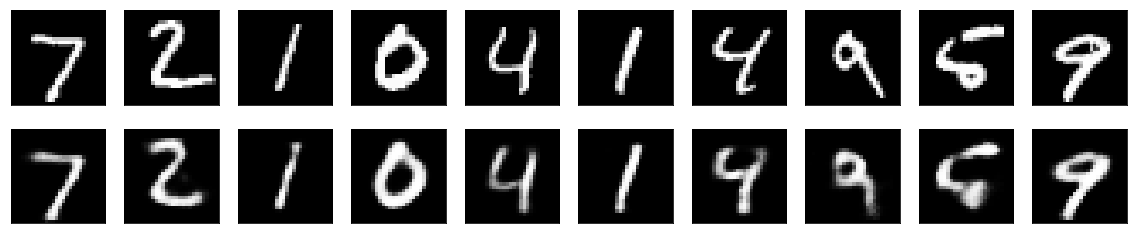

In [4]:
decoded_imgs= autoencoder.predict(x_test)

# use matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # how many digits we will display
plt.figure(figsize = (20,4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()# use matplotlib.pyplot as plt
